In [56]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from particle import Particle, InvalidParticle, ParticleNotFound

# Initial FASERvSi studies

Detector setup:
132 layers of Tungsten and 'SCT' (sensitive vacuum)
Tungsten layers are 0.9 mm thick
Gap between Tungsten sheets is 7.08 mm
1000 events generated - mix of $\nu_e$, $\nu_\mu$ and $\nu_\tau$


In [57]:
data = uproot.open("/home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi.1000.HITS.root")

In [58]:
output_dir = "eventPlots/FASERvSi.1000.HITS/"
os.makedirs(output_dir, exist_ok=True)

In [59]:
def _get_pos_and_energy(uproot_data, particle_type, event_number=None):
    allowed_types = ["ep", "em", "mm",  "mp", "hm", "hp"]
    if particle_type not in allowed_types:
        raise ValueError(f"particle_type must be one of these {allowed_types}")

    kin_suffixes = ["x", "y", "z", "E"]
    
    cut_expression = f"{particle_type}_z >= 0" 
    
    kinematics = uproot_data.arrays([f"{particle_type}_{k}" for k in kin_suffixes], library="np", cut=cut_expression)
    
    if event_number is None:
        return {"x": kinematics[f"{particle_type}_x"], "y": kinematics[f"{particle_type}_y"], "z": kinematics[f"{particle_type}_z"], "E": kinematics[f"{particle_type}_E"]}
    
    return {"x": kinematics[f"{particle_type}_x"][event_number], "y": kinematics[f"{particle_type}_y"][event_number], "z": kinematics[f"{particle_type}_z"][event_number], "E": kinematics[f"{particle_type}_E"][event_number]}
    

In [60]:
def _get_name_from_pdgc(pdgc):
    try:
        particle = Particle.from_pdgid(pdgc)
        
        particle_name = particle.name
        
        if pdgc < 0 and "+" not in particle_name and "-" not in particle_name:
            particle_name = f"anti-{particle_name}"
        
        return particle_name
        
    except InvalidParticle:
        return f"Unknown PDG Code: {pdgc}"
    except ParticleNotFound:
        return f"Particle not found: {pdgc}"

In [61]:
def _get_charge_from_pdgc(pdgc):
    try:
        particle = Particle.from_pdgid(pdgc)
        
        particle_charge = particle.charge
        
        return particle_charge
        
    except InvalidParticle:
        return f"Unknown PDG Code: {pdgc}"
    except ParticleNotFound:
        return f"Particle not found: {pdgc}"

In [62]:
def get_name_from_pdgc(pdgc):
    result = []
    try:
        len(pdgc)
        for p in pdgc:
            result.append(_get_name_from_pdgc(p))
    except TypeError:
        return _get_name_from_pdgc(pdgc)

    return np.array(result)

In [63]:
def get_charge_from_pdgc(pdgc):
    result = []
    try:
        len(pdgc)
        for p in pdgc:
            result.append(_get_charge_from_pdgc(p))
    except TypeError:
        return _get_name_from_pdgc(pdgc)
    
    return np.array(result)

In [64]:
hits = [data[treename] for treename in data.keys()]

In [65]:
pdgc = hits[-1].arrays("pdgc", library="np")["pdgc"]

pdgc = set(pdgc)

for p in pdgc:
    print(f"pdgc = {p:<13}    name = {get_name_from_pdgc(p):<13}    charge = {get_charge_from_pdgc(p)}")

pdgc = 130.0            name = K(L)0            charge = K(L)0
pdgc = -3322.0          name = anti-Xi~0        charge = anti-Xi~0
pdgc = 11.0             name = e-               charge = e-
pdgc = 12.0             name = nu(e)            charge = nu(e)
pdgc = 13.0             name = mu-              charge = mu-
pdgc = 14.0             name = nu(mu)           charge = nu(mu)
pdgc = -3312.0          name = Xi~+             charge = Xi~+
pdgc = 16.0             name = nu(tau)          charge = nu(tau)
pdgc = 22.0             name = gamma            charge = gamma
pdgc = 3222.0           name = Sigma+           charge = Sigma+
pdgc = 4122.0           name = Lambda(c)+       charge = Lambda(c)+
pdgc = 2212.0           name = p                charge = p
pdgc = 1000010020.0     name = D2               charge = D2
pdgc = 3112.0           name = Sigma-           charge = Sigma-
pdgc = -211.0           name = pi-              charge = pi-
pdgc = 1000010030.0     name = T3               charge =

In [66]:
def scatter_on_ax(ax, event_data, x_var, y_var, label, color,  alpha=1, marker_size=1):
    
    if len(event_data[x_var]) == 0:
        return None
    
    ax.scatter(event_data[x_var], event_data[y_var], color=color, marker=",", label=label, alpha=alpha, s=marker_size)

In [67]:
event_numbers = hits[0].arrays("fEvent", library="np")["fEvent"]

print(event_numbers)

  0%|          | 0/100 [00:00<?, ?it/s]

0


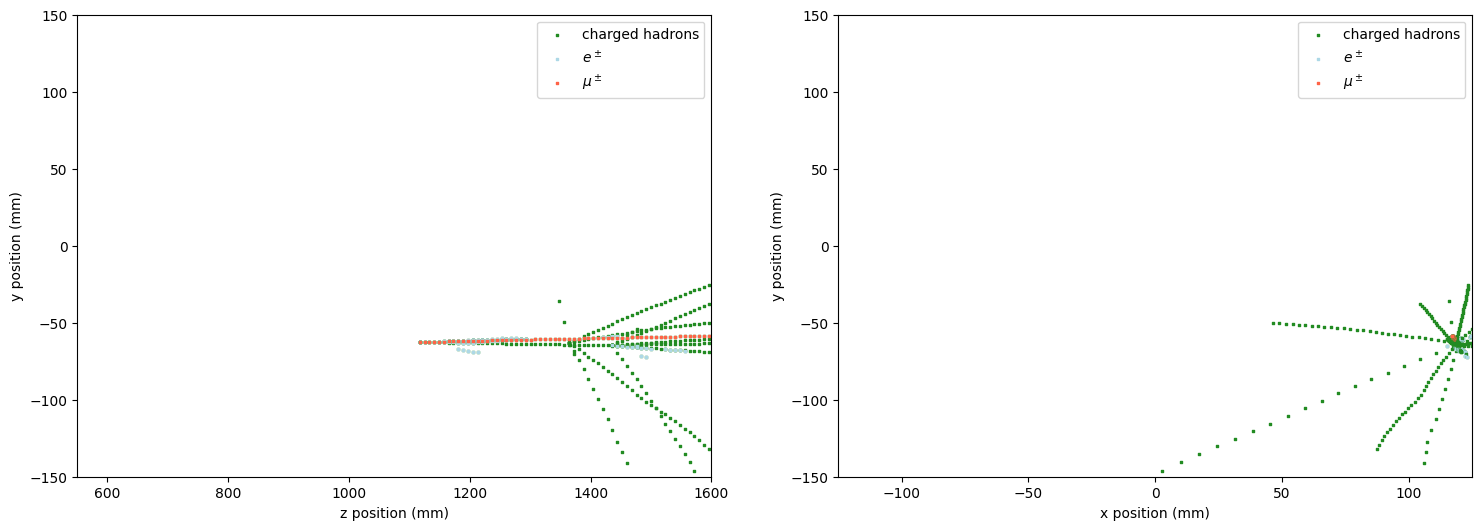

  1%|          | 1/100 [00:05<09:25,  5.71s/it]

1


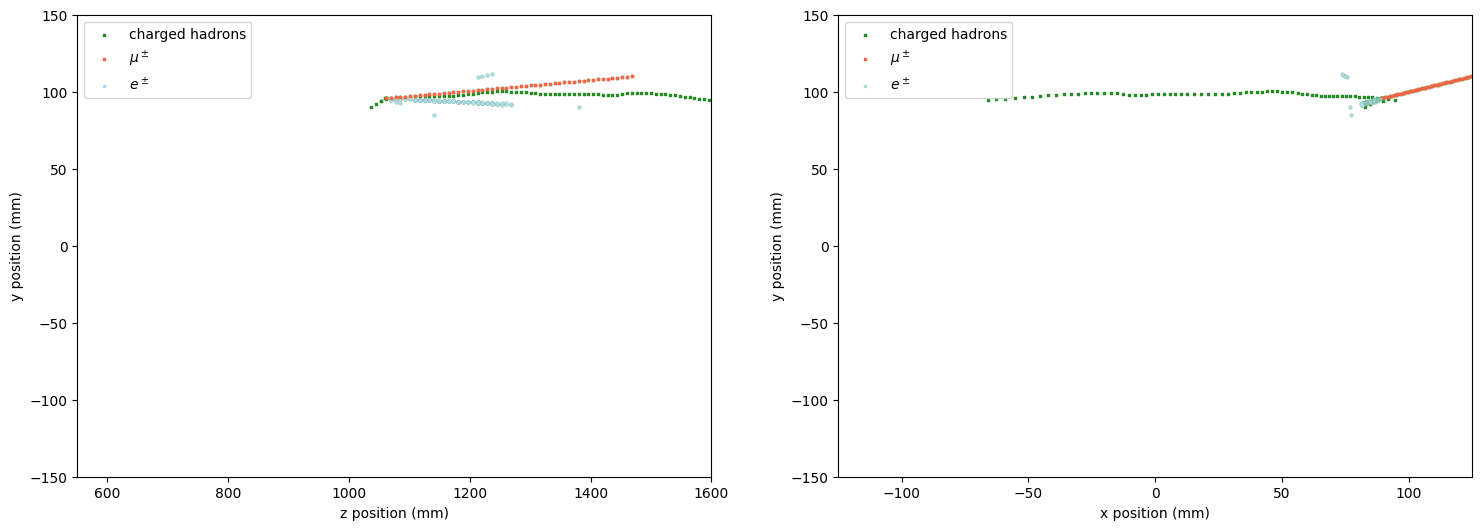

  2%|▏         | 2/100 [00:11<09:04,  5.56s/it]

2


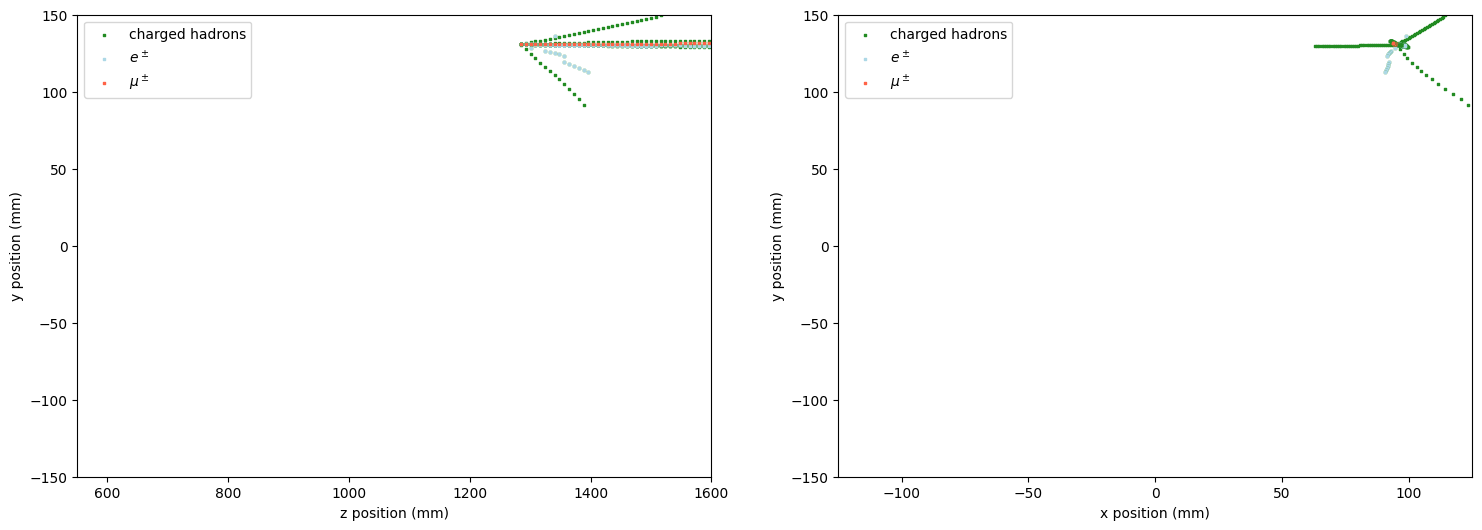

  3%|▎         | 3/100 [00:16<08:53,  5.50s/it]

3


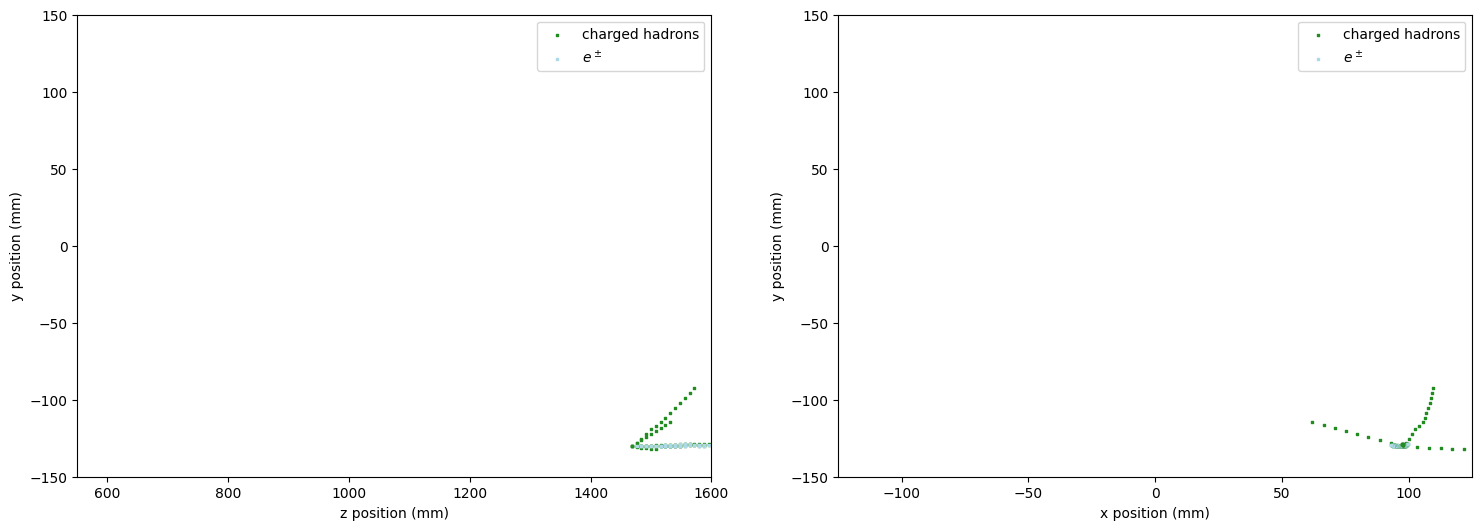

  4%|▍         | 4/100 [00:20<07:54,  4.94s/it]

4


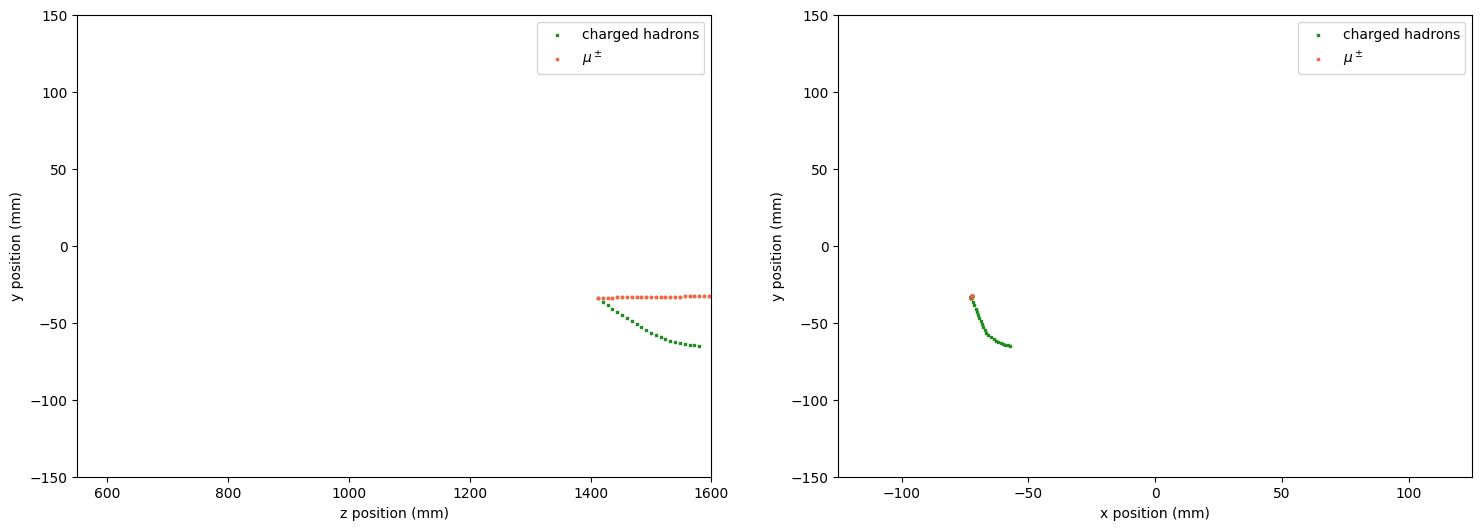

  5%|▌         | 5/100 [00:24<07:24,  4.68s/it]

5


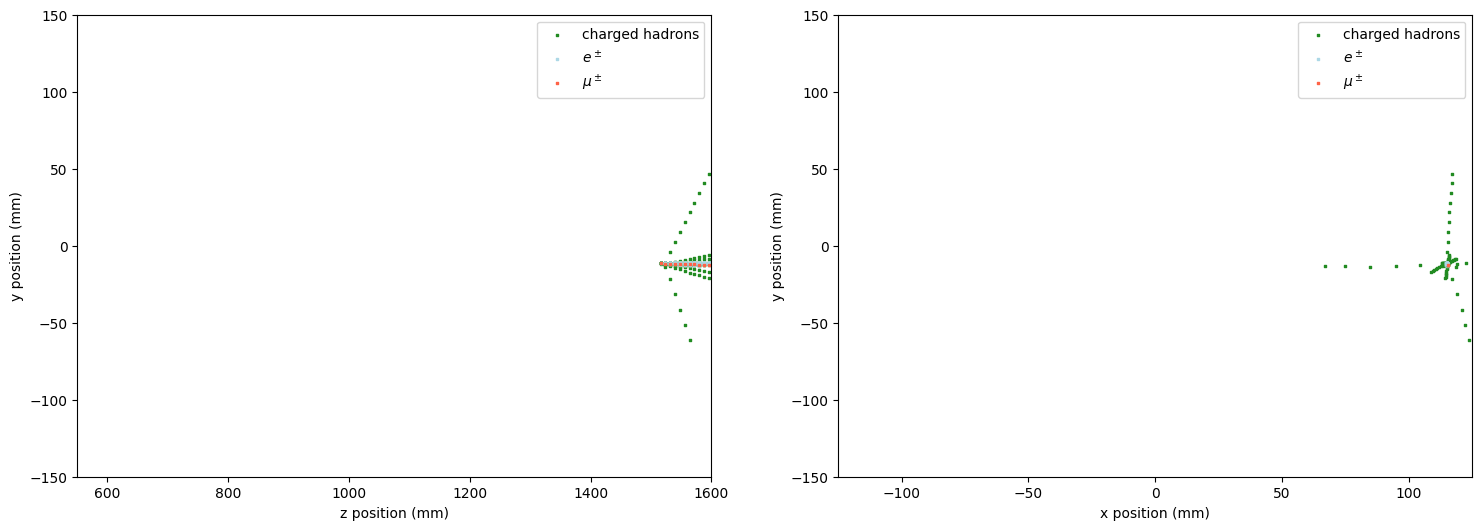

  6%|▌         | 6/100 [00:29<07:10,  4.58s/it]

6


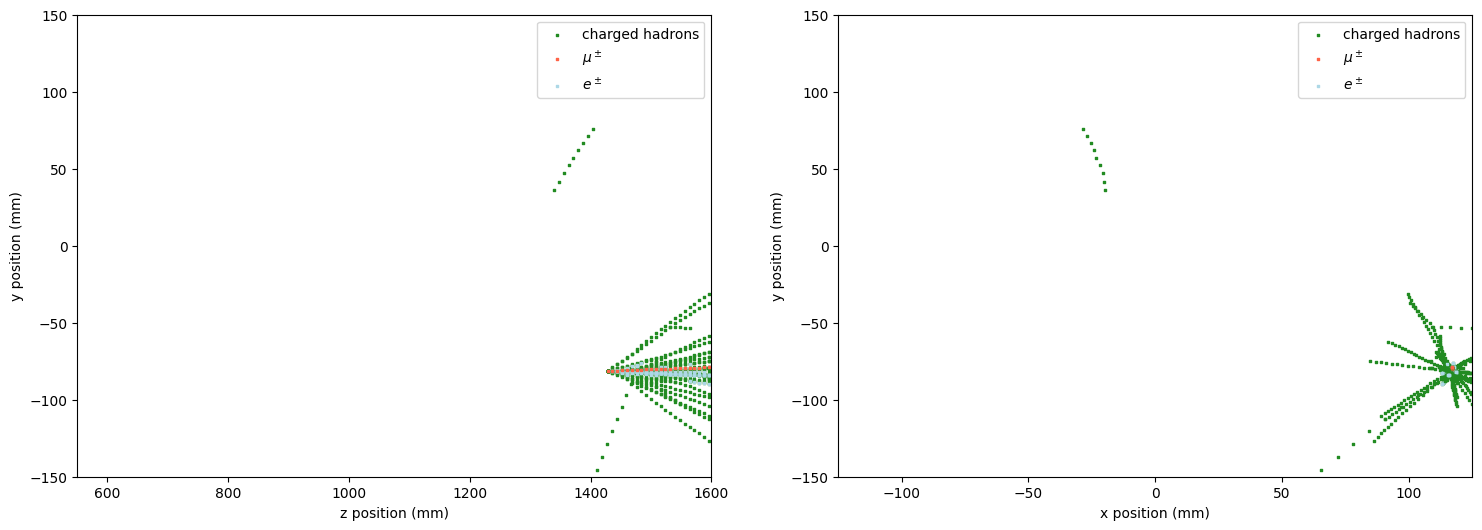

  7%|▋         | 7/100 [00:34<07:22,  4.76s/it]

7


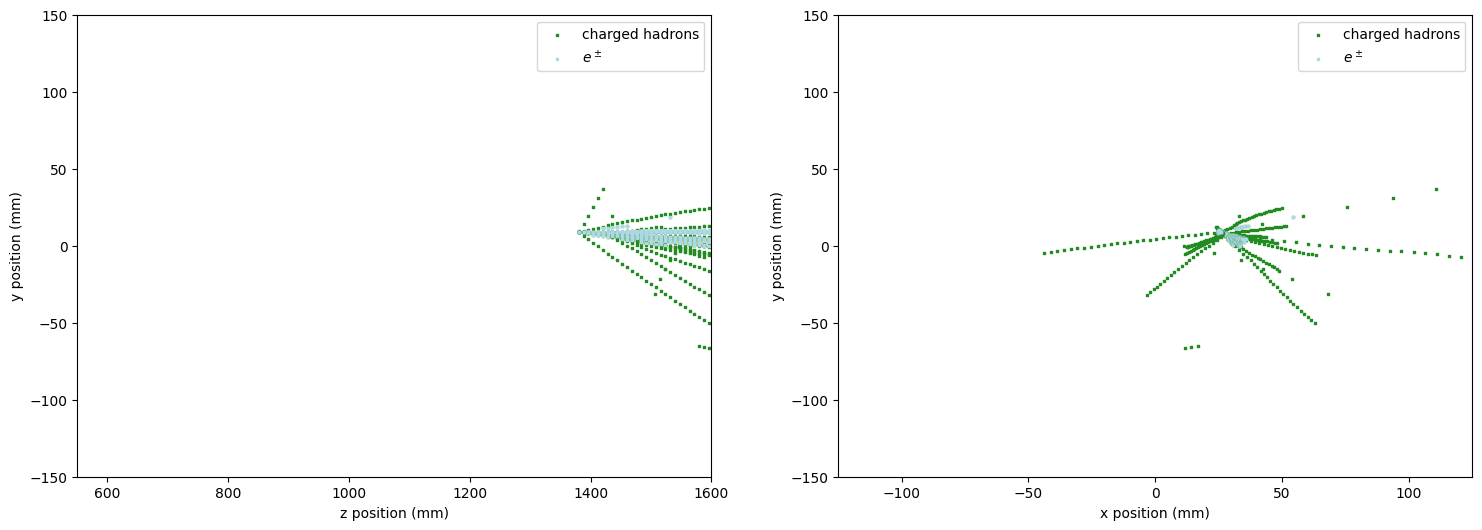

  8%|▊         | 8/100 [00:44<09:59,  6.52s/it]

8


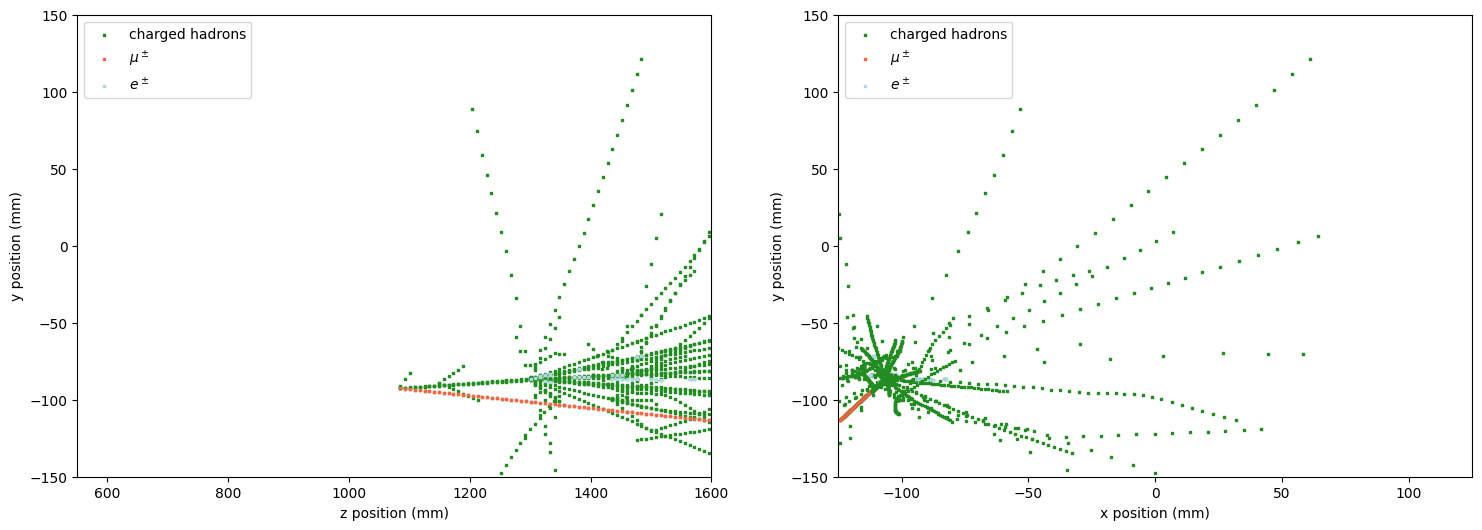

  9%|▉         | 9/100 [00:50<09:40,  6.38s/it]

9


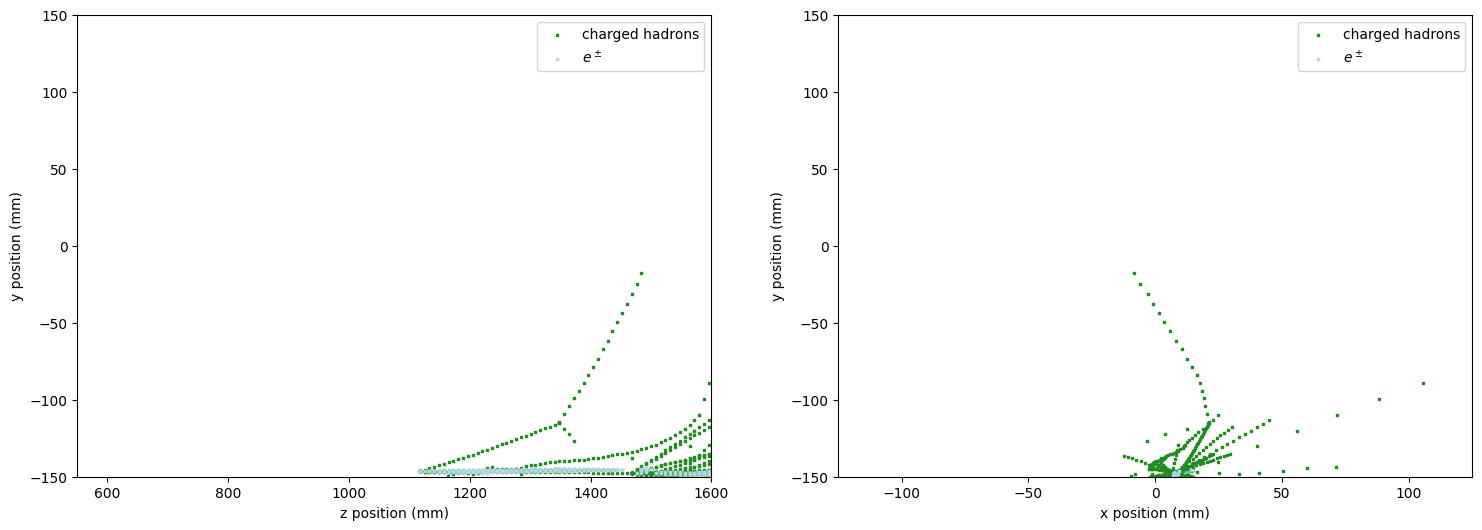

 10%|█         | 10/100 [00:56<09:11,  6.13s/it]

10


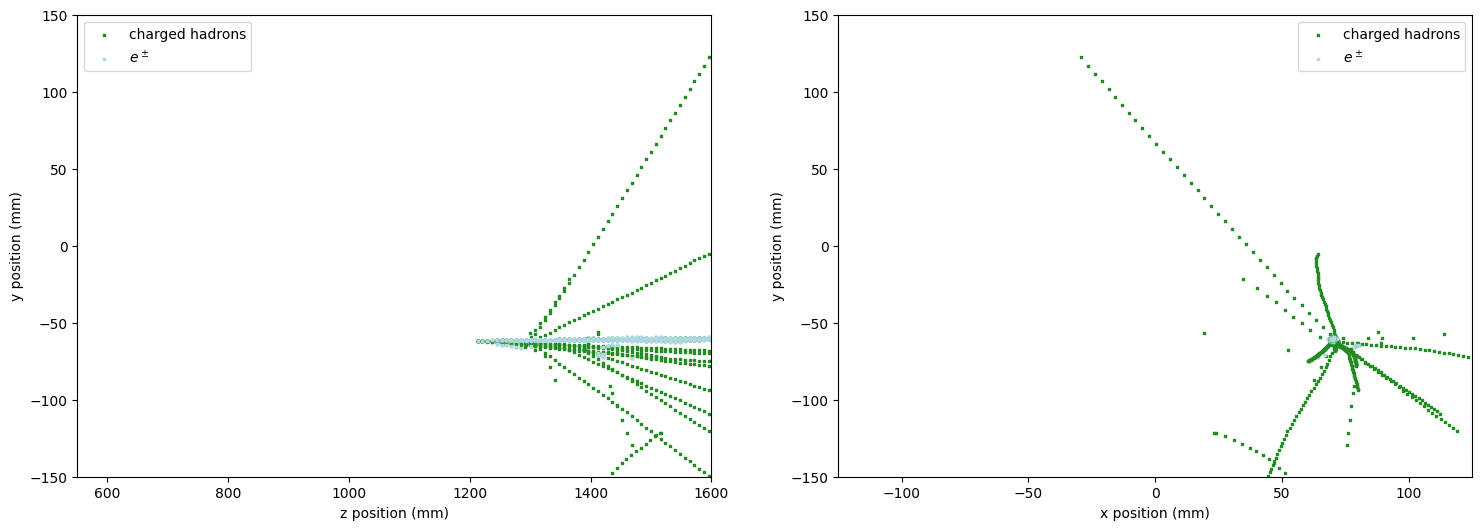

 11%|█         | 11/100 [01:02<08:55,  6.02s/it]

11


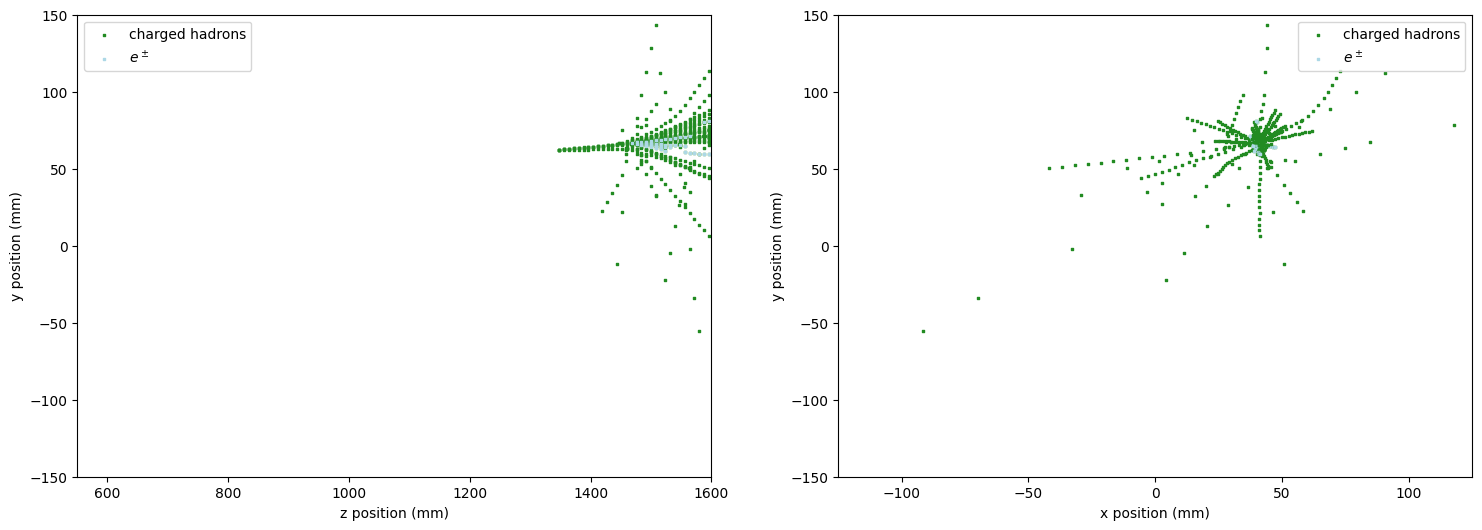

 12%|█▏        | 12/100 [01:06<08:14,  5.62s/it]

12


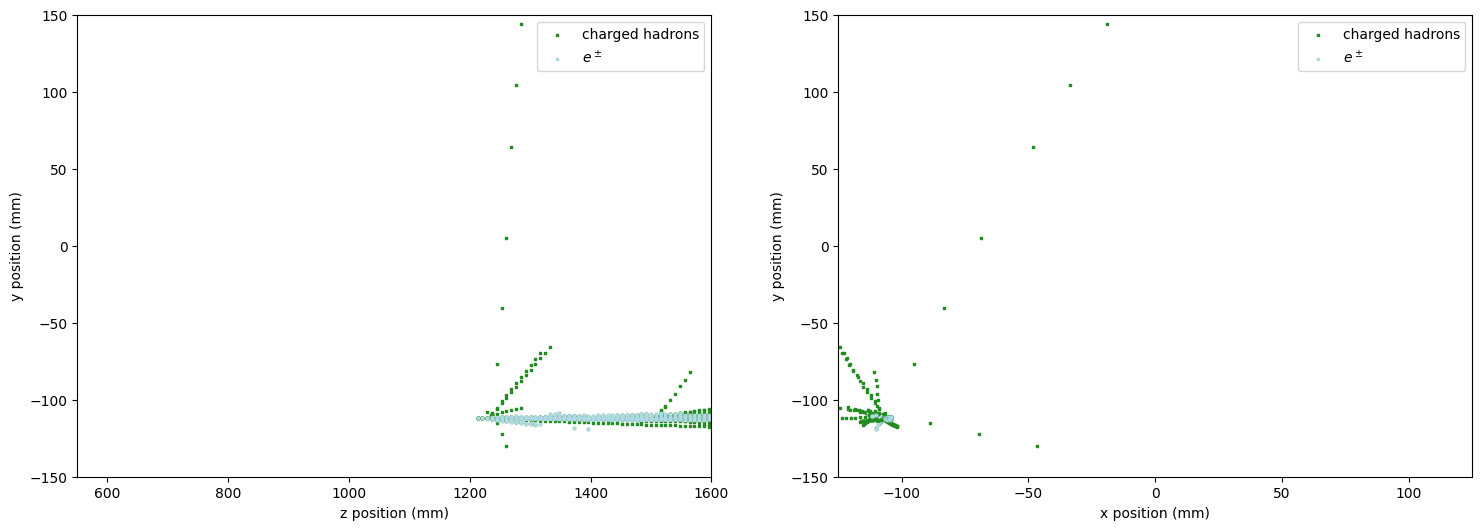

 13%|█▎        | 13/100 [01:11<07:54,  5.45s/it]

13


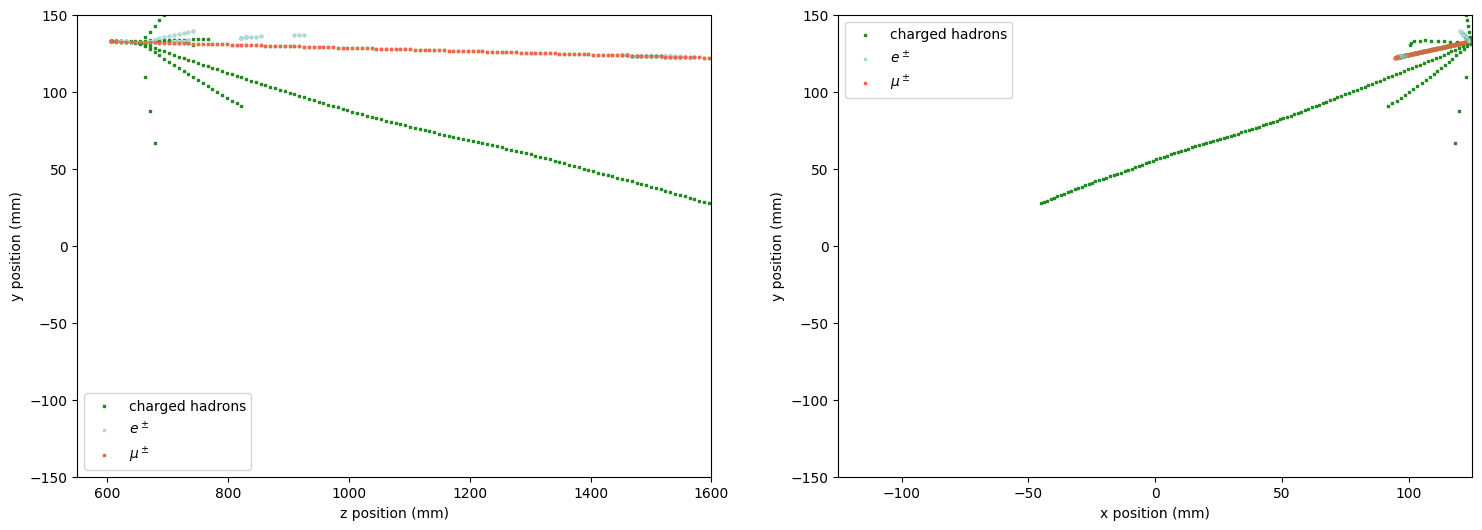

 14%|█▍        | 14/100 [01:19<08:37,  6.02s/it]

14


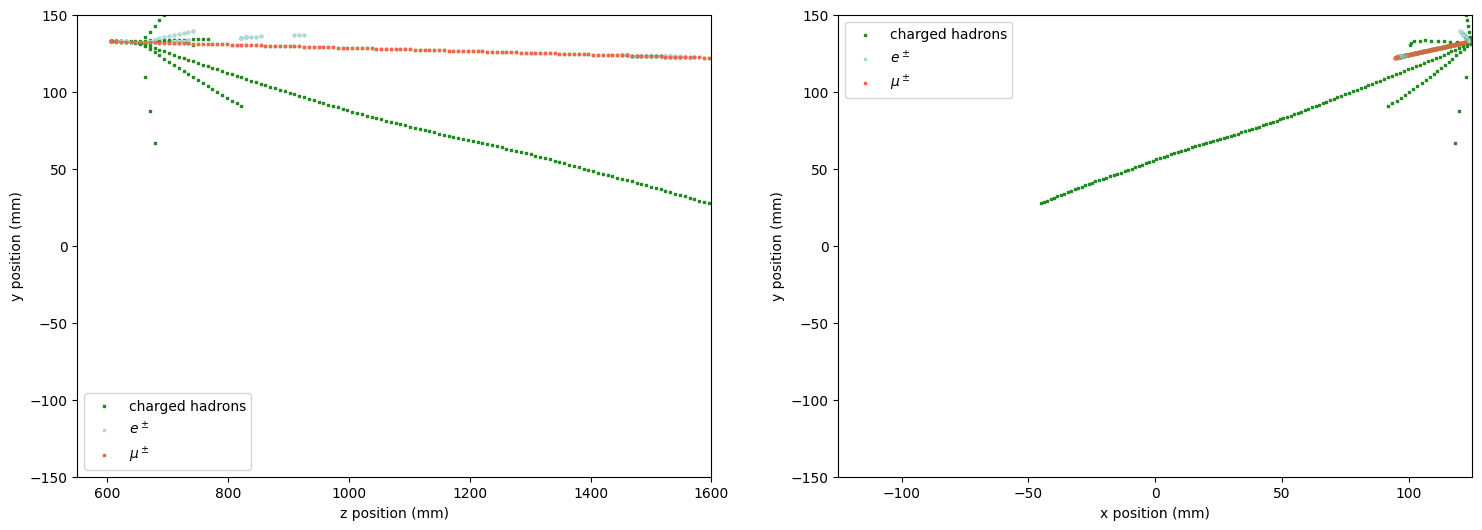

 15%|█▌        | 15/100 [01:26<09:09,  6.46s/it]

15


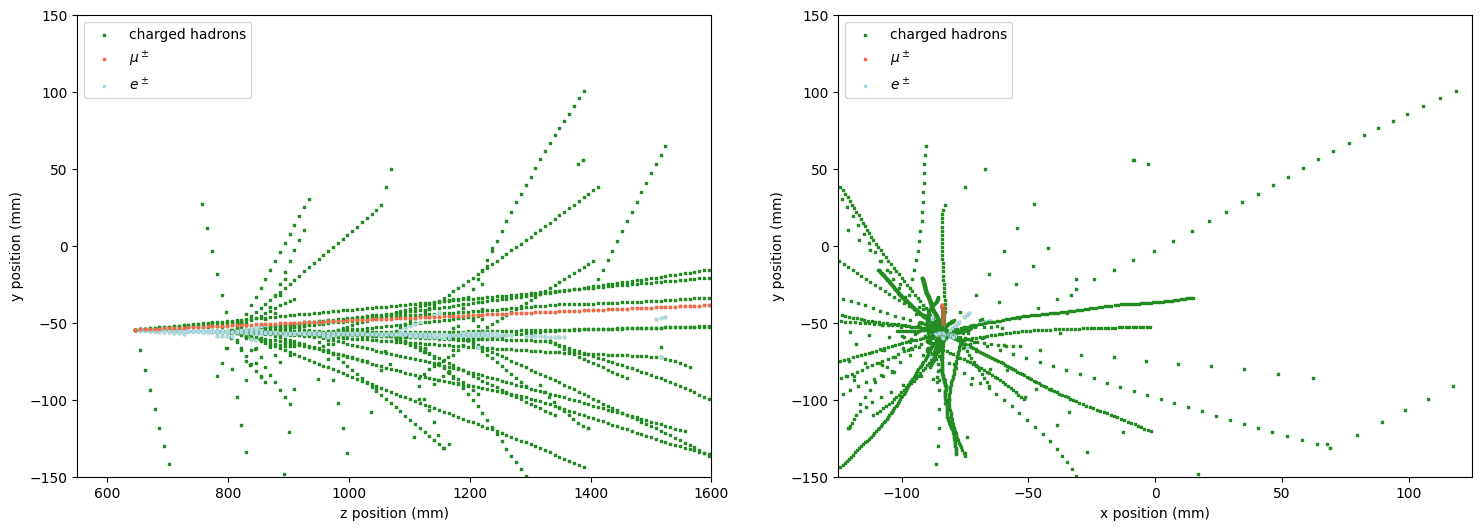

 16%|█▌        | 16/100 [01:34<09:27,  6.76s/it]

16


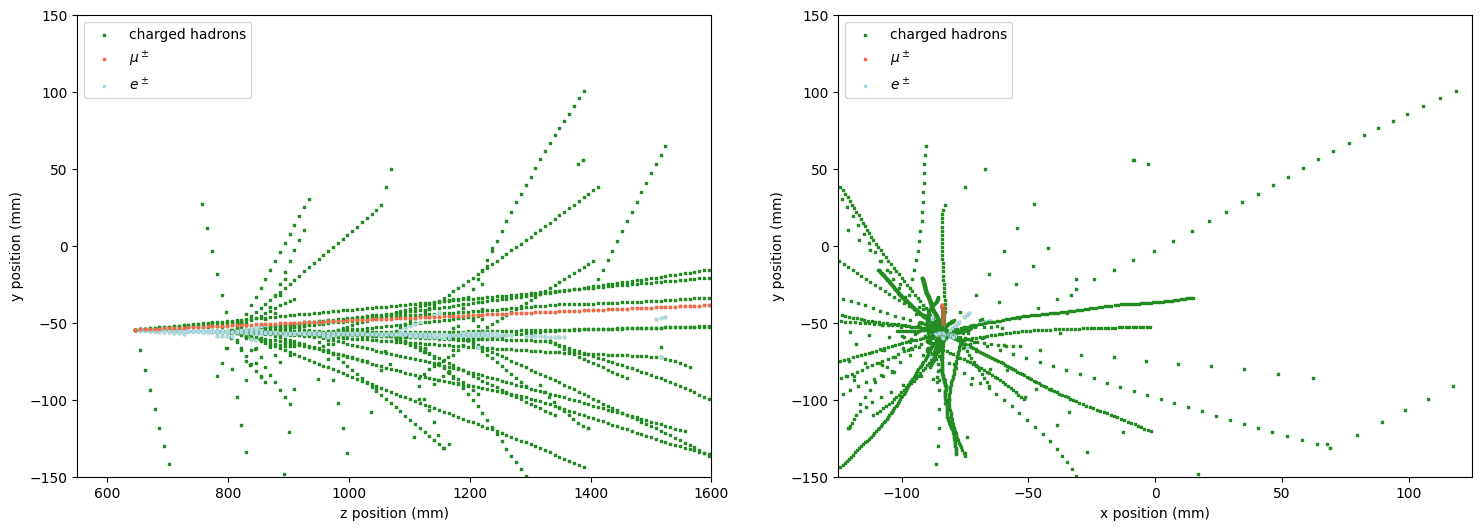

 17%|█▋        | 17/100 [01:42<09:49,  7.11s/it]

17


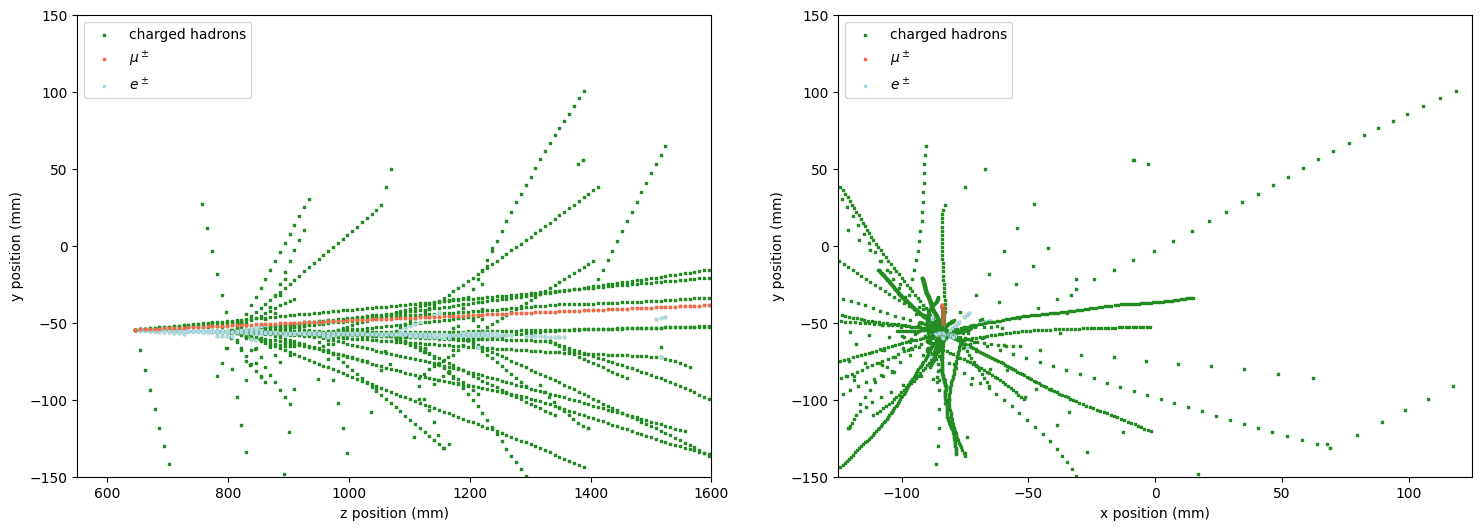

 18%|█▊        | 18/100 [01:49<09:52,  7.22s/it]

18


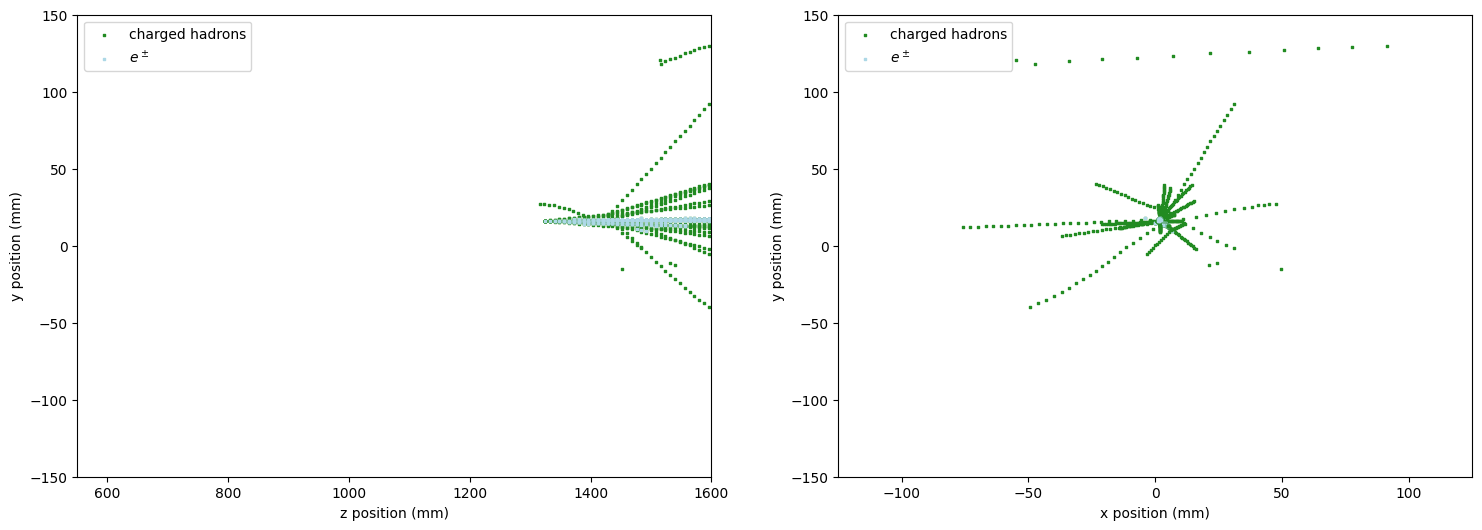

 19%|█▉        | 19/100 [01:54<08:58,  6.65s/it]

19


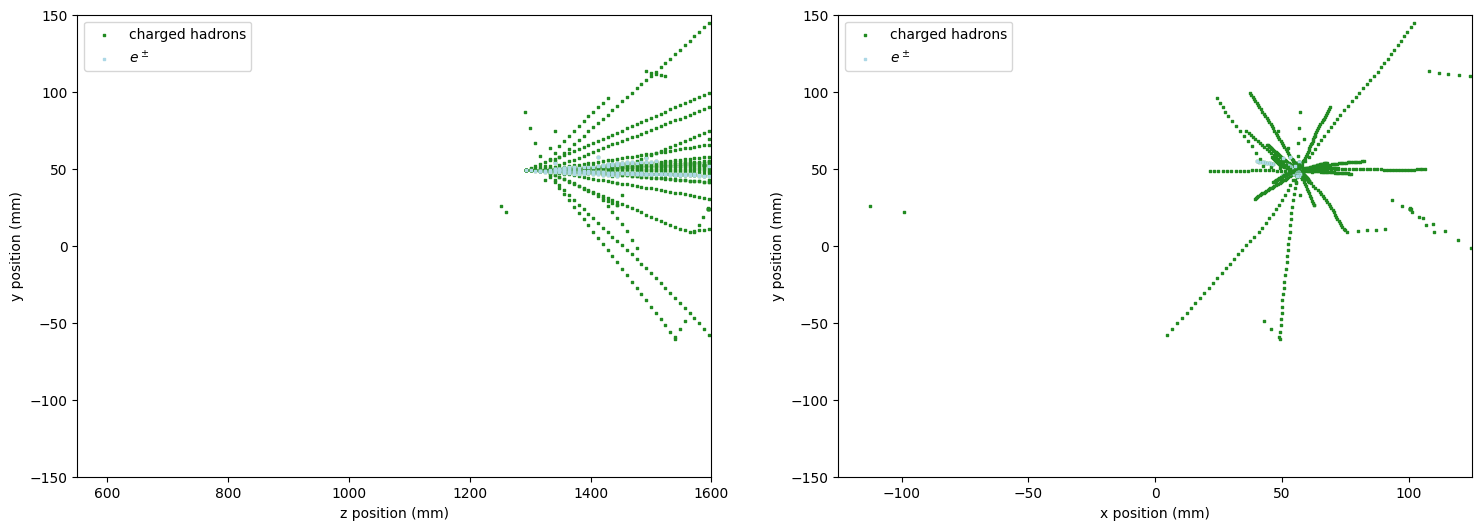

 20%|██        | 20/100 [02:00<08:17,  6.22s/it]

20


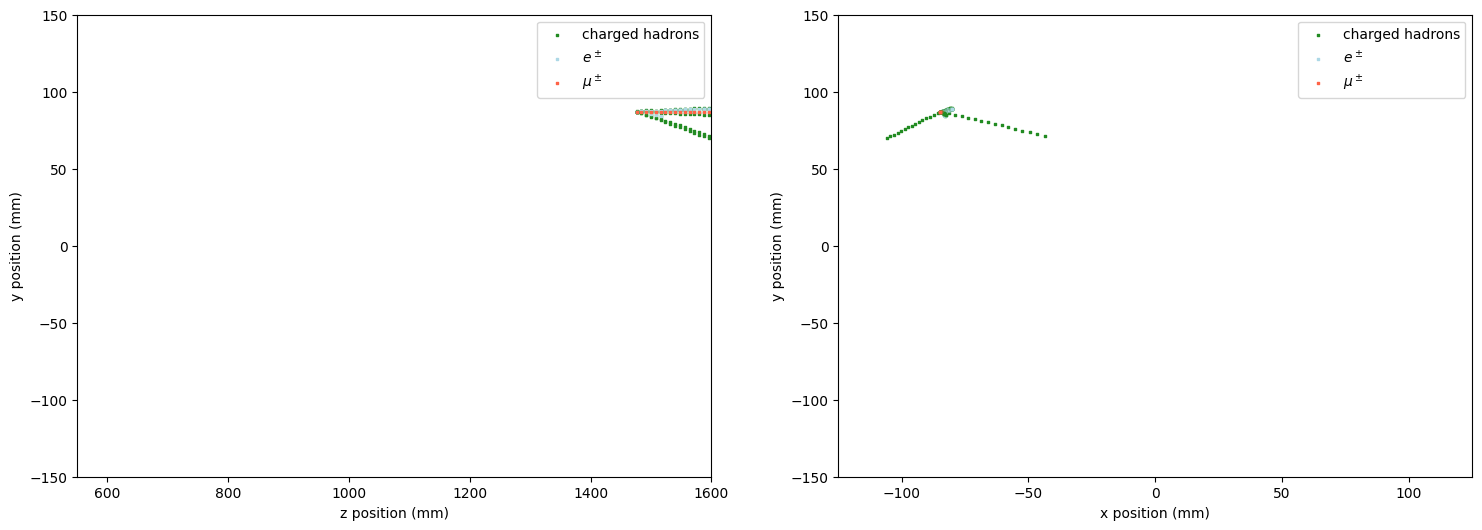

 21%|██        | 21/100 [02:04<07:34,  5.75s/it]

21


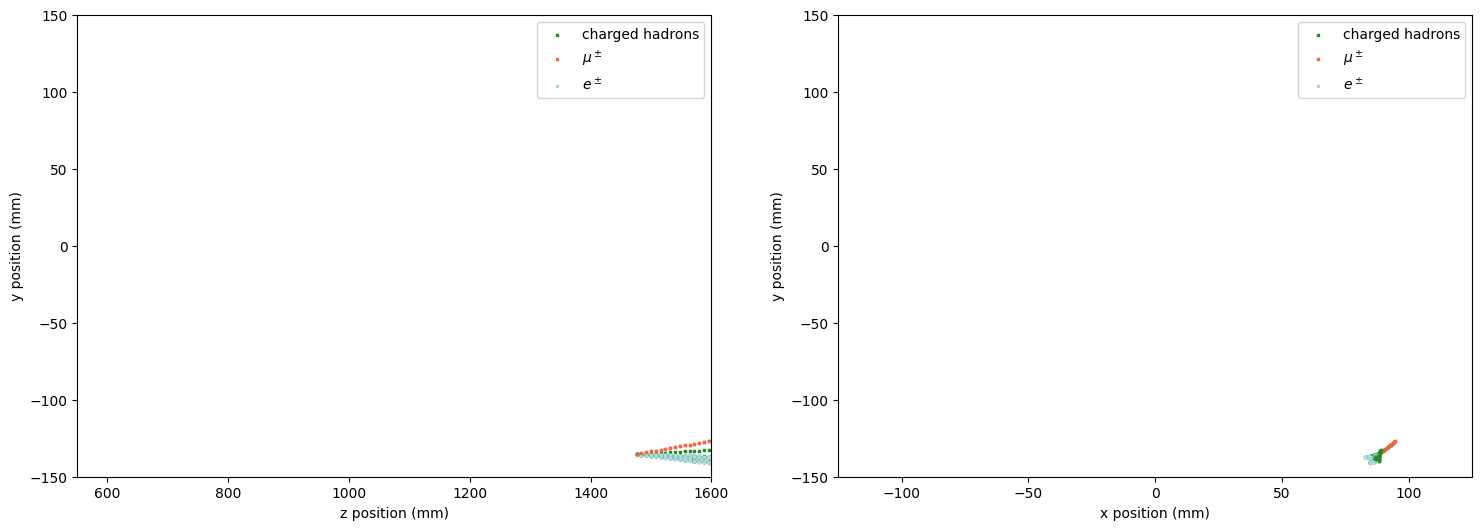

 22%|██▏       | 22/100 [02:09<06:59,  5.38s/it]

22


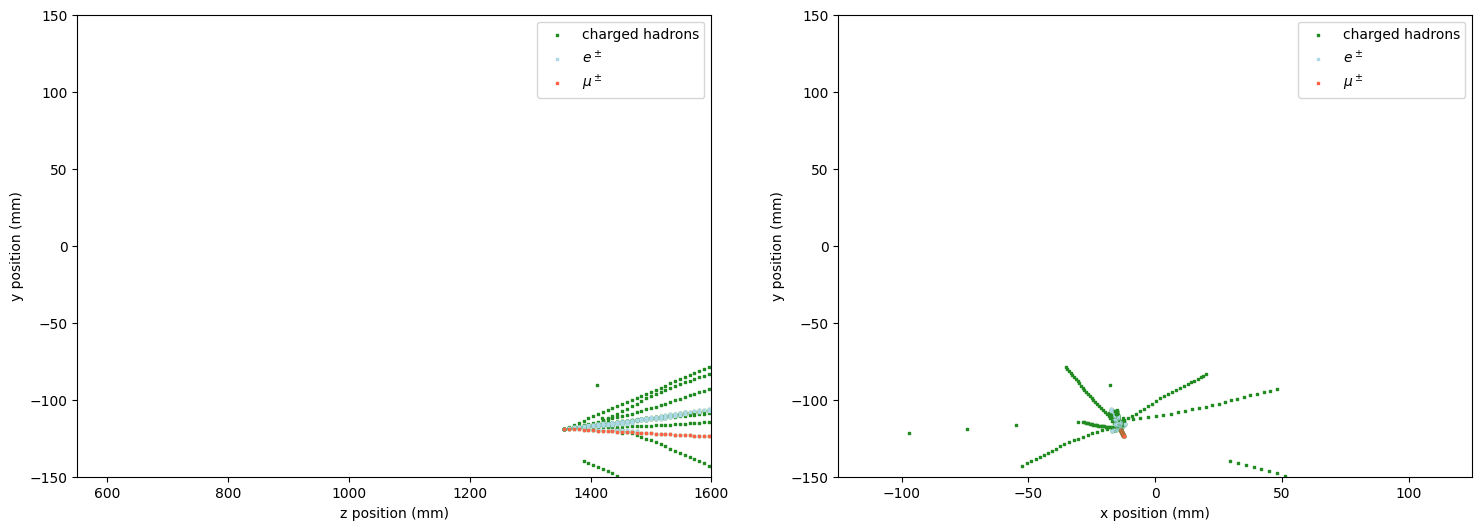

 23%|██▎       | 23/100 [02:14<06:52,  5.35s/it]

23


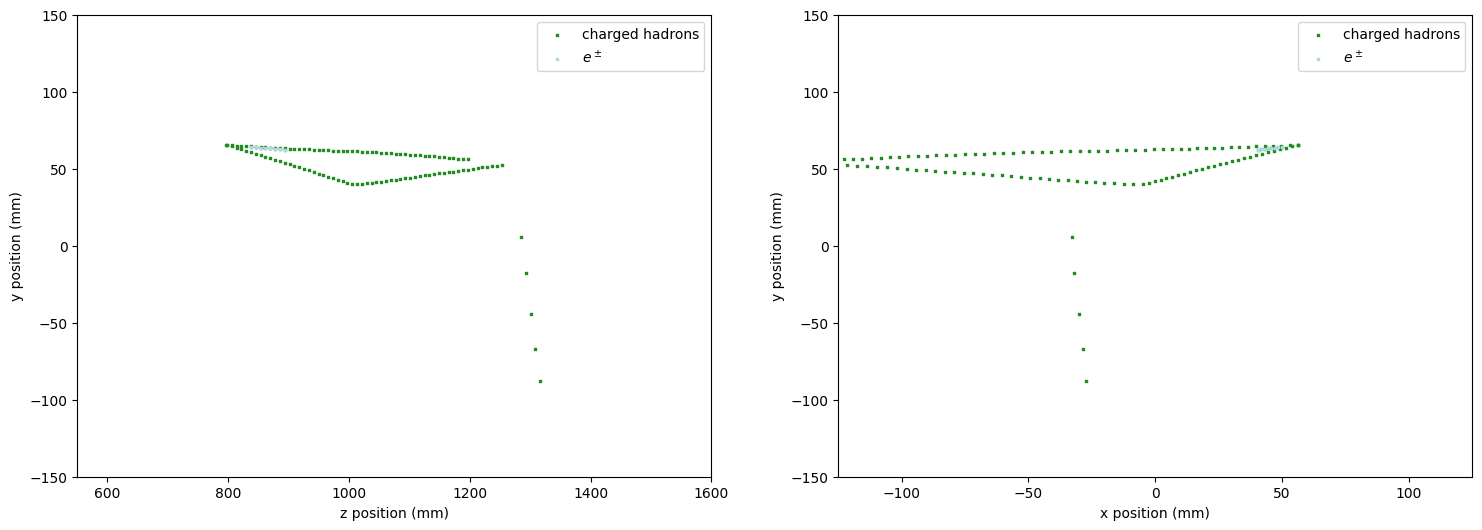

 24%|██▍       | 24/100 [02:19<06:32,  5.16s/it]

24


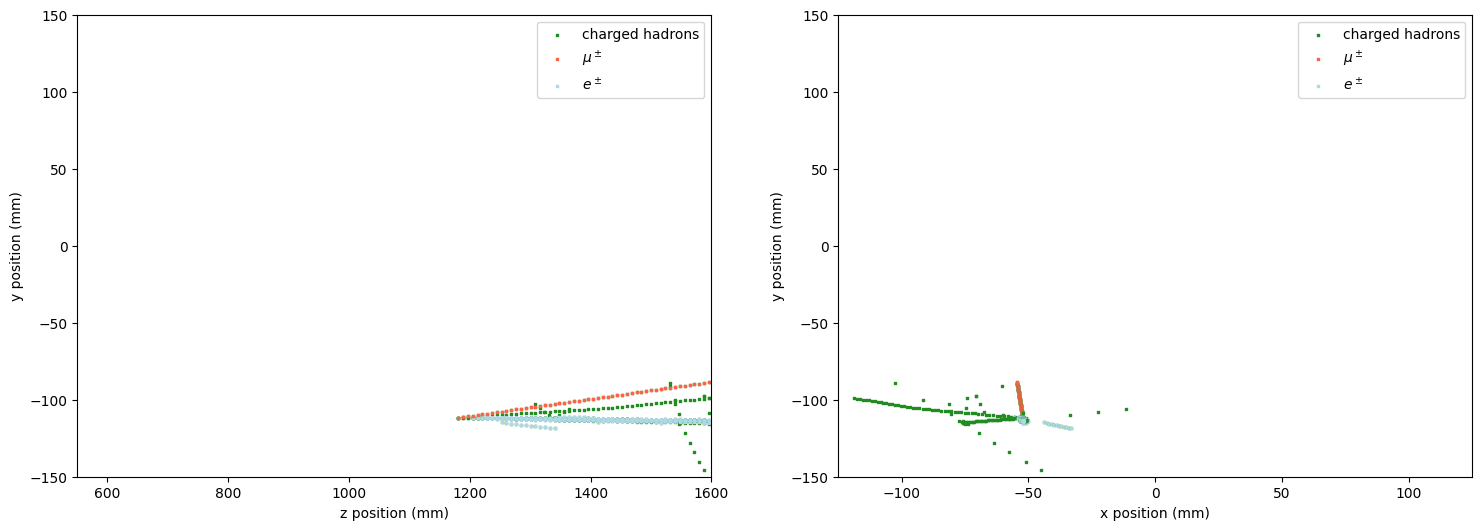

 25%|██▌       | 25/100 [02:25<06:40,  5.34s/it]

25


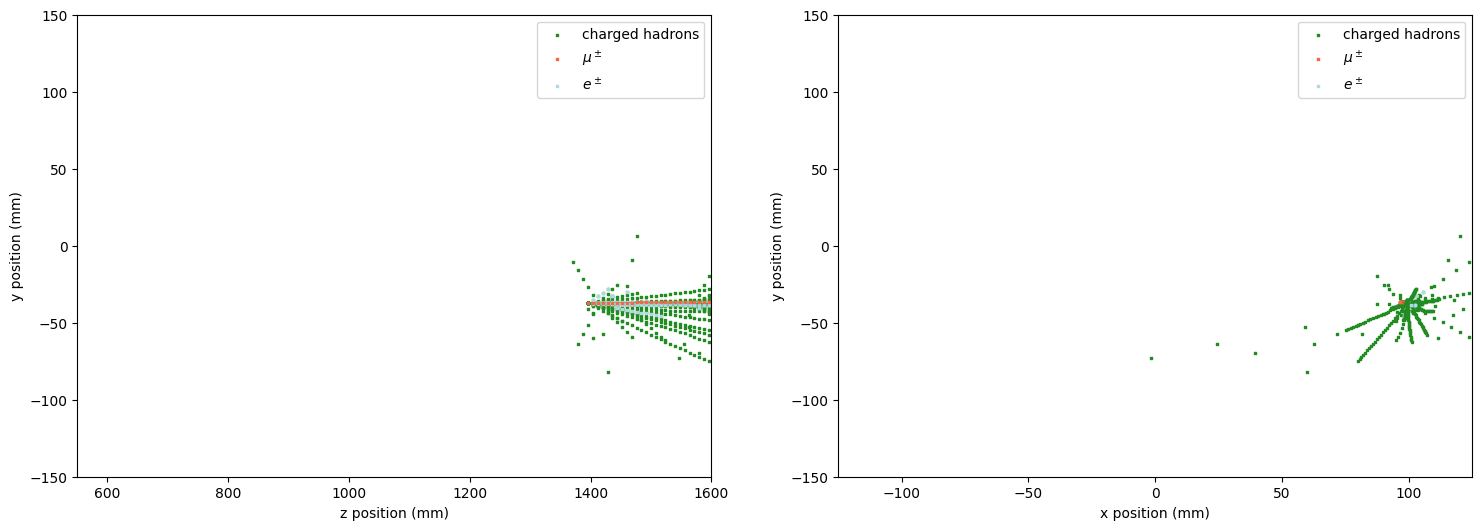

 26%|██▌       | 26/100 [02:30<06:30,  5.28s/it]

26


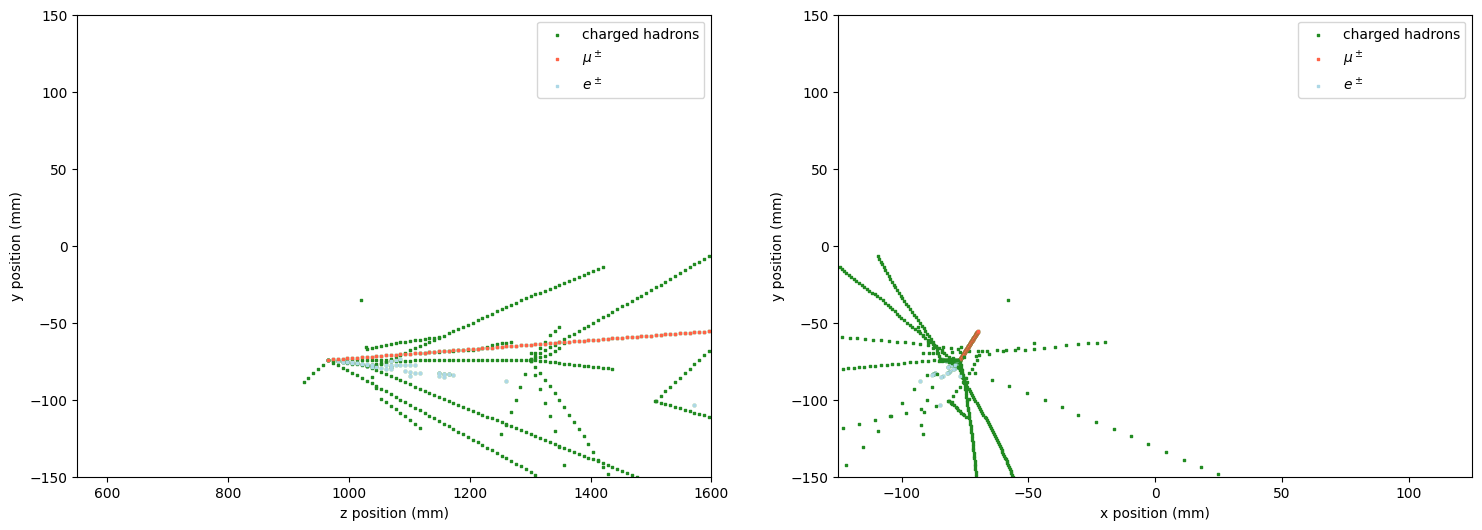

 27%|██▋       | 27/100 [02:36<06:44,  5.54s/it]

27


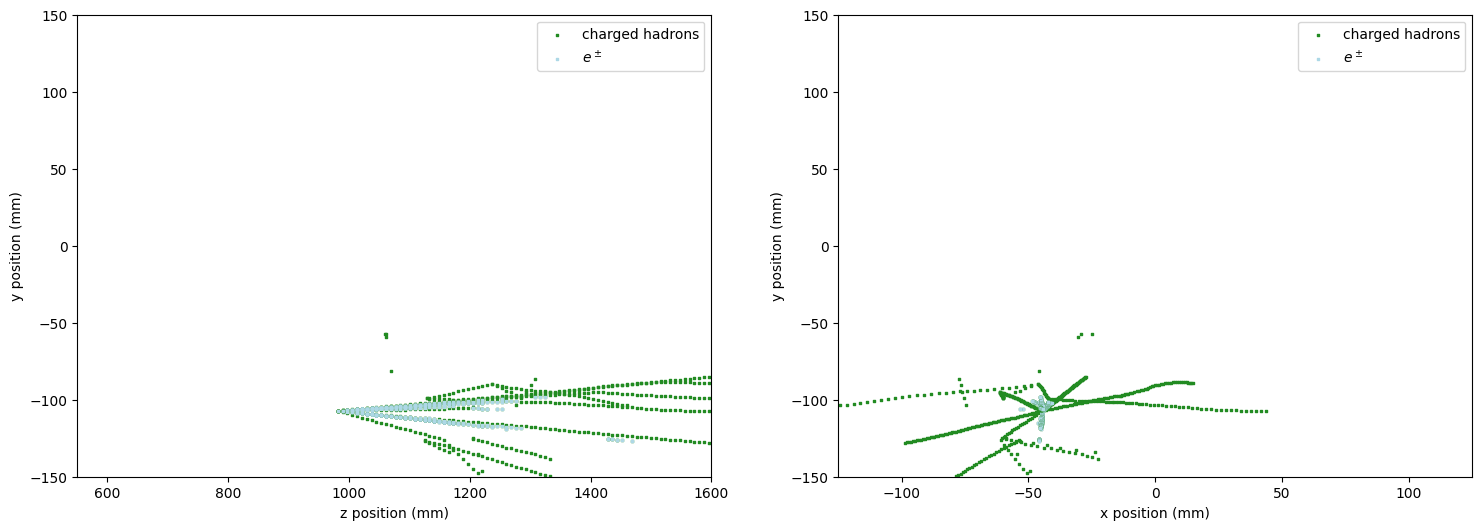

 28%|██▊       | 28/100 [02:41<06:38,  5.54s/it]

28


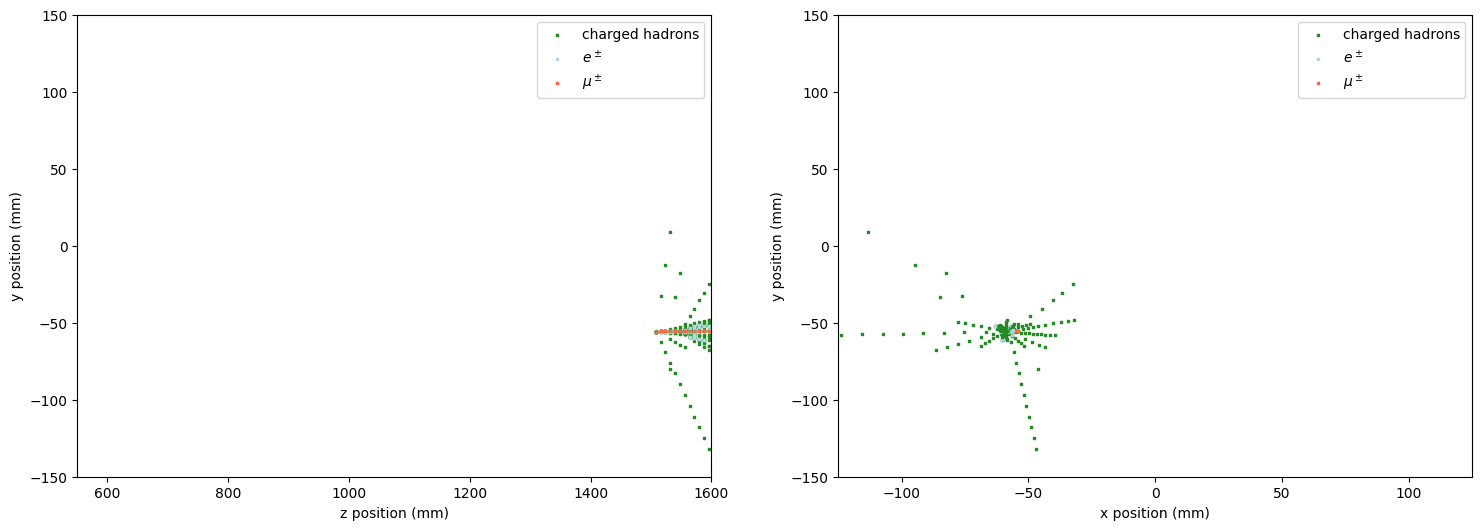

 29%|██▉       | 29/100 [02:46<06:09,  5.21s/it]

29


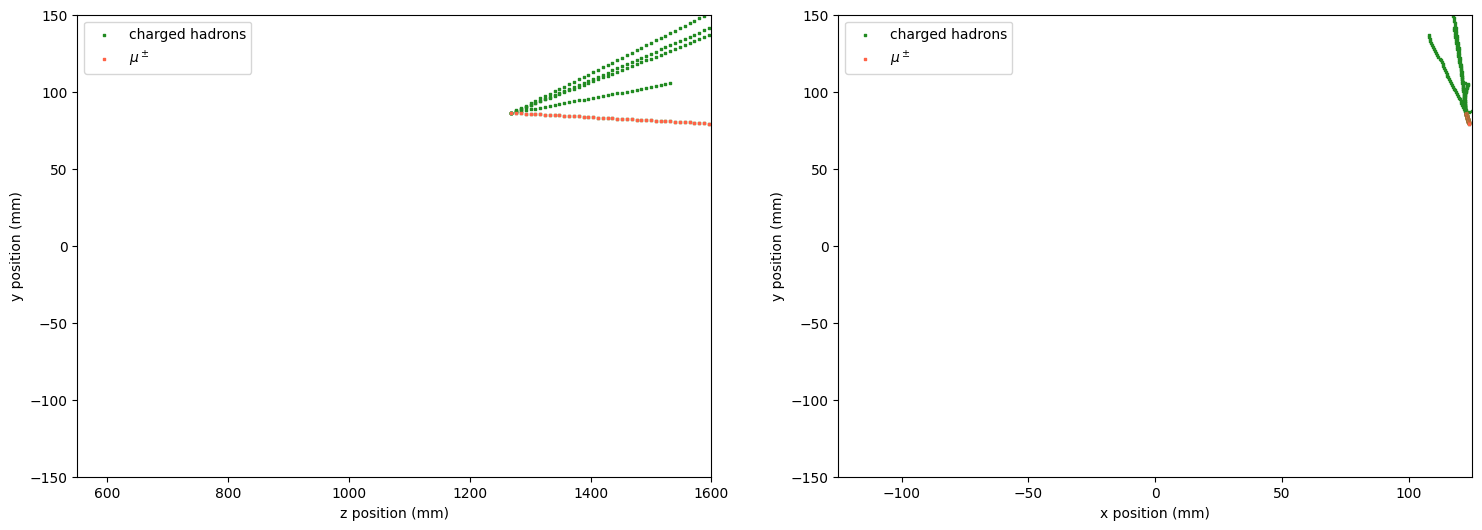

 30%|███       | 30/100 [02:51<05:57,  5.11s/it]

30


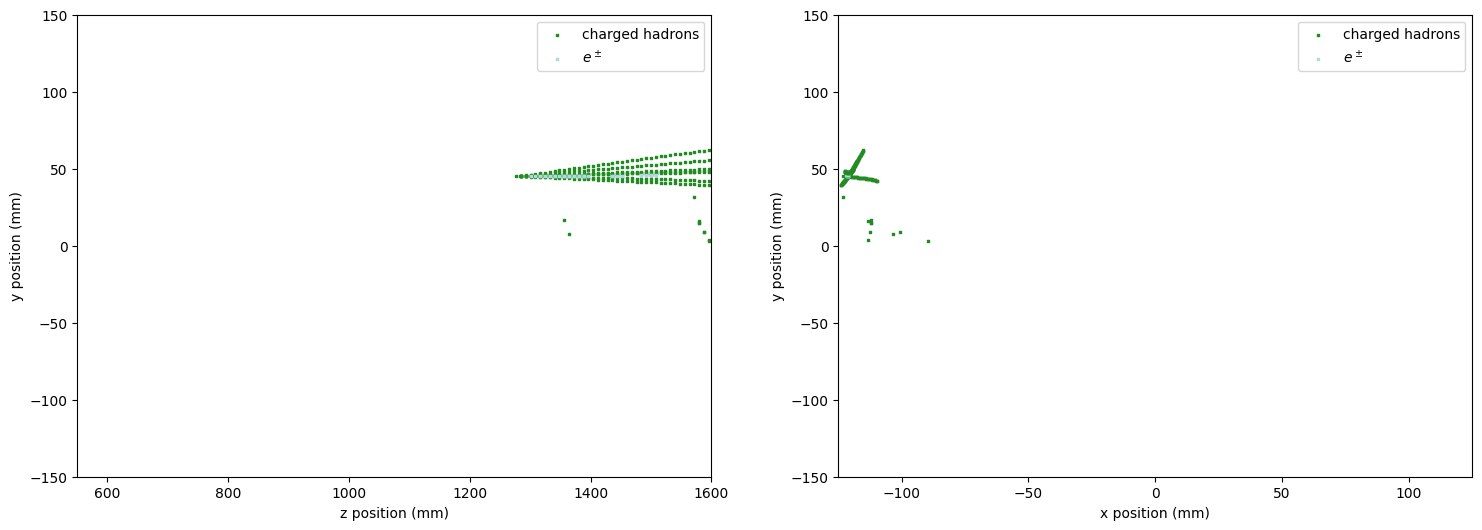

 31%|███       | 31/100 [02:56<05:57,  5.19s/it]

31


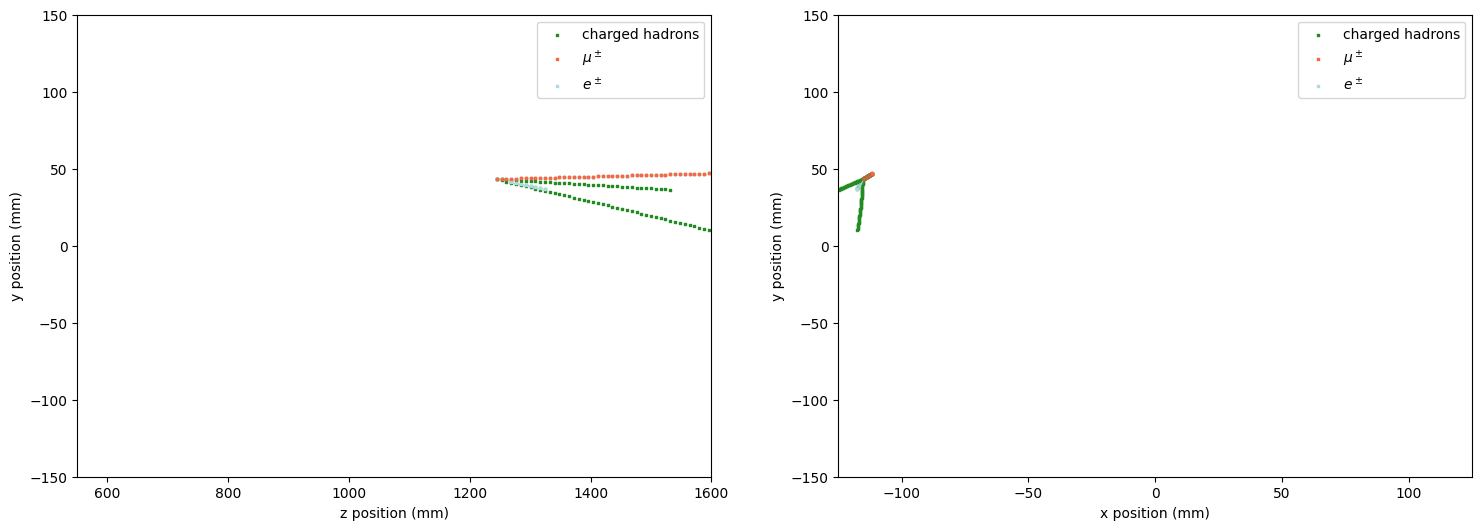

 32%|███▏      | 32/100 [03:04<06:44,  5.95s/it]

32


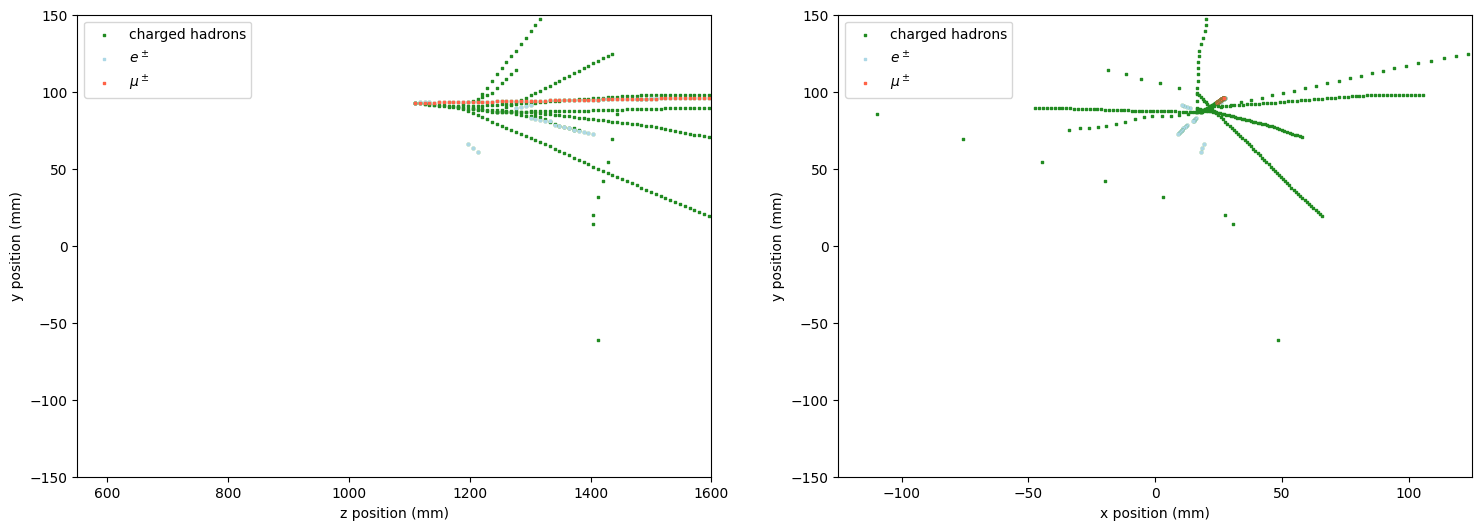

 33%|███▎      | 33/100 [03:09<06:32,  5.86s/it]

33


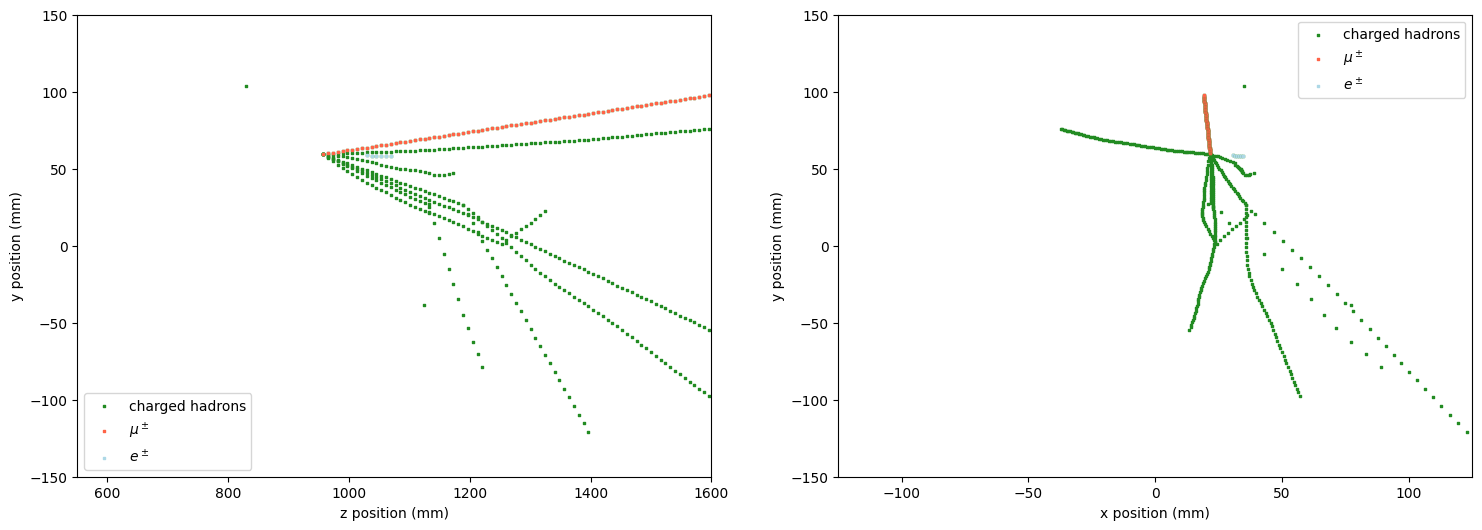

 34%|███▍      | 34/100 [03:15<06:24,  5.82s/it]

34


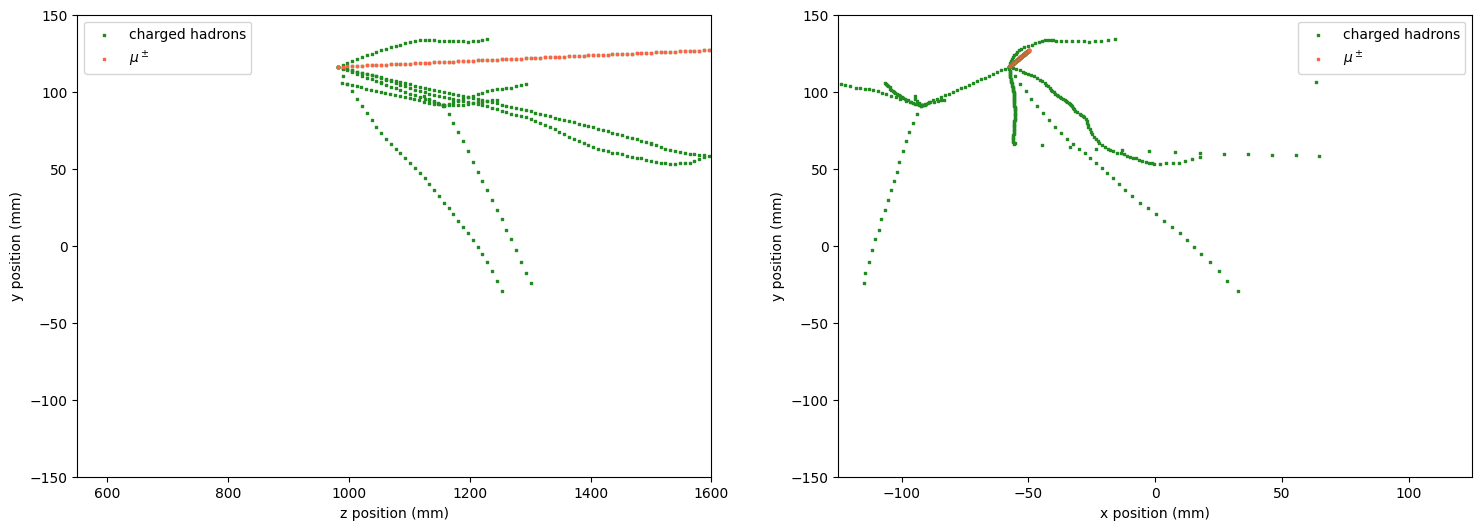

 35%|███▌      | 35/100 [03:21<06:19,  5.84s/it]

35


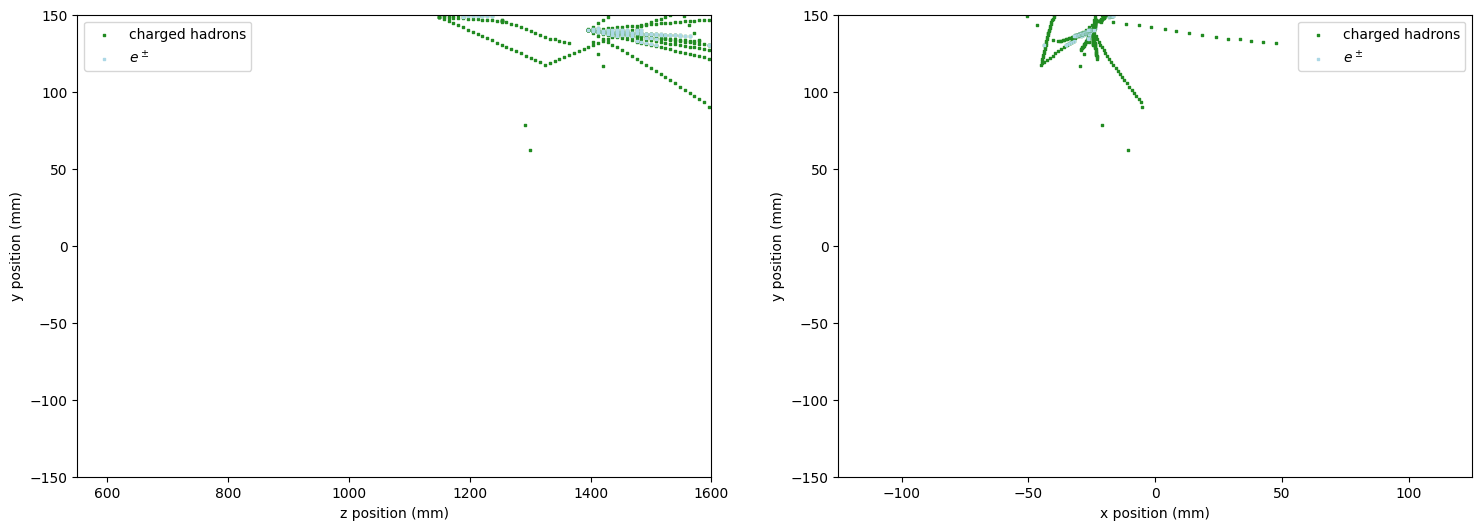

 36%|███▌      | 36/100 [03:26<05:56,  5.57s/it]

36


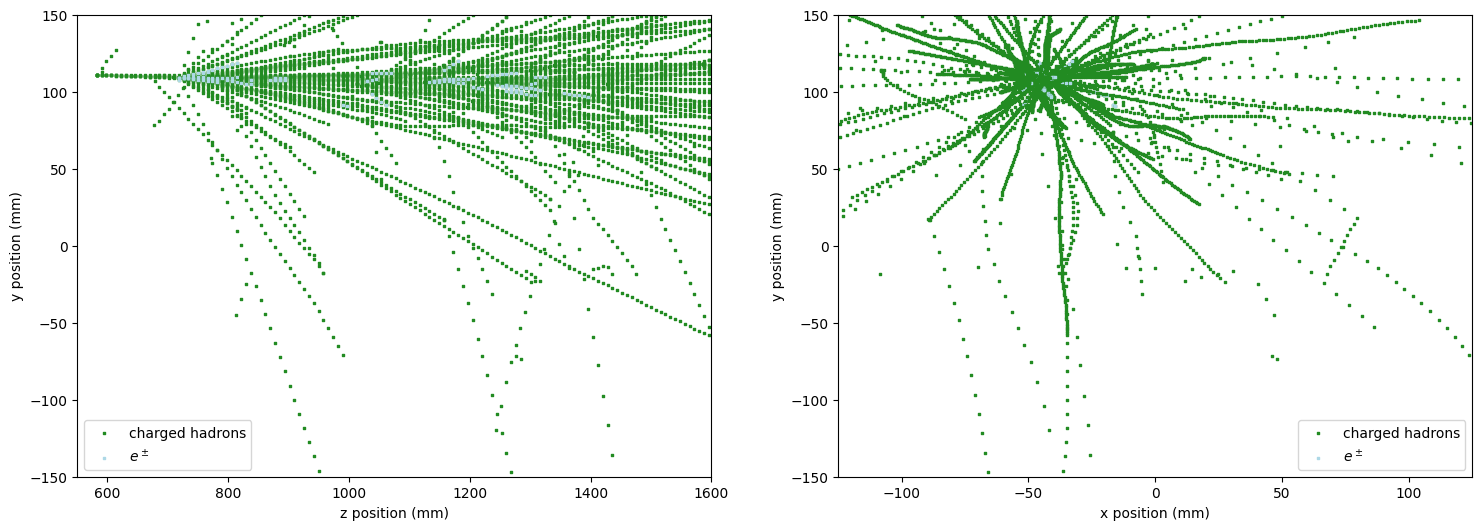

 37%|███▋      | 37/100 [03:33<06:17,  6.00s/it]

37


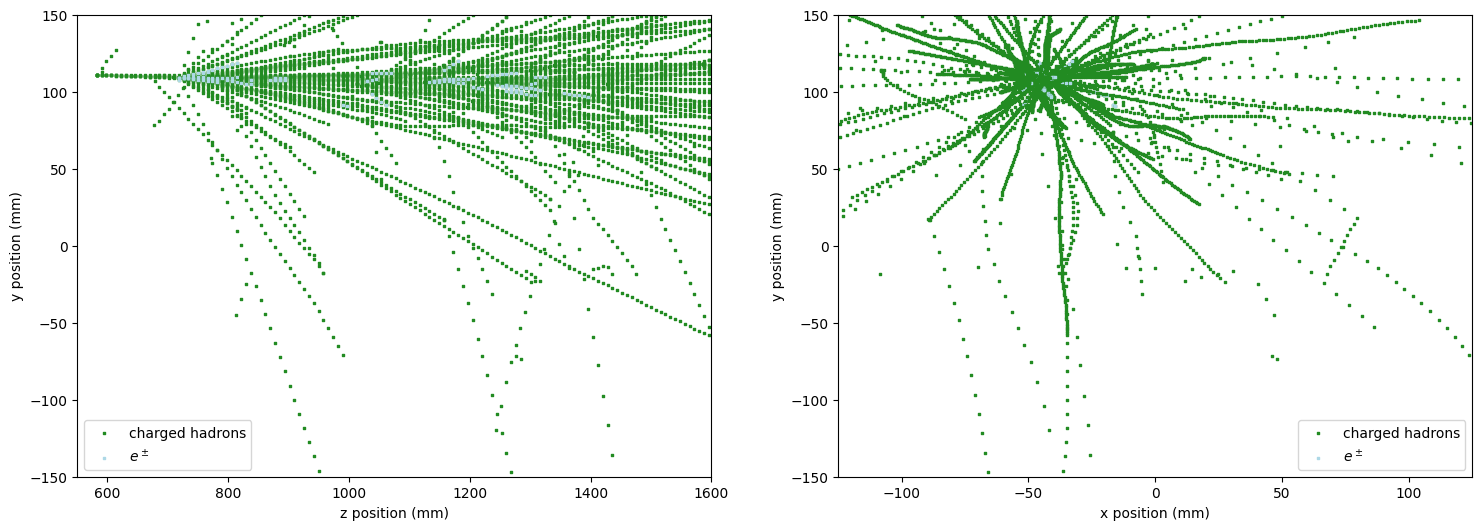

 38%|███▊      | 38/100 [03:40<06:25,  6.22s/it]

38


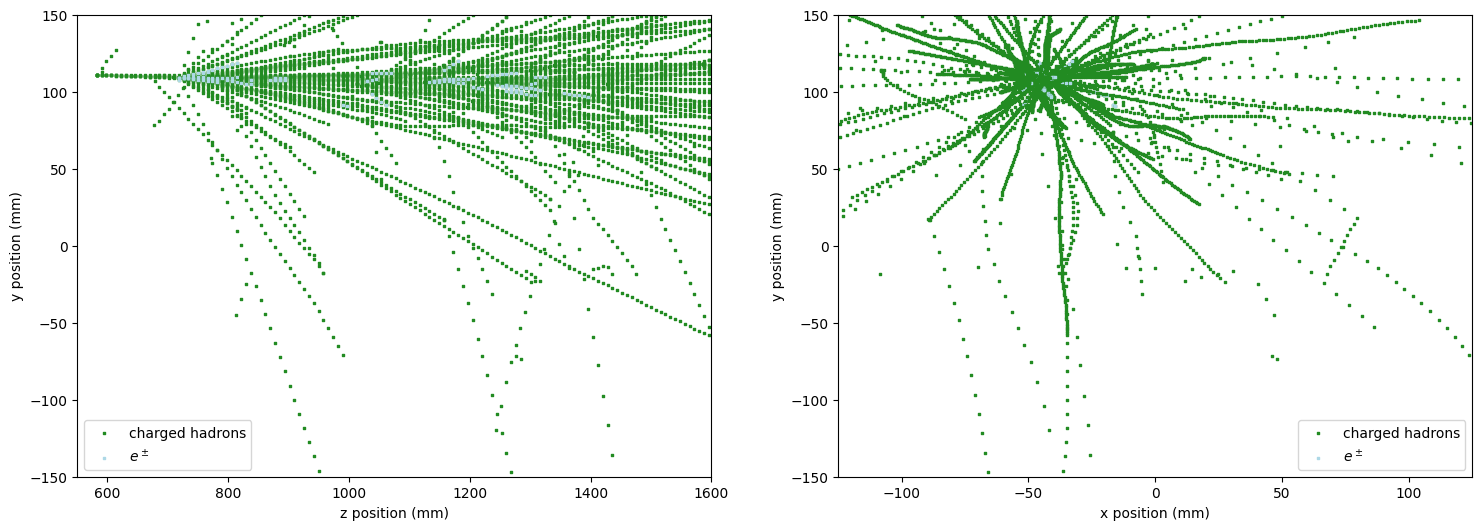

 39%|███▉      | 39/100 [03:47<06:30,  6.40s/it]

39


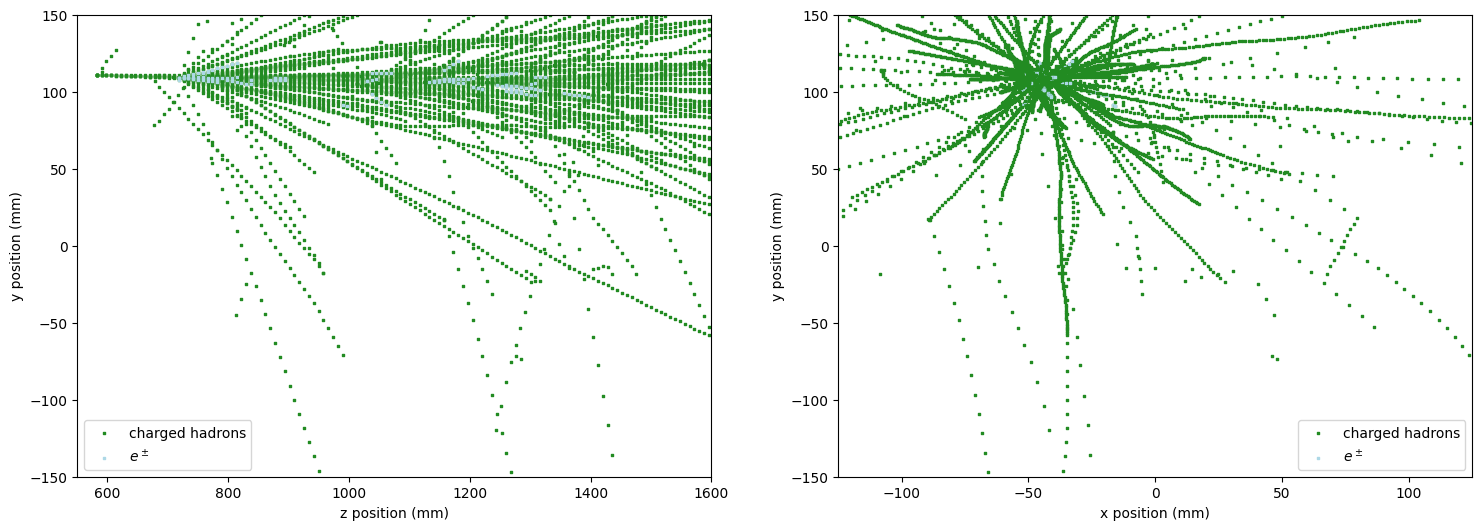

 40%|████      | 40/100 [03:54<06:42,  6.71s/it]

40


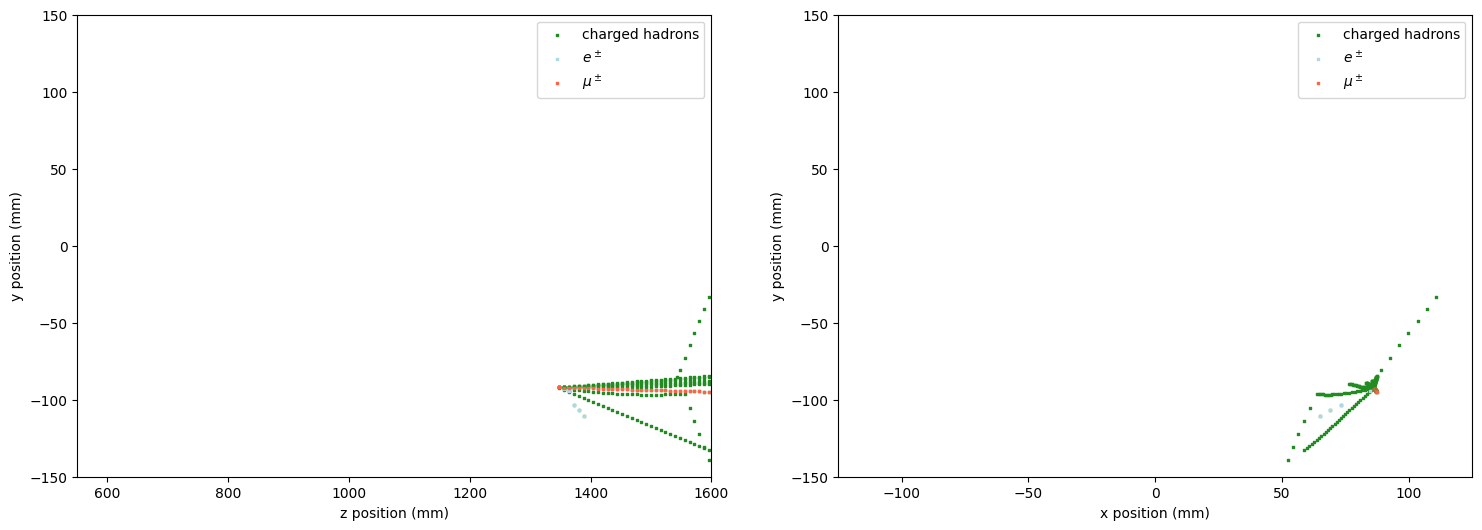

 41%|████      | 41/100 [03:59<06:02,  6.14s/it]

41


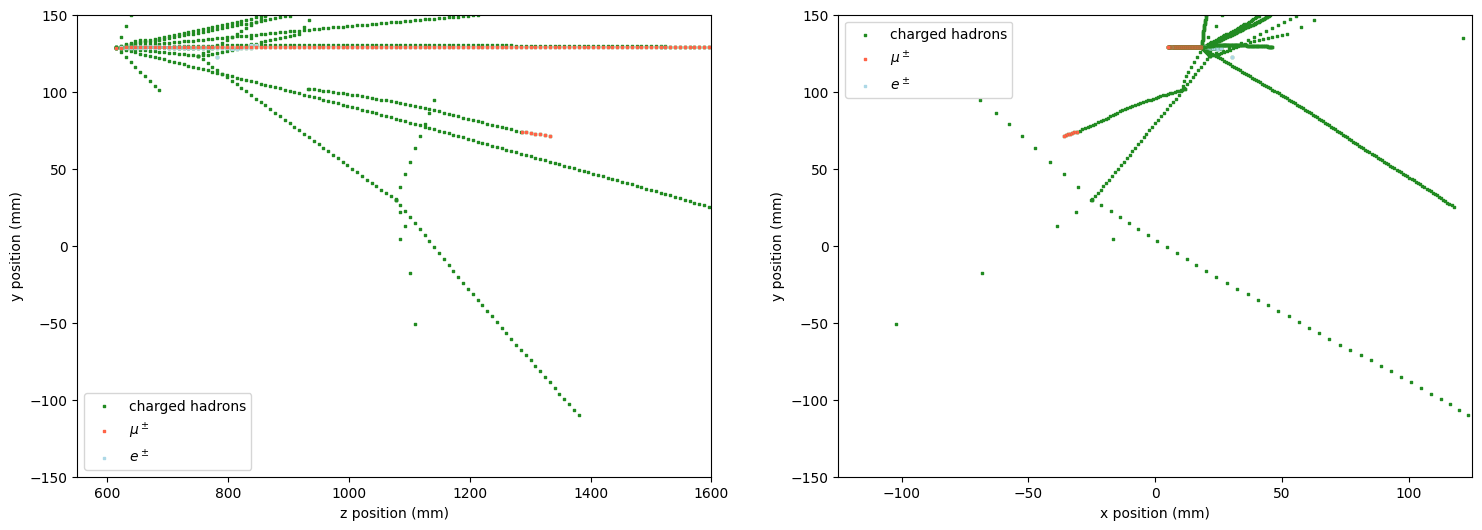

 42%|████▏     | 42/100 [04:06<06:16,  6.49s/it]

42


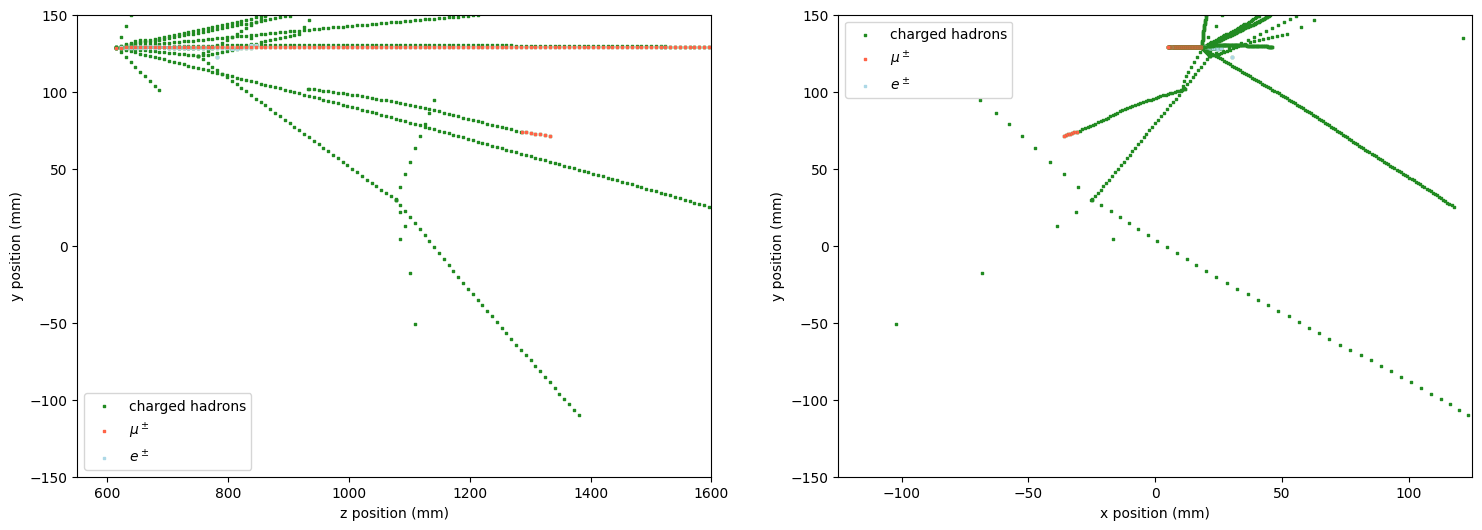

 43%|████▎     | 43/100 [04:13<06:19,  6.67s/it]

43


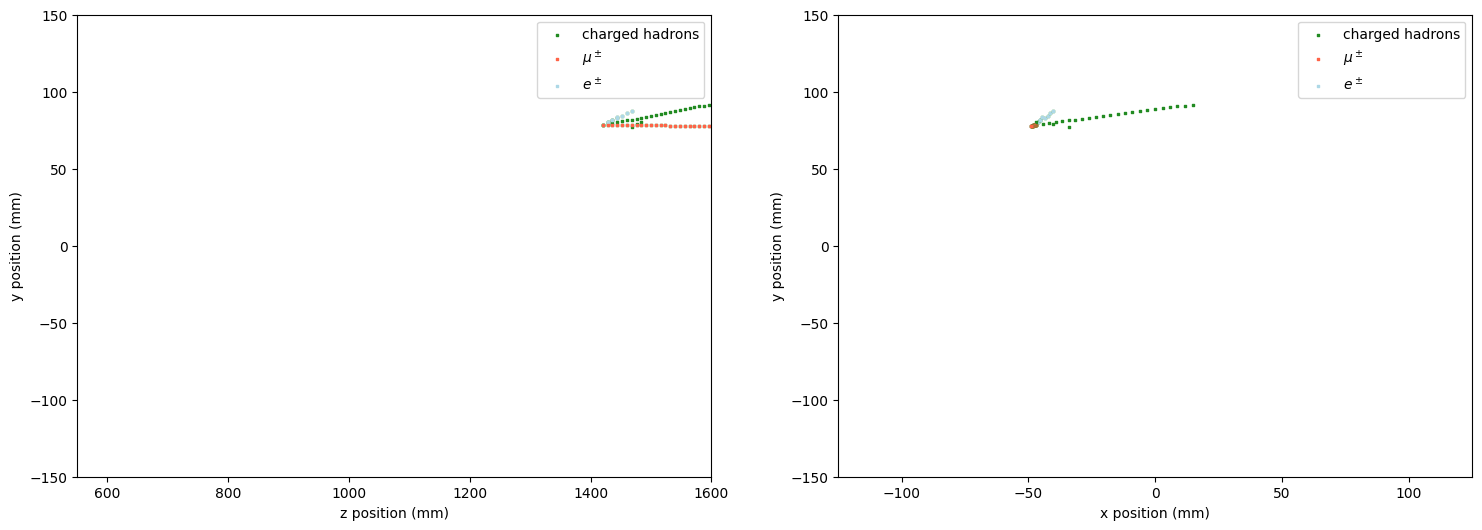

 44%|████▍     | 44/100 [04:18<05:50,  6.26s/it]

44


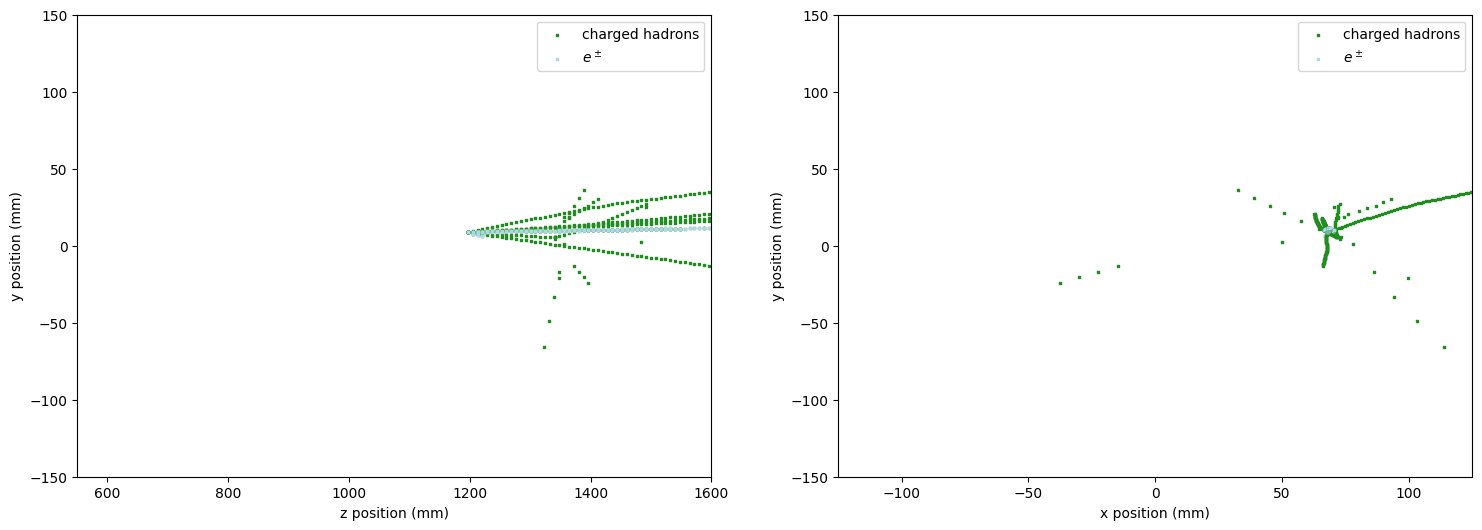

 45%|████▌     | 45/100 [04:24<05:29,  6.00s/it]

45


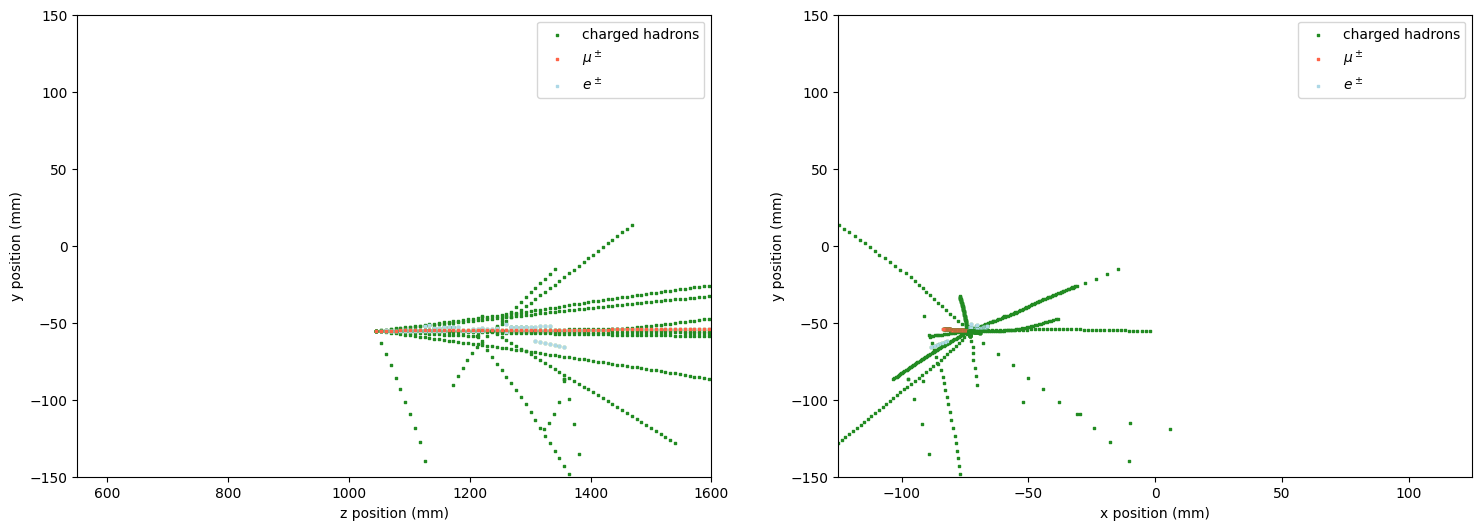

 46%|████▌     | 46/100 [04:30<05:22,  5.98s/it]

46


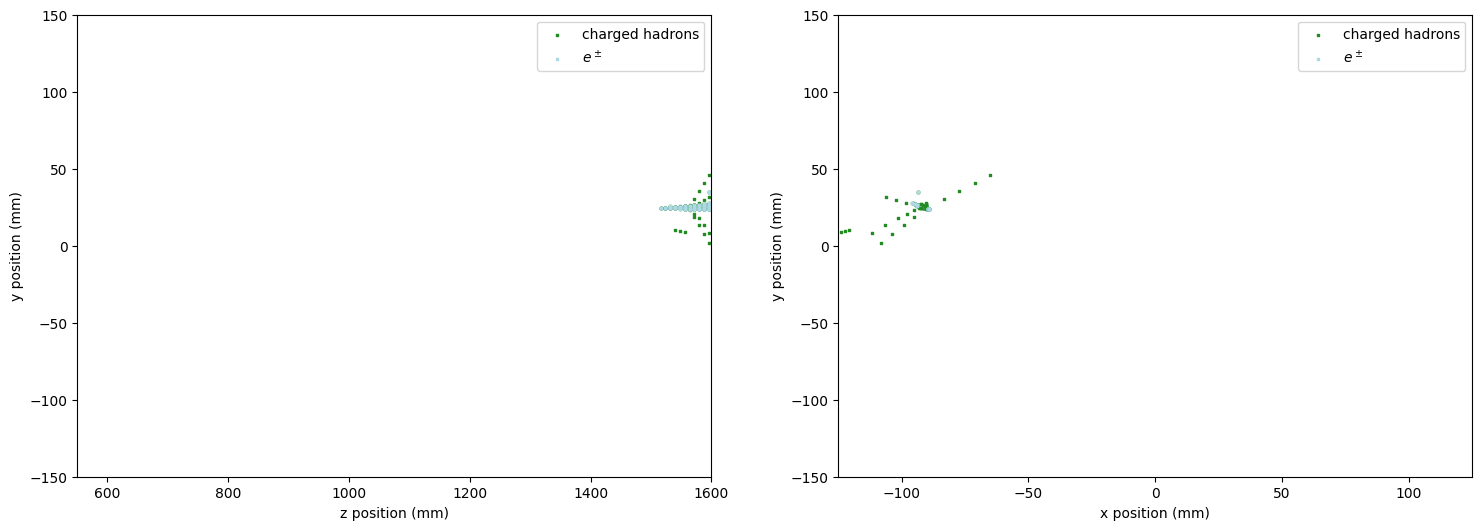

 47%|████▋     | 47/100 [04:34<04:53,  5.54s/it]

47


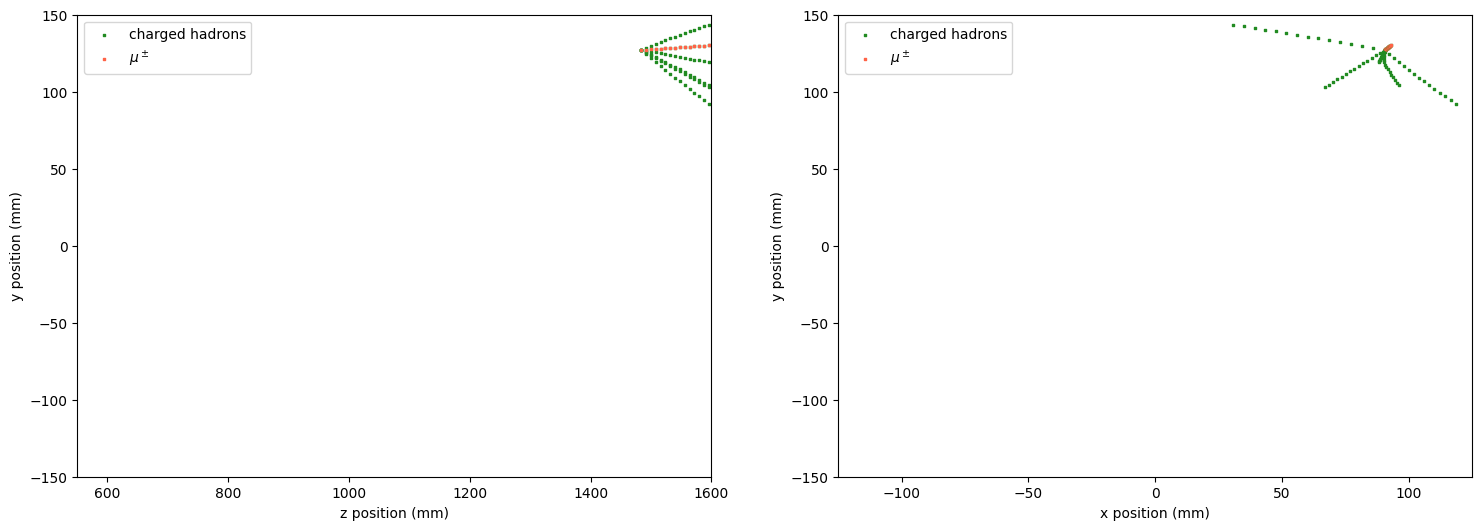

 48%|████▊     | 48/100 [04:39<04:29,  5.18s/it]

48


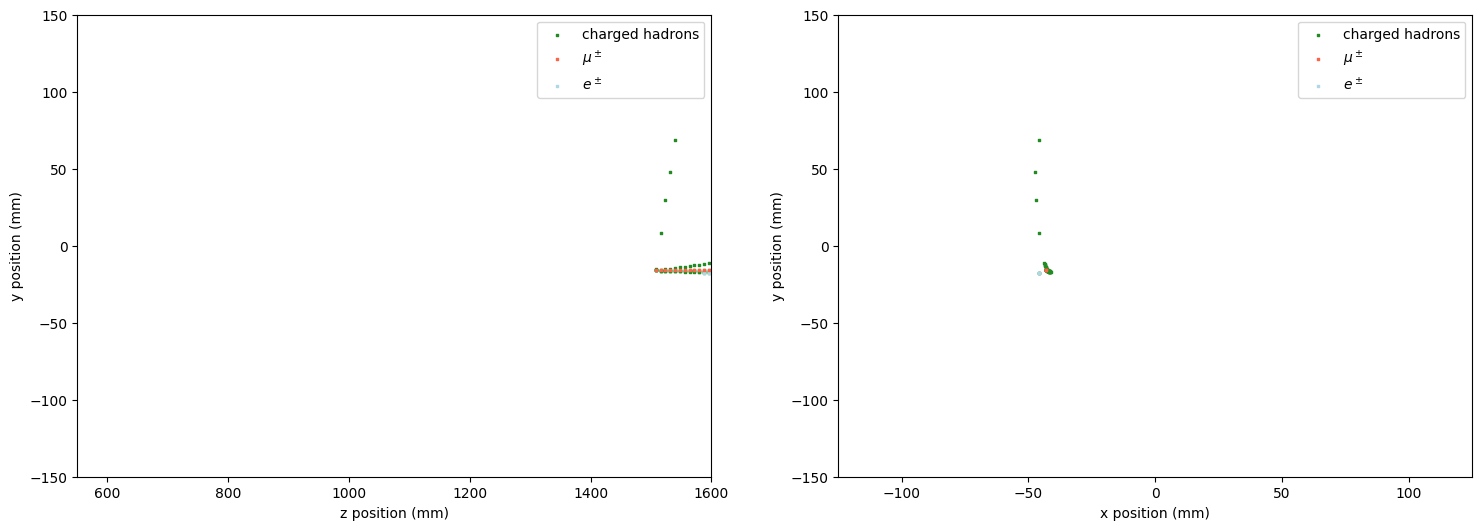

 49%|████▉     | 49/100 [04:43<04:13,  4.98s/it]

49


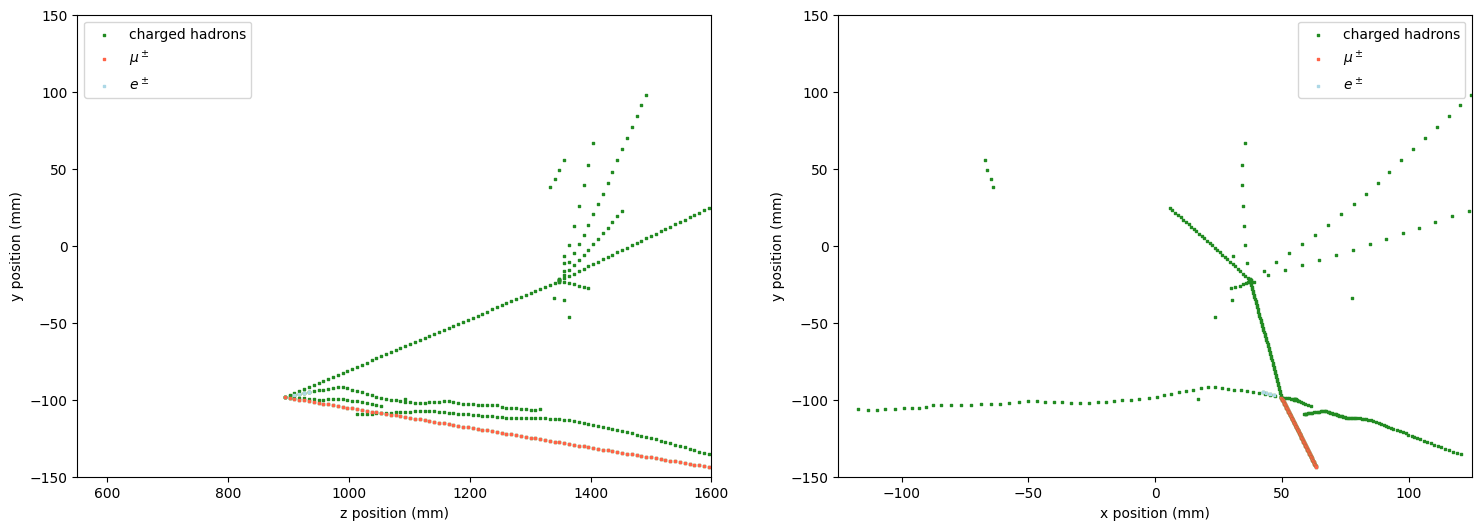

 50%|█████     | 50/100 [04:49<04:22,  5.24s/it]

50


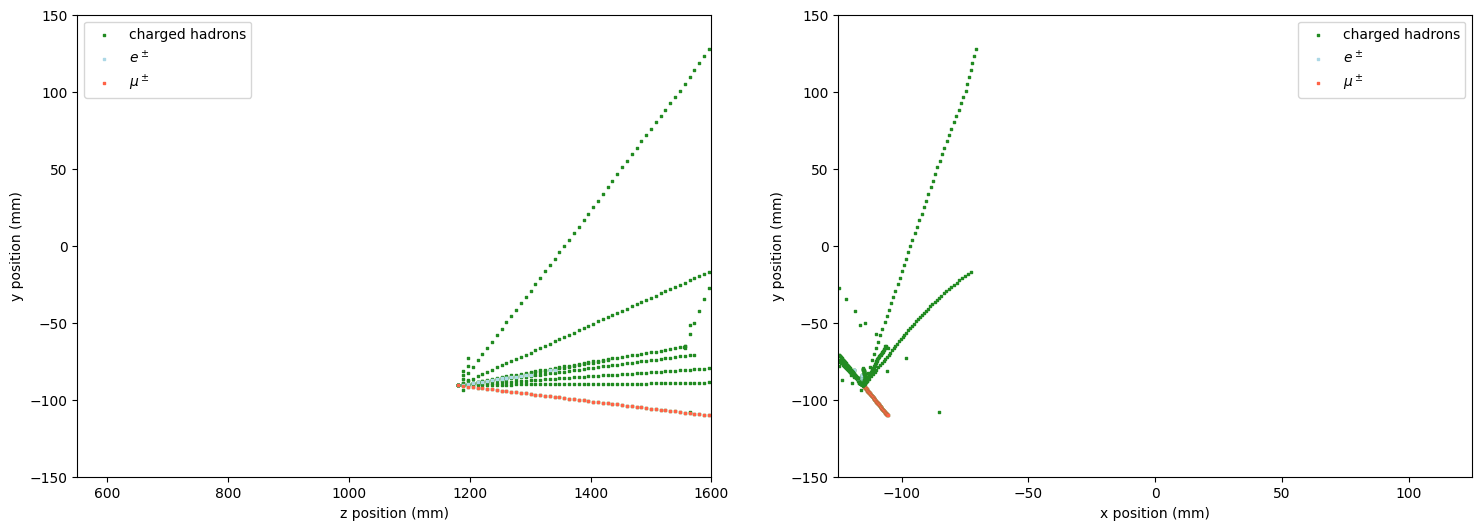

 51%|█████     | 51/100 [04:54<04:19,  5.29s/it]

51


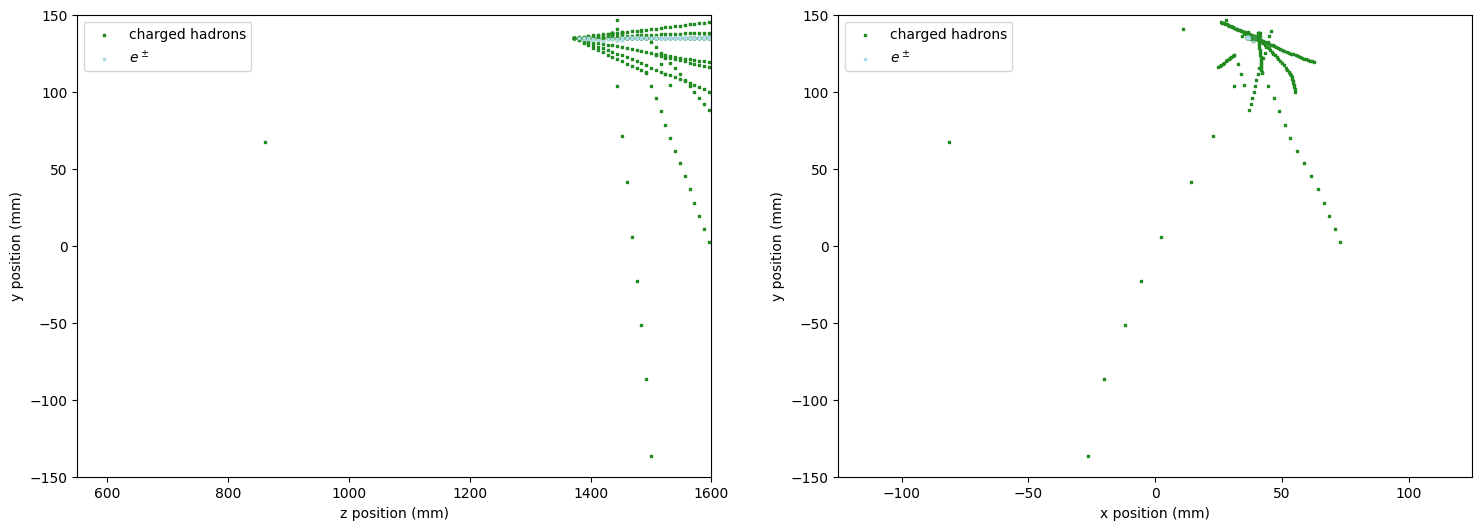

 52%|█████▏    | 52/100 [04:59<04:03,  5.07s/it]

52


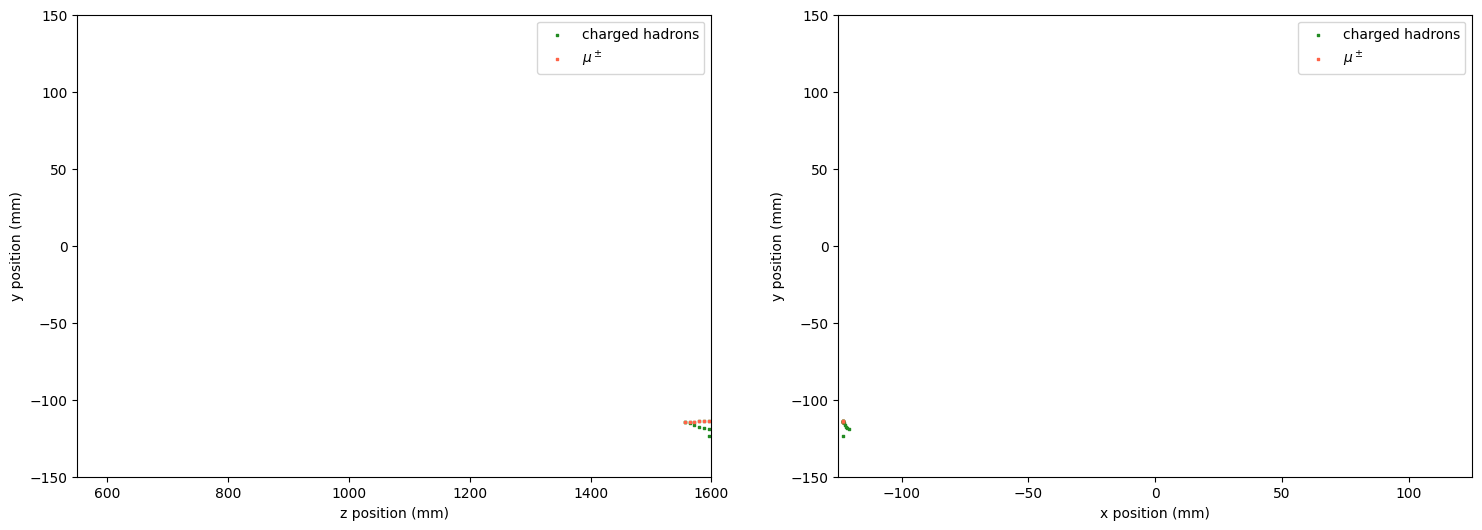

 53%|█████▎    | 53/100 [05:03<03:46,  4.81s/it]

53


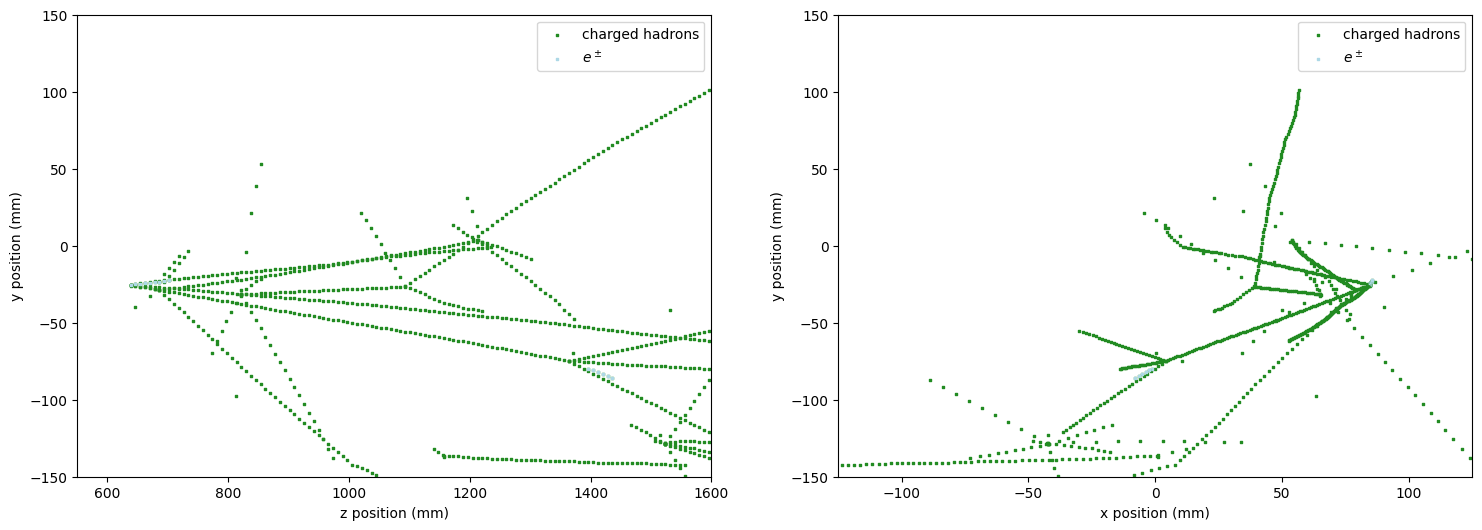

 54%|█████▍    | 54/100 [05:09<03:48,  4.96s/it]

54


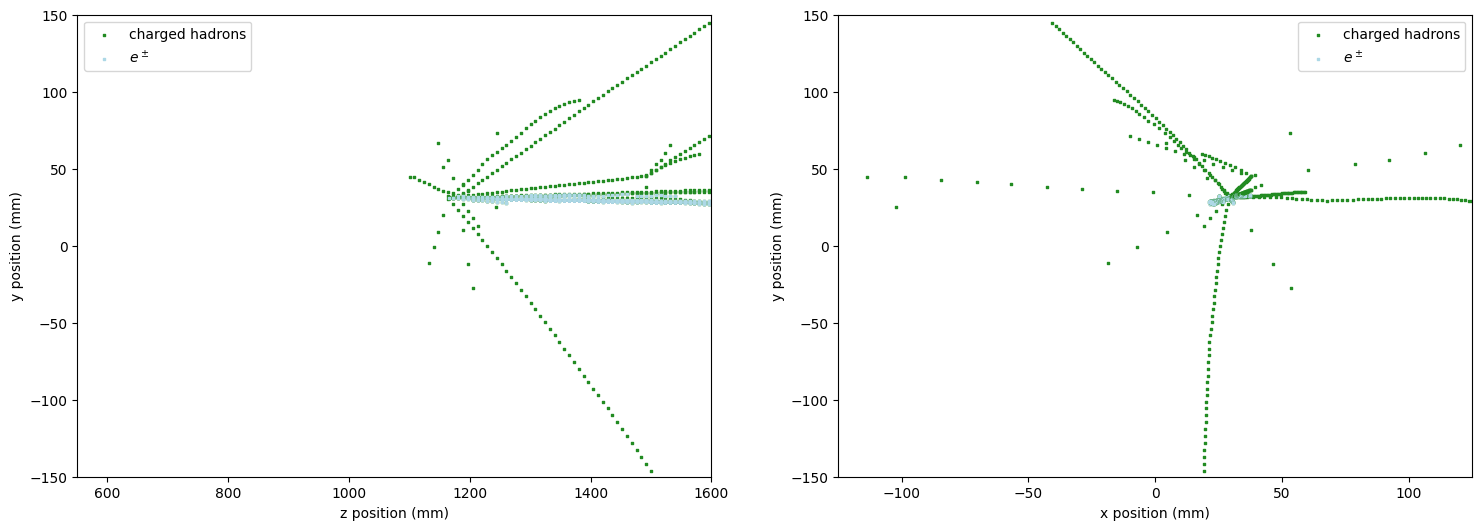

 55%|█████▌    | 55/100 [05:14<03:52,  5.16s/it]

55


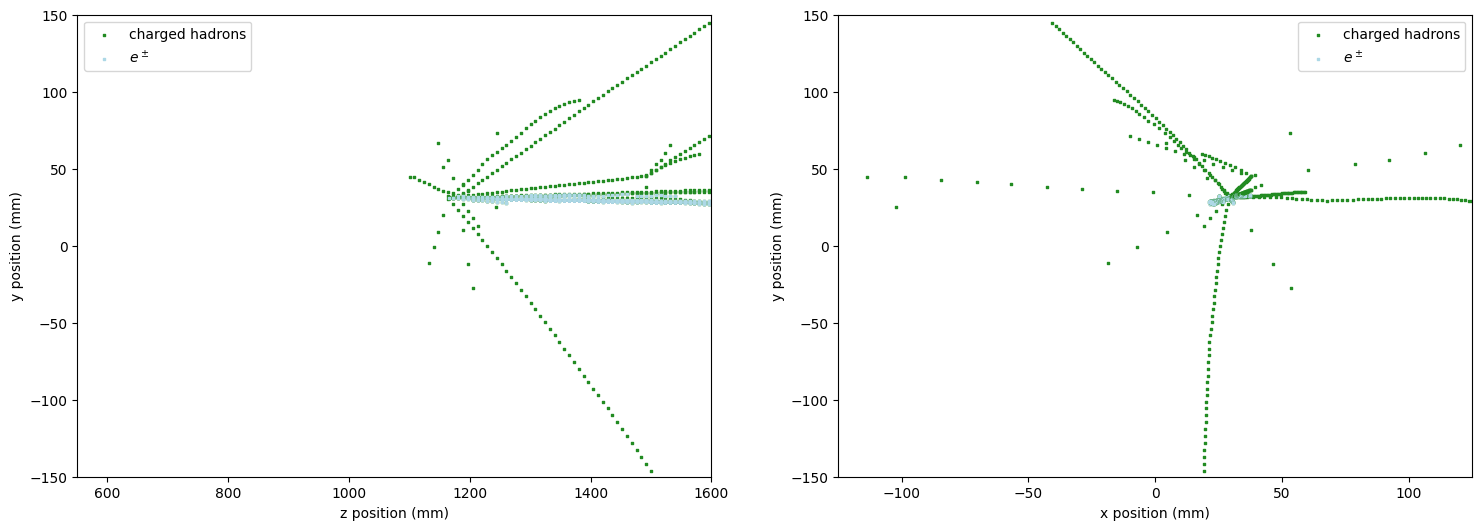

 56%|█████▌    | 56/100 [05:20<03:49,  5.23s/it]

56


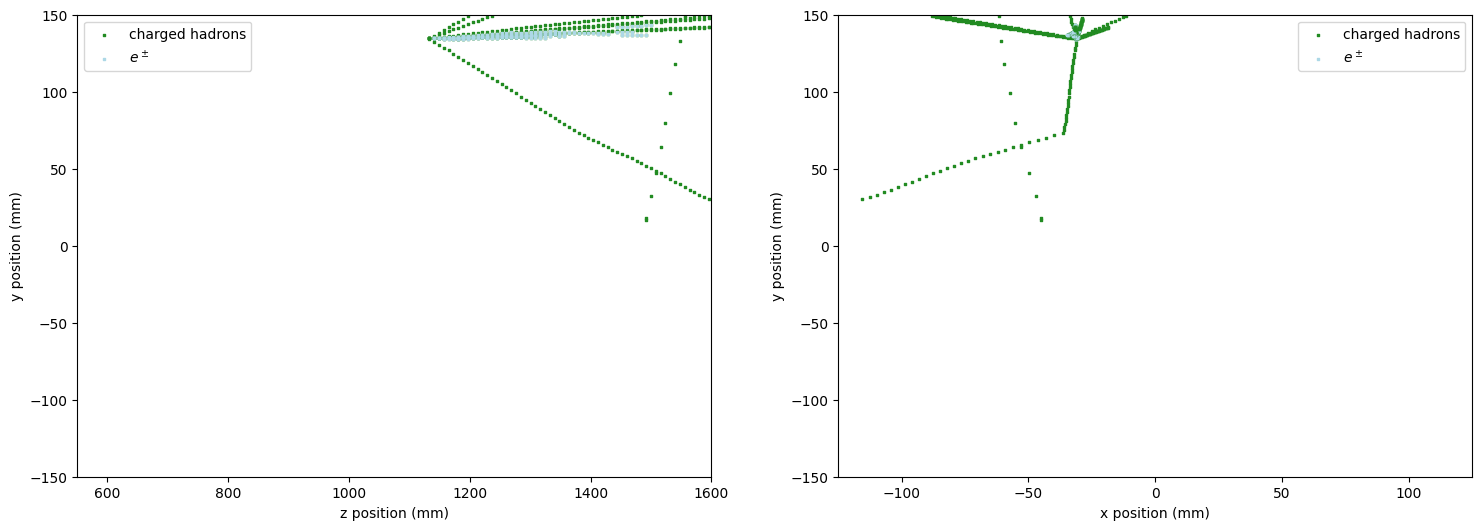

 57%|█████▋    | 57/100 [05:25<03:44,  5.22s/it]

57


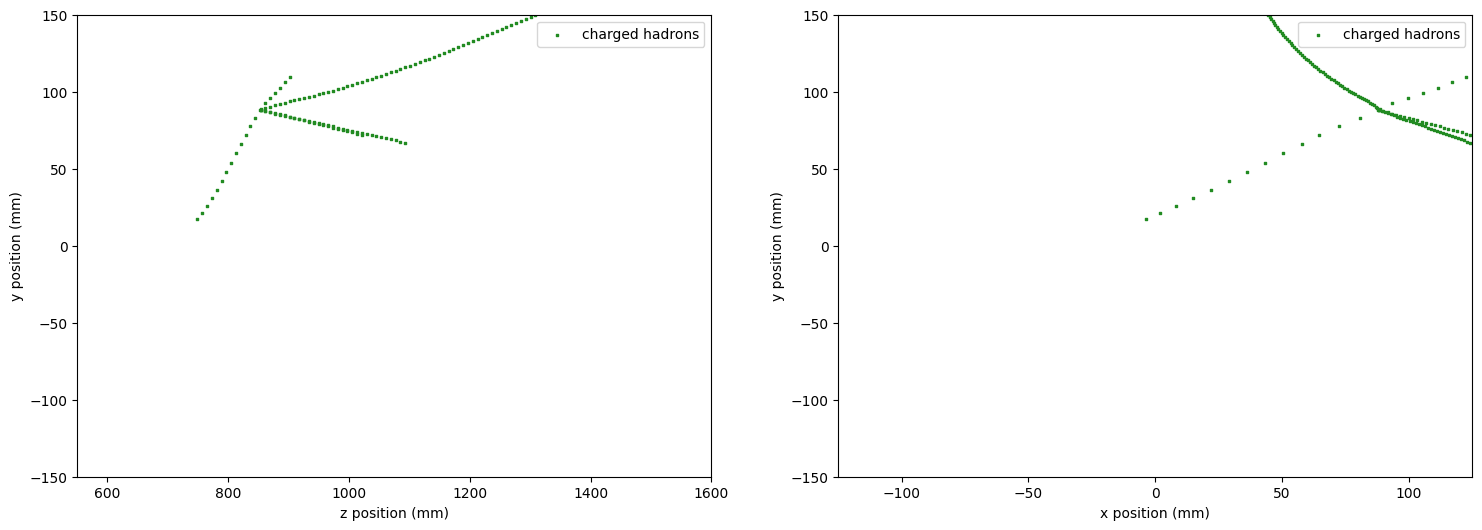

 58%|█████▊    | 58/100 [05:30<03:37,  5.18s/it]

58


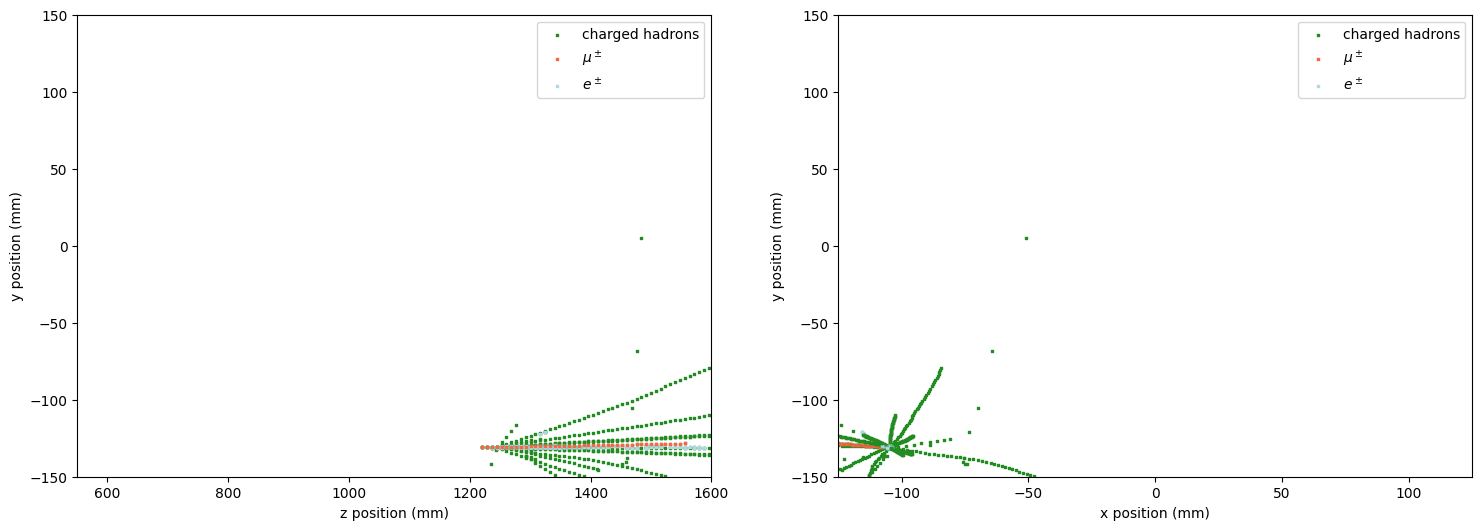

 59%|█████▉    | 59/100 [05:35<03:34,  5.22s/it]

59


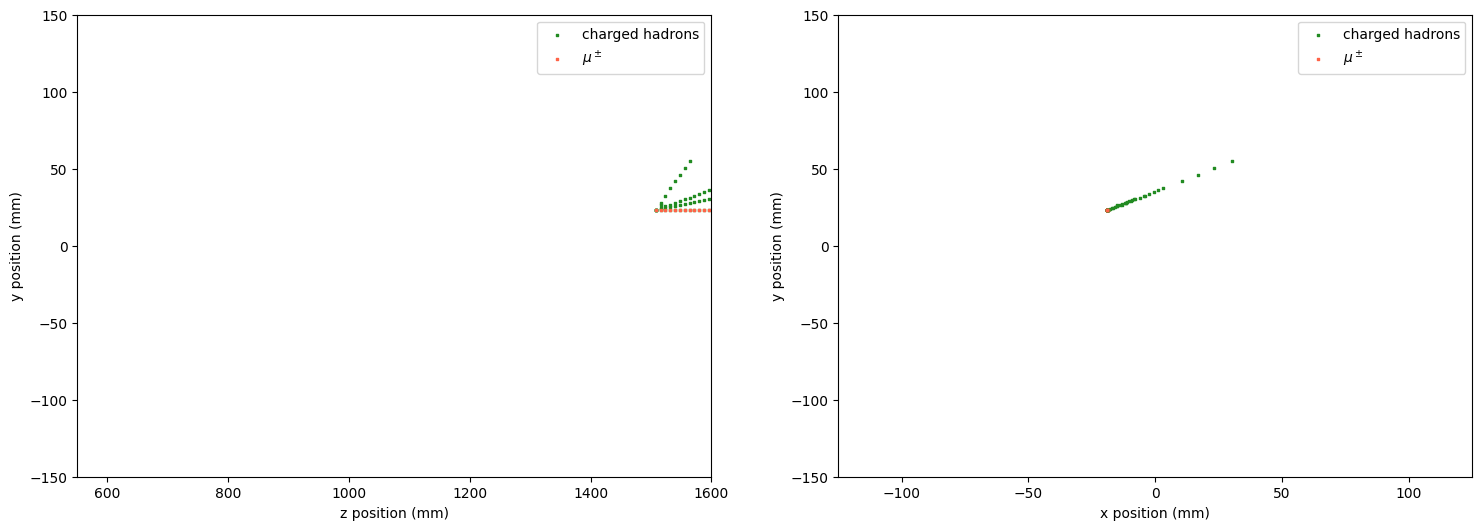

 60%|██████    | 60/100 [05:39<03:18,  4.96s/it]

60


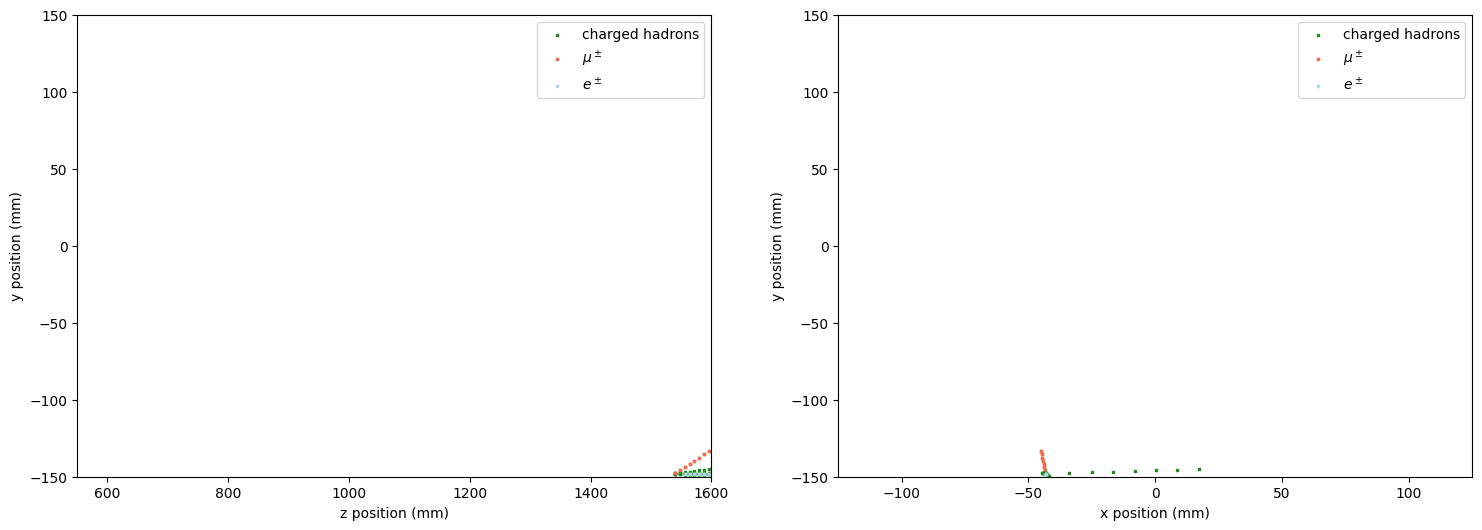

 61%|██████    | 61/100 [05:44<03:08,  4.83s/it]

61


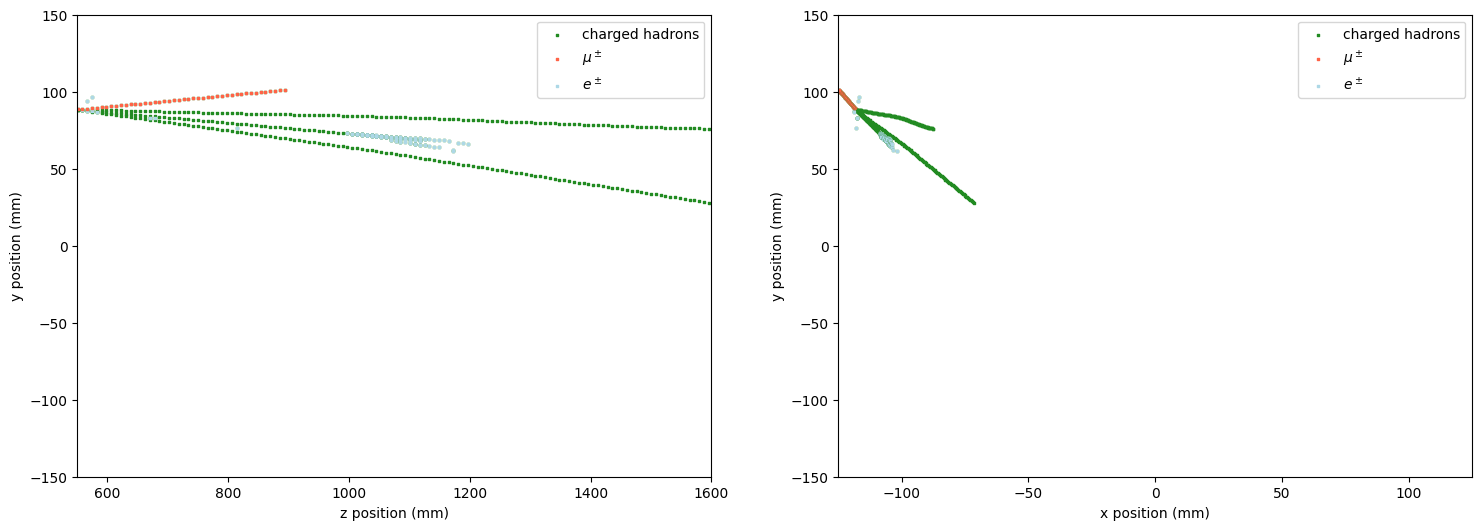

 62%|██████▏   | 62/100 [05:50<03:16,  5.16s/it]

62


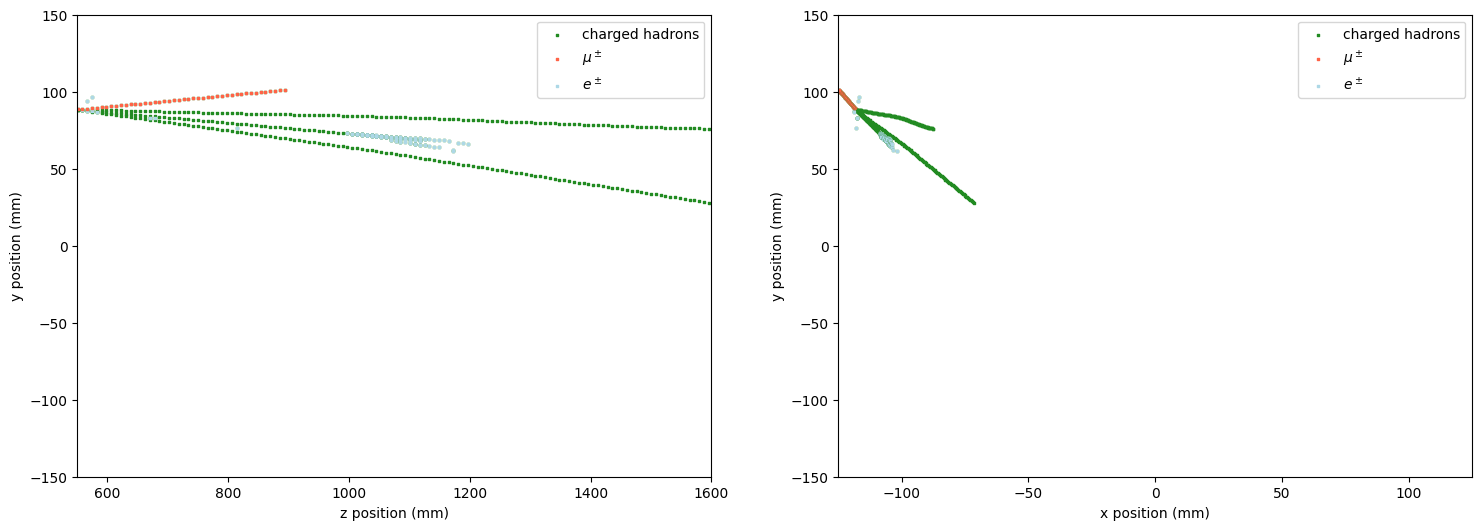

 63%|██████▎   | 63/100 [05:56<03:20,  5.43s/it]

63


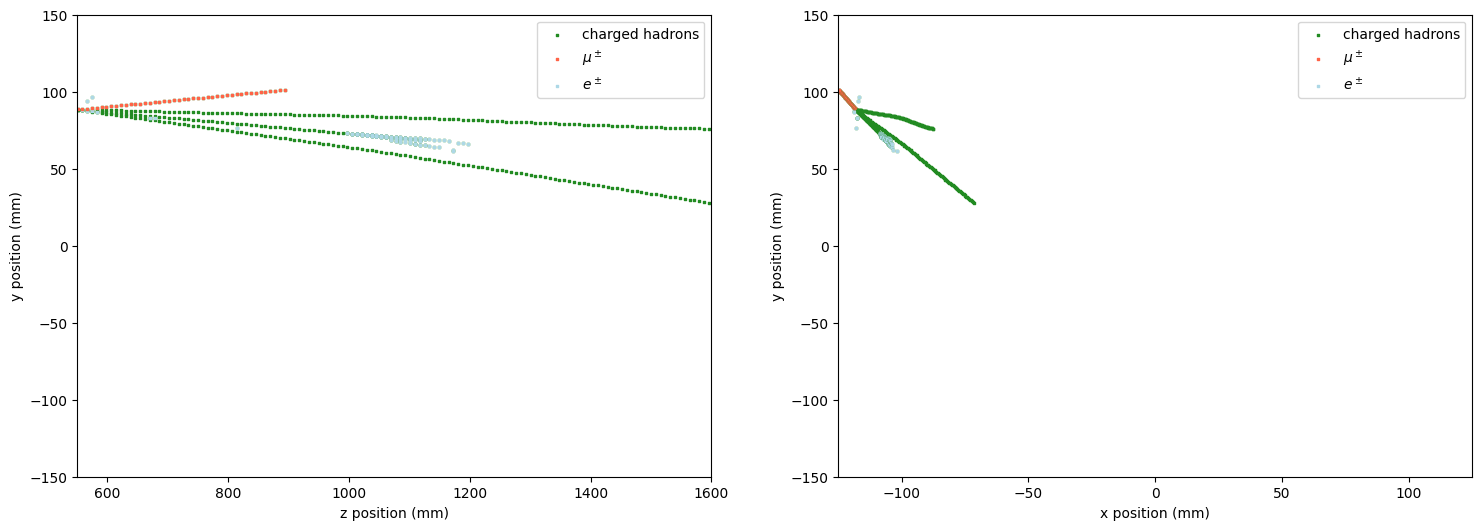

 64%|██████▍   | 64/100 [06:02<03:20,  5.57s/it]

64


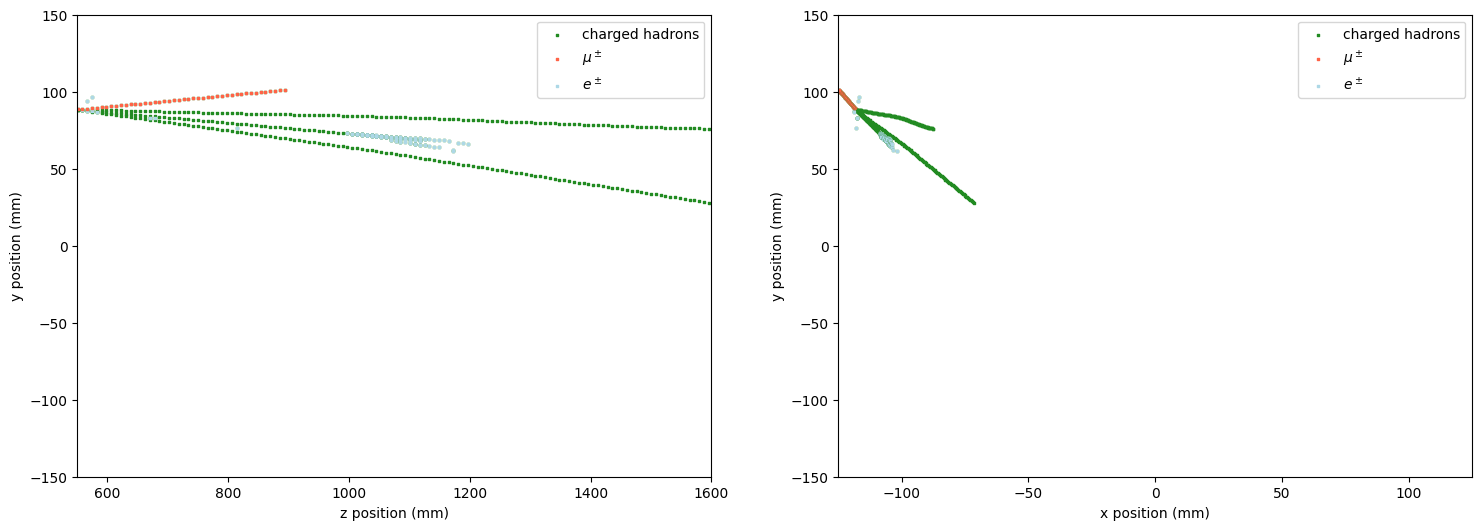

 65%|██████▌   | 65/100 [06:08<03:20,  5.74s/it]

65


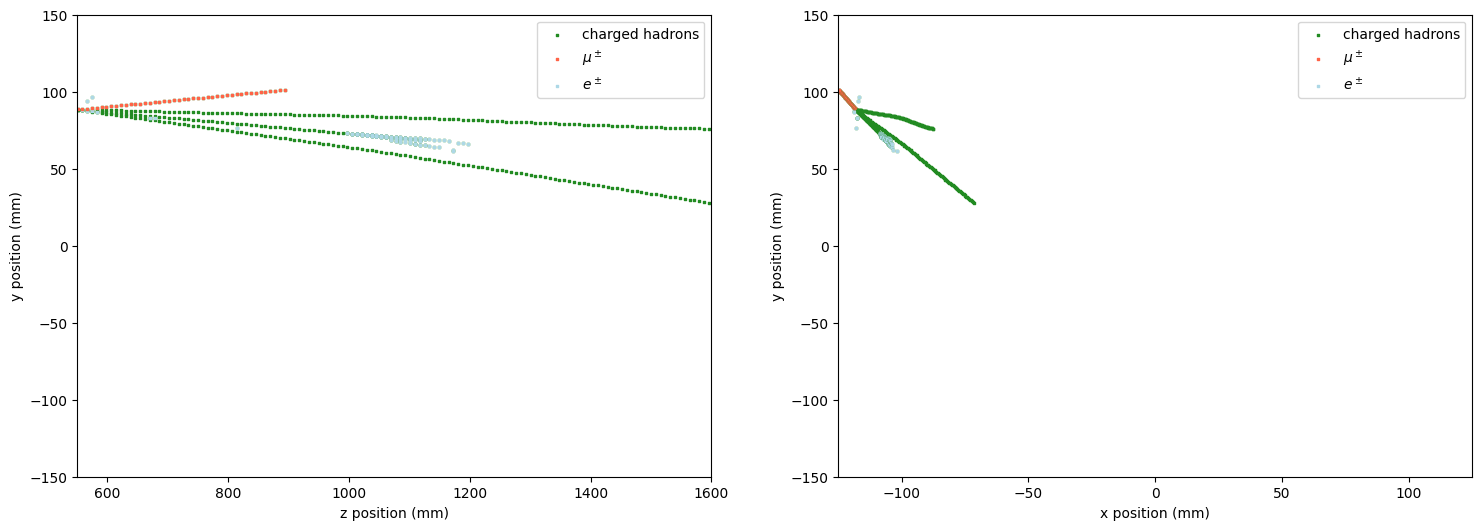

 66%|██████▌   | 66/100 [06:14<03:18,  5.83s/it]

66


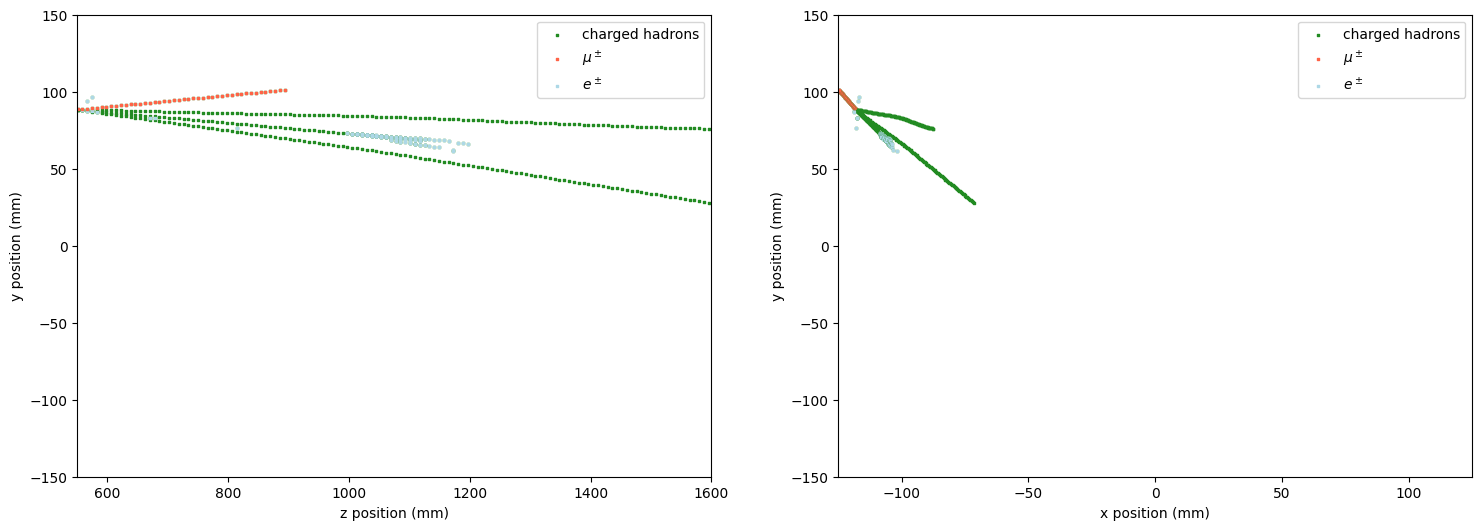

 67%|██████▋   | 67/100 [06:21<03:20,  6.08s/it]

67


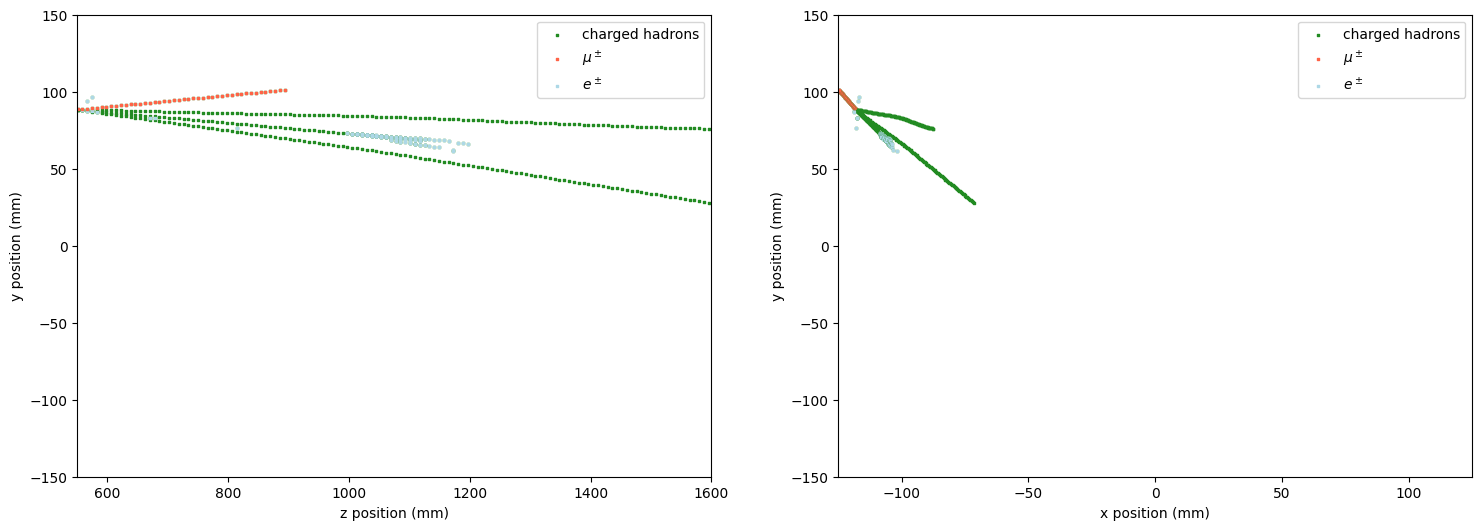

 68%|██████▊   | 68/100 [06:27<03:20,  6.27s/it]

68


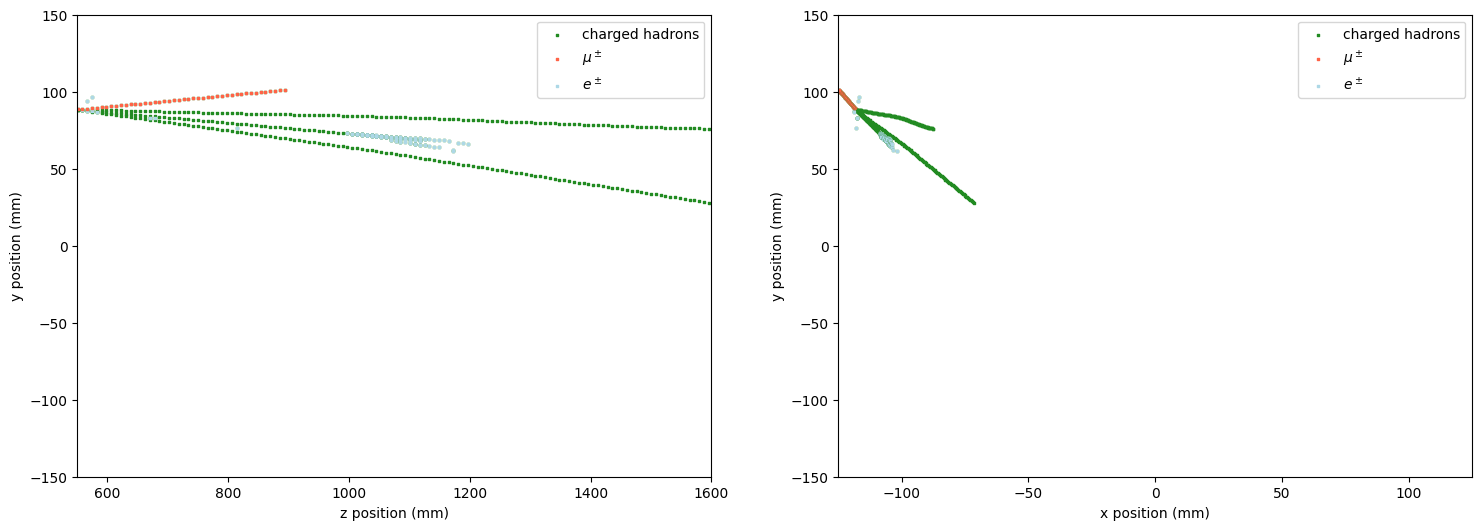

 69%|██████▉   | 69/100 [06:34<03:18,  6.40s/it]

69


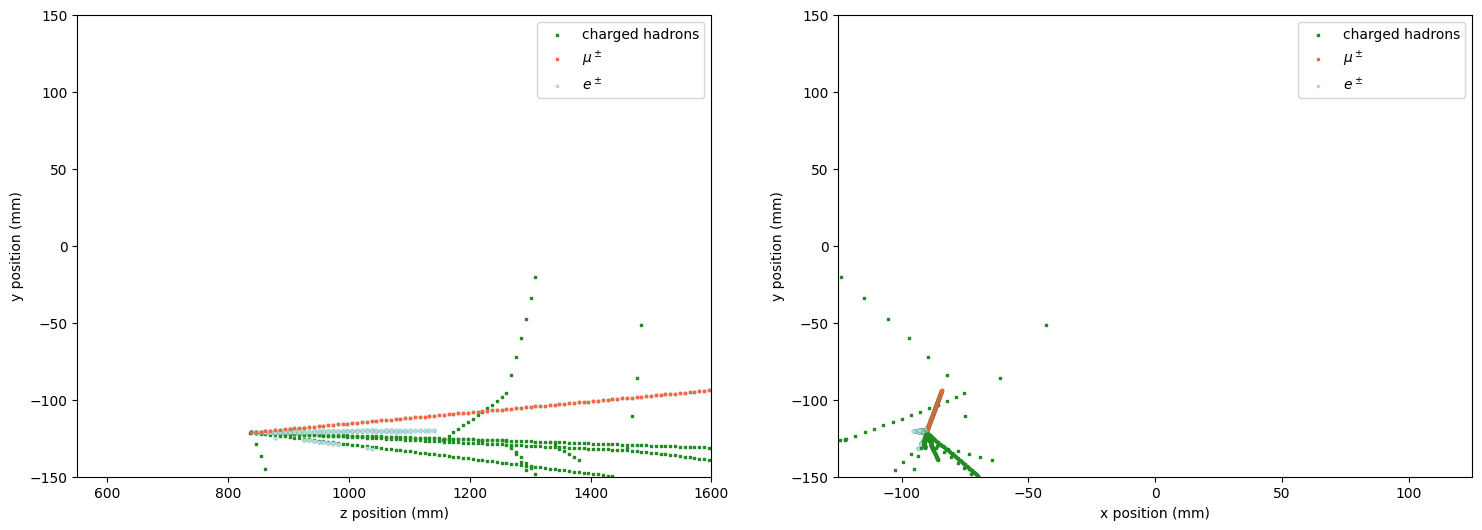

 70%|███████   | 70/100 [06:40<03:11,  6.38s/it]

70


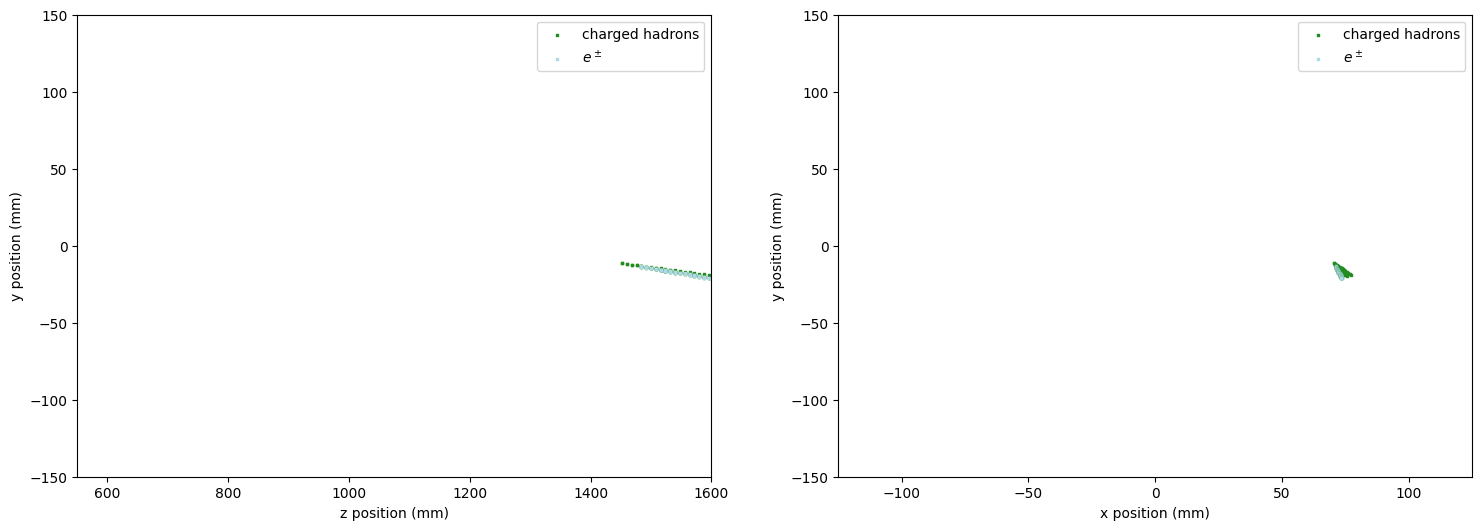

 71%|███████   | 71/100 [06:45<02:47,  5.78s/it]

71


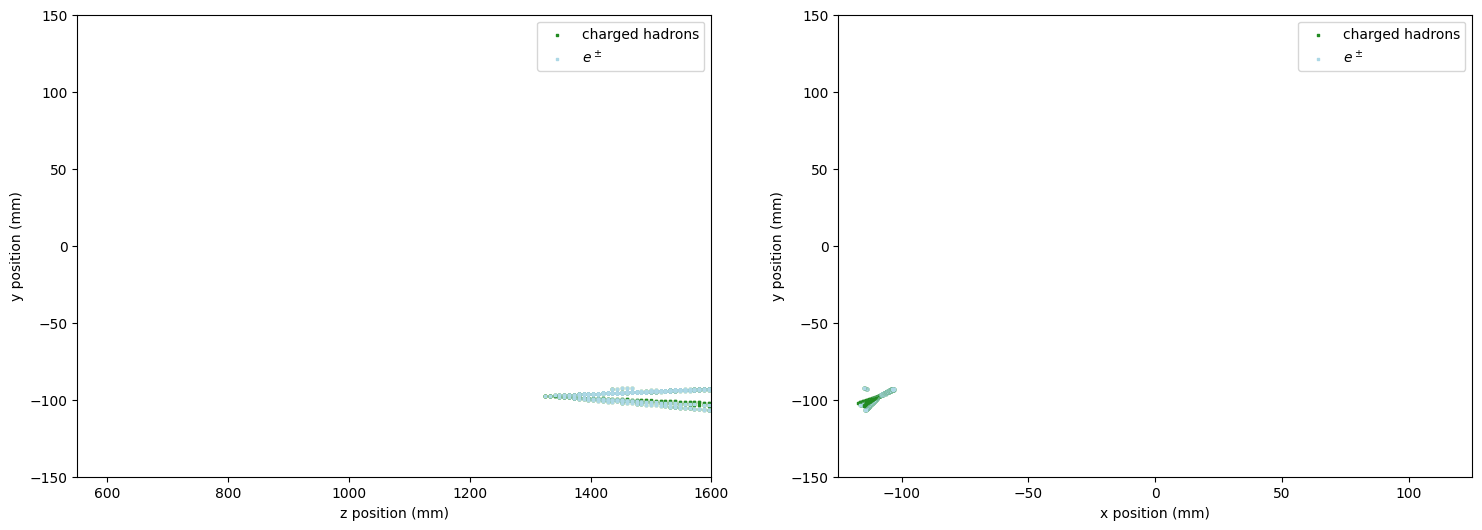

 72%|███████▏  | 72/100 [06:50<02:32,  5.45s/it]

72


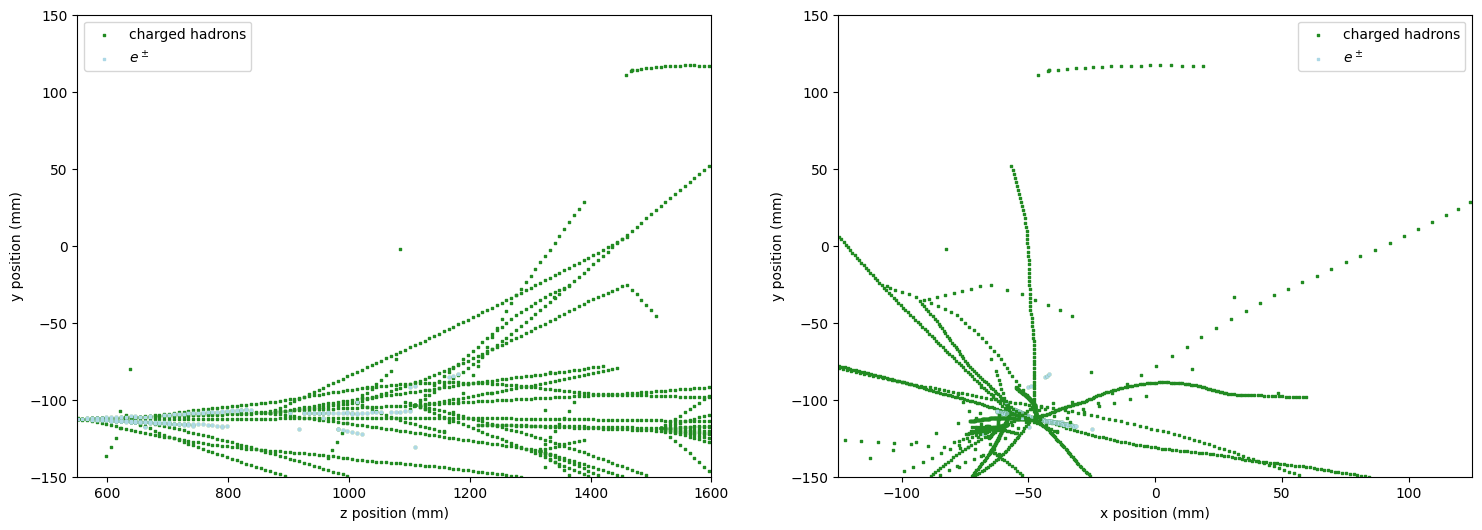

 73%|███████▎  | 73/100 [06:56<02:33,  5.70s/it]

73


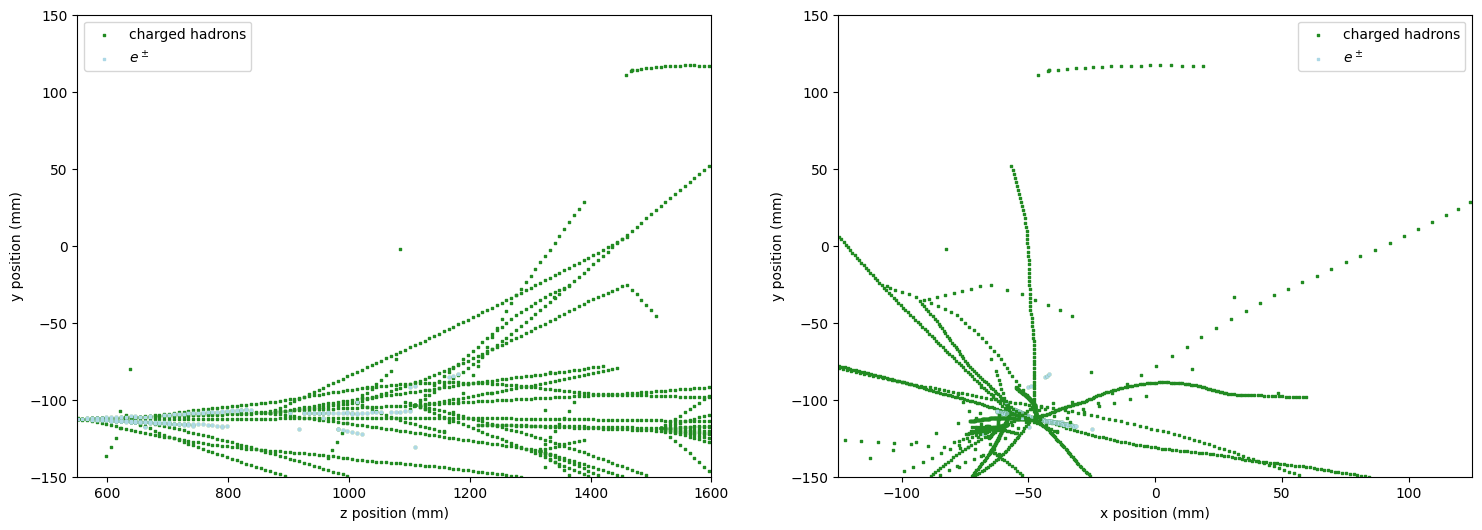

 74%|███████▍  | 74/100 [07:02<02:31,  5.81s/it]

74


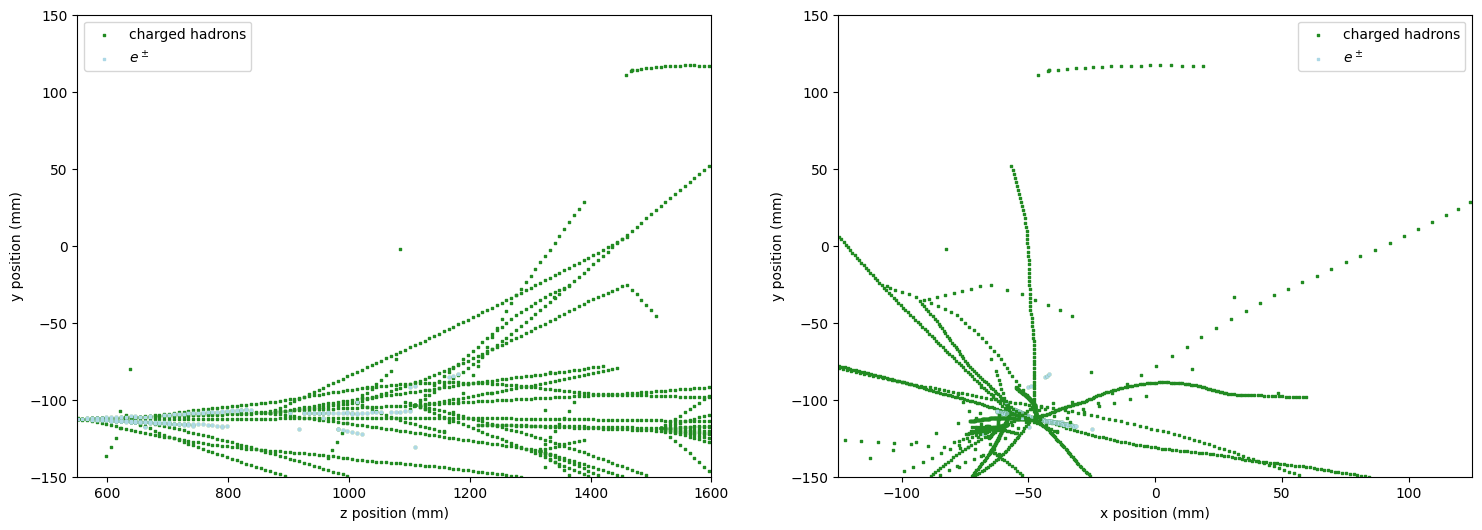

 75%|███████▌  | 75/100 [07:08<02:30,  6.01s/it]

75


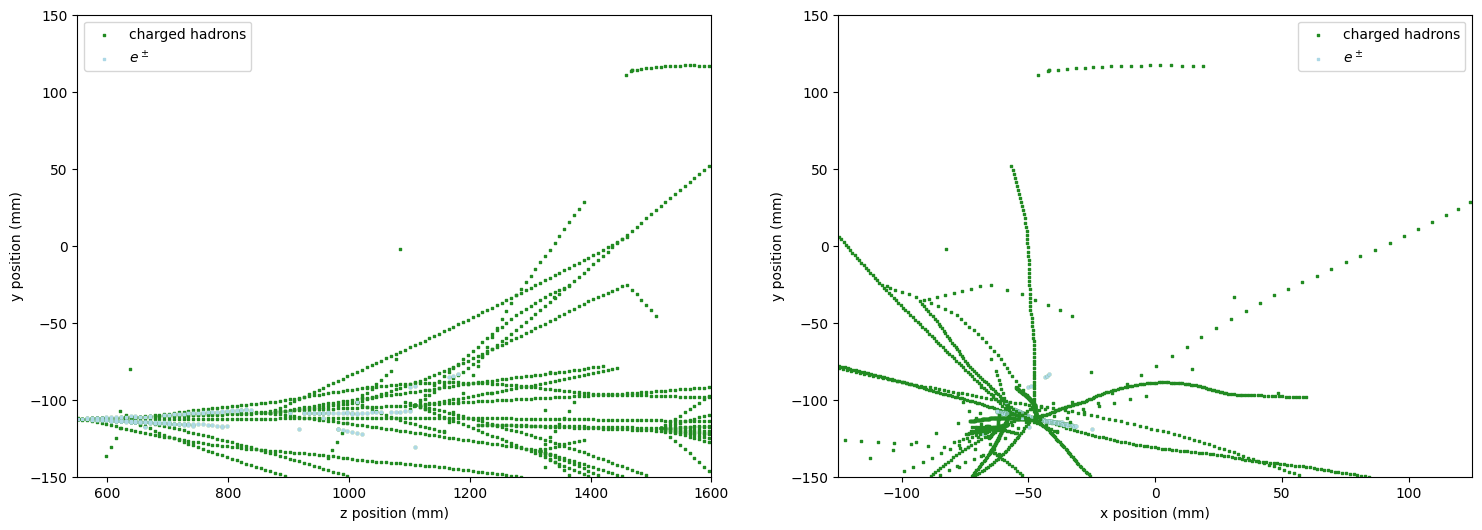

 76%|███████▌  | 76/100 [07:14<02:23,  6.00s/it]

76


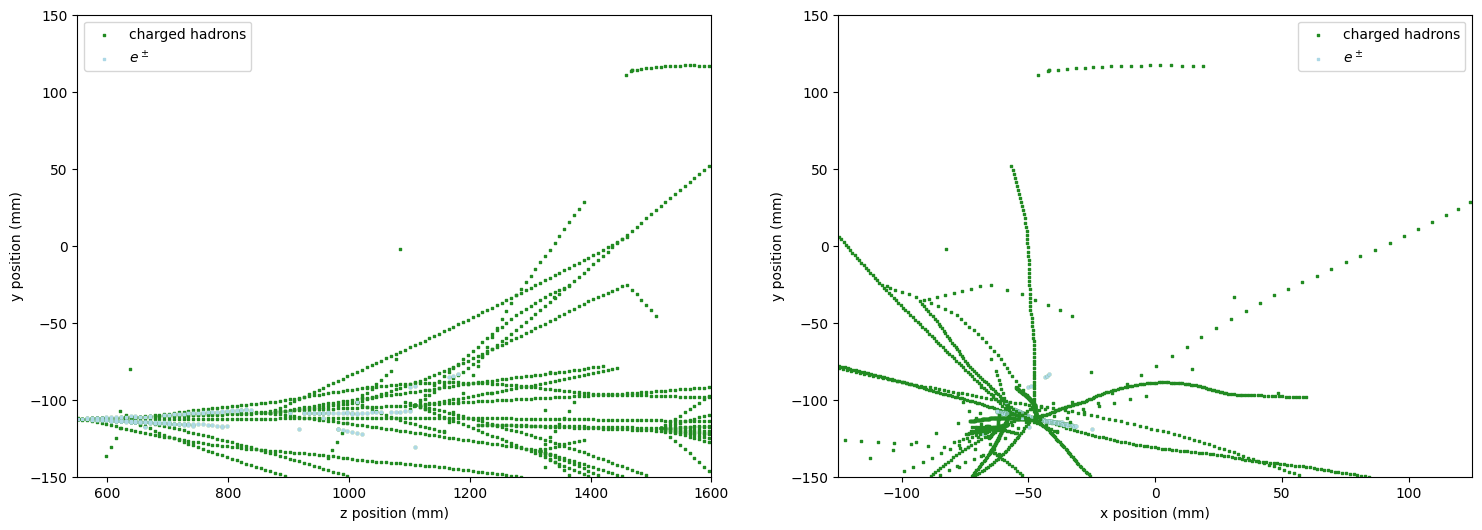

 77%|███████▋  | 77/100 [07:21<02:20,  6.11s/it]

77


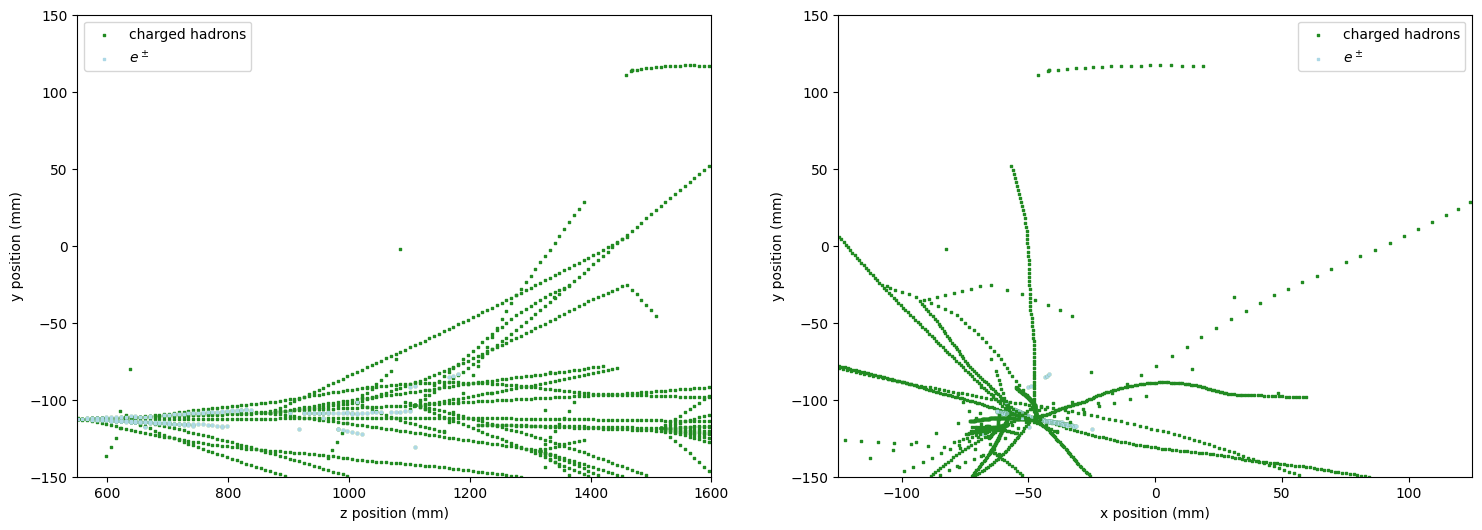

 78%|███████▊  | 78/100 [07:27<02:15,  6.14s/it]

78


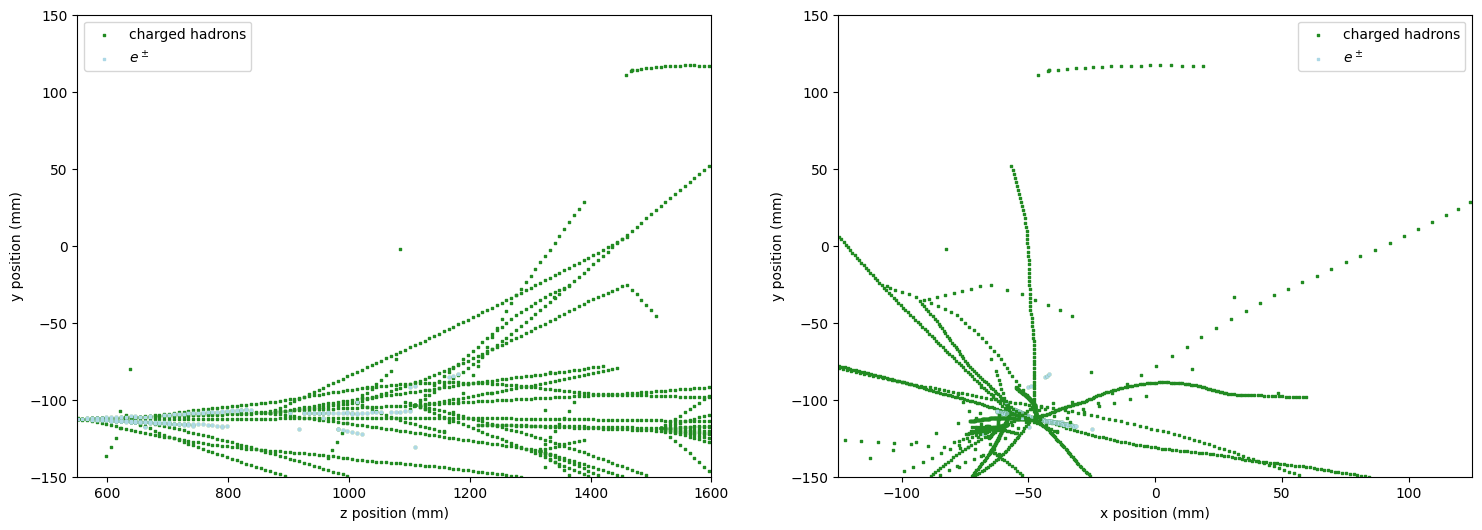

 79%|███████▉  | 79/100 [07:33<02:09,  6.18s/it]

79


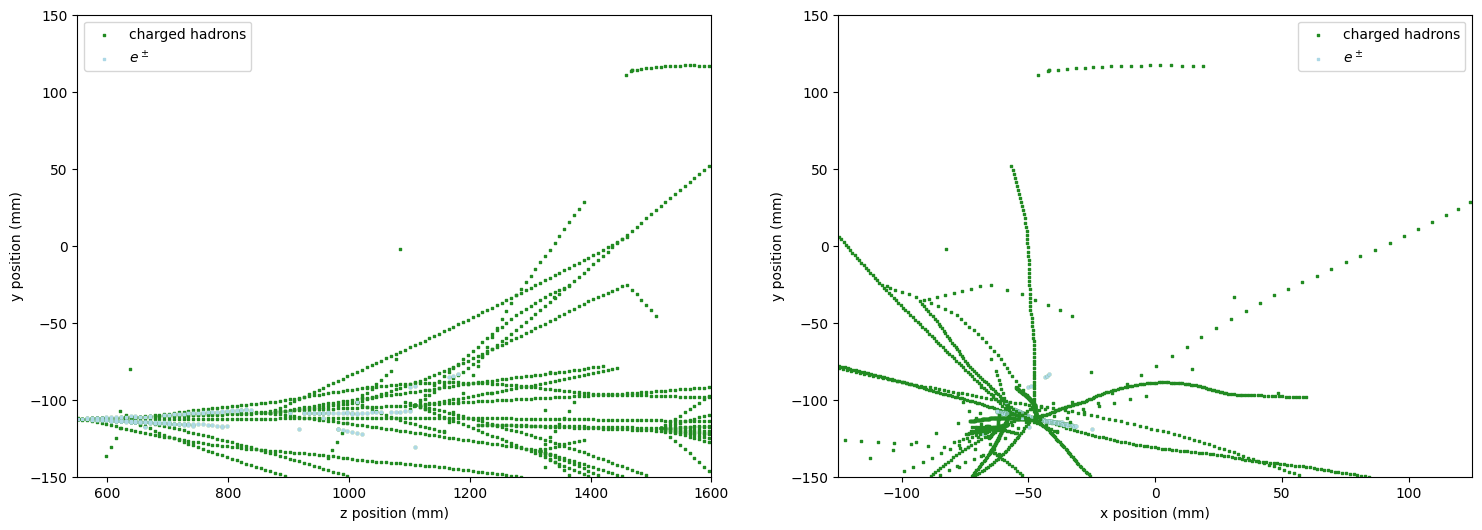

 80%|████████  | 80/100 [07:40<02:05,  6.26s/it]

80


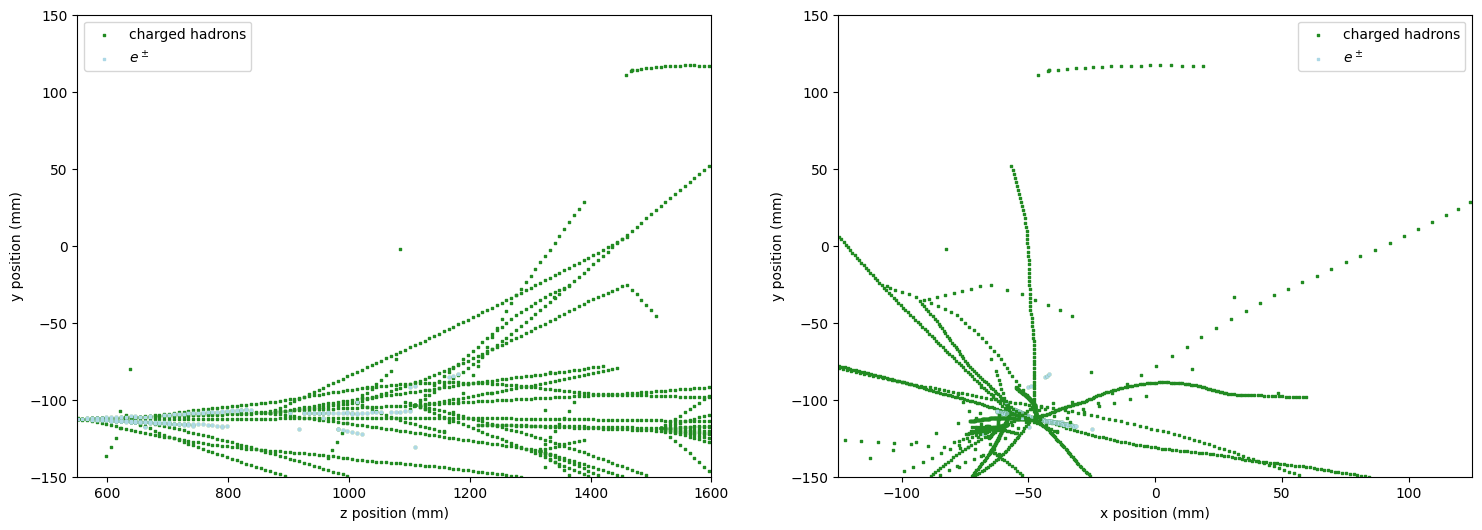

 81%|████████  | 81/100 [07:47<02:07,  6.70s/it]

81


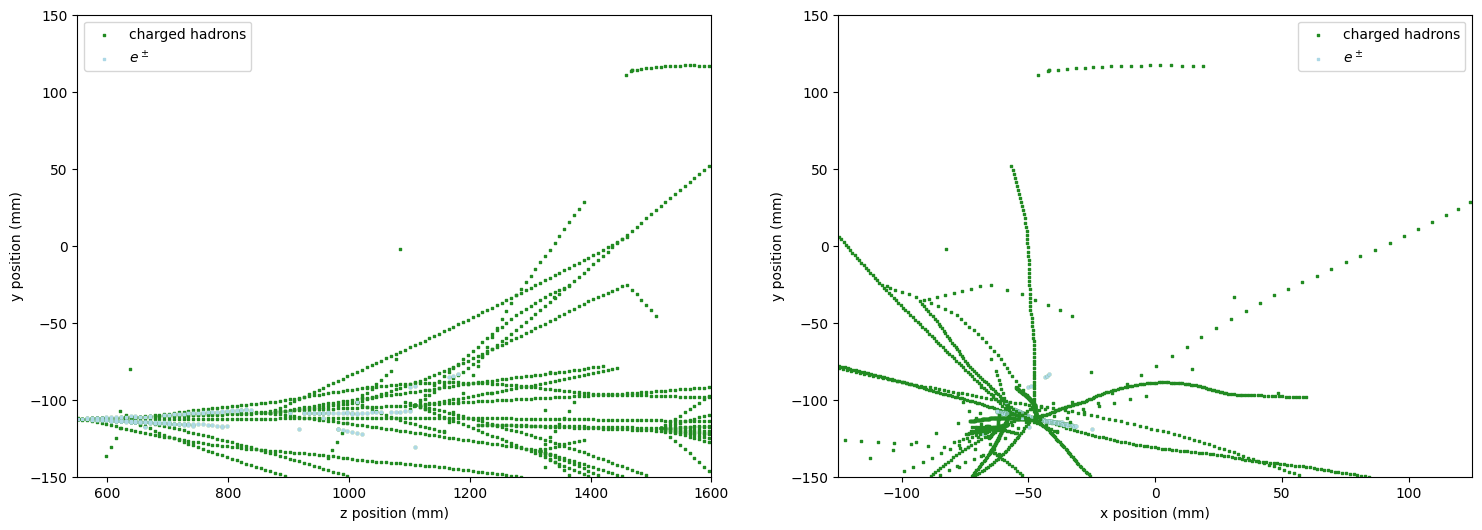

 82%|████████▏ | 82/100 [07:54<01:59,  6.62s/it]

82


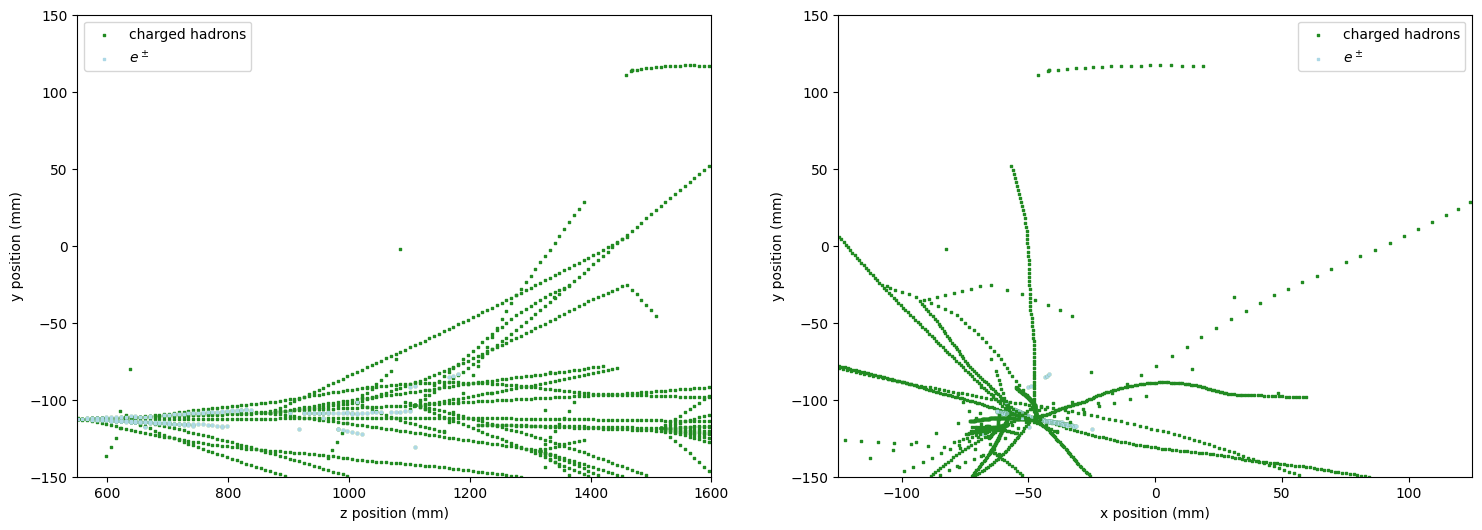

 83%|████████▎ | 83/100 [08:01<01:53,  6.67s/it]

83


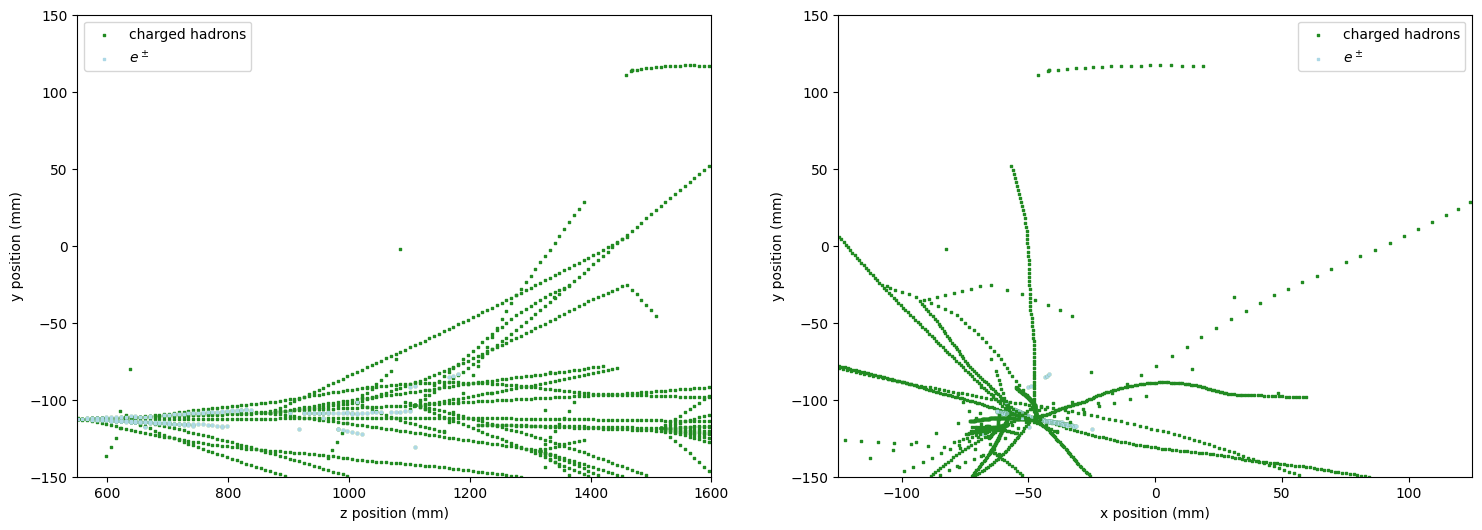

 84%|████████▍ | 84/100 [08:07<01:46,  6.64s/it]

84


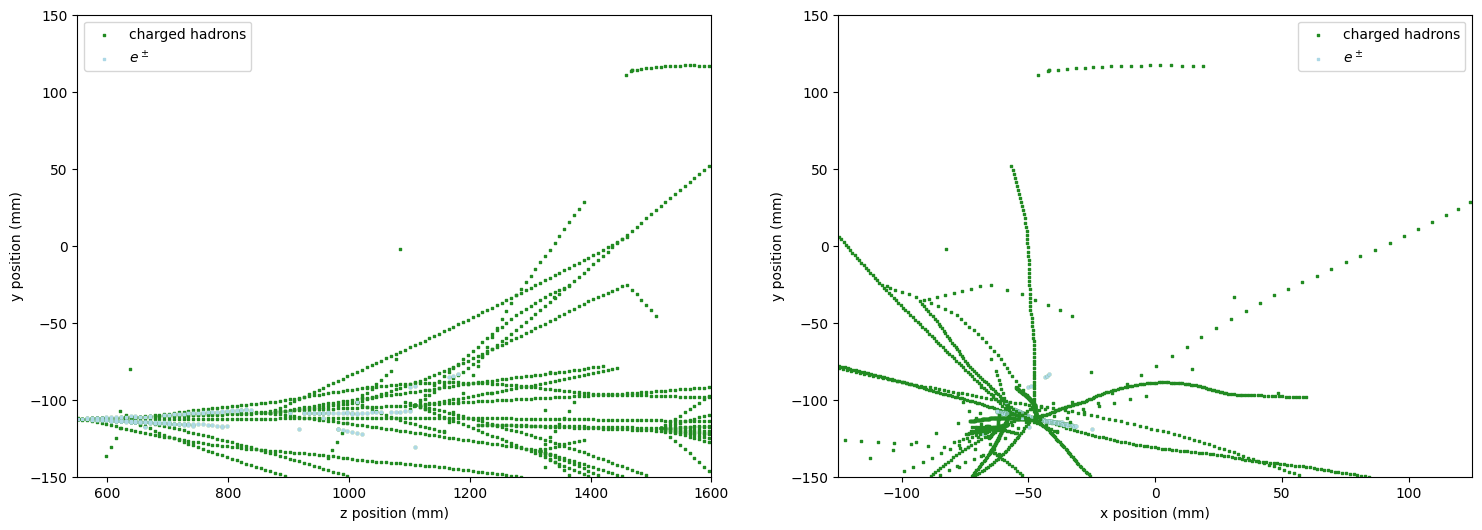

 85%|████████▌ | 85/100 [08:13<01:38,  6.53s/it]

85


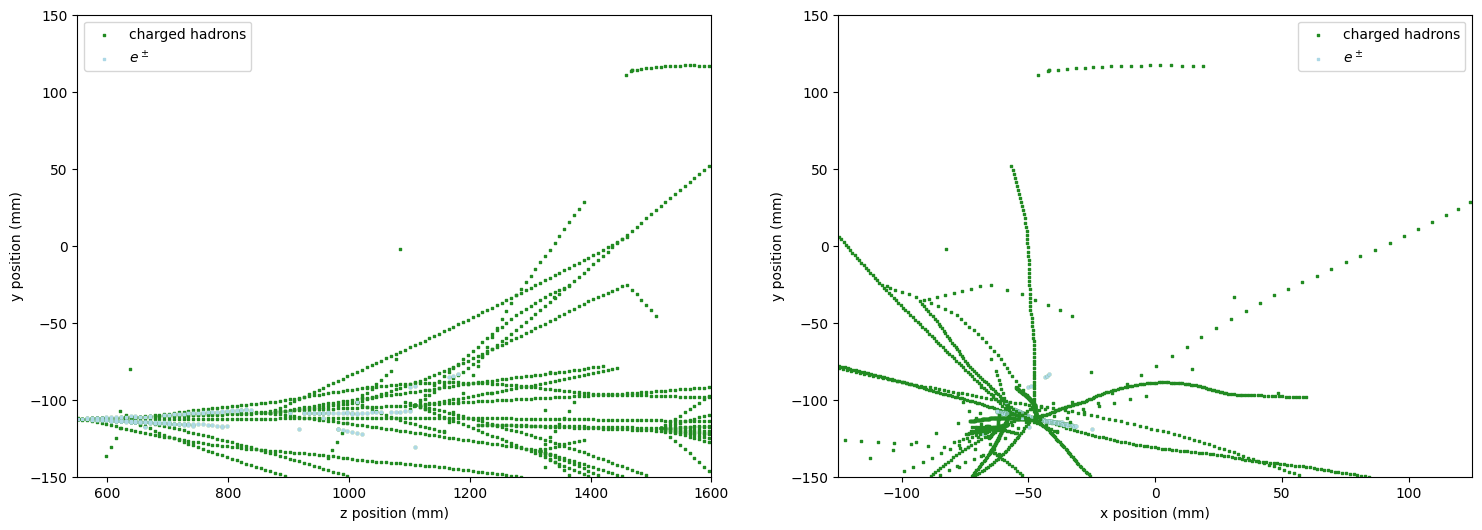

 86%|████████▌ | 86/100 [08:20<01:31,  6.56s/it]

86


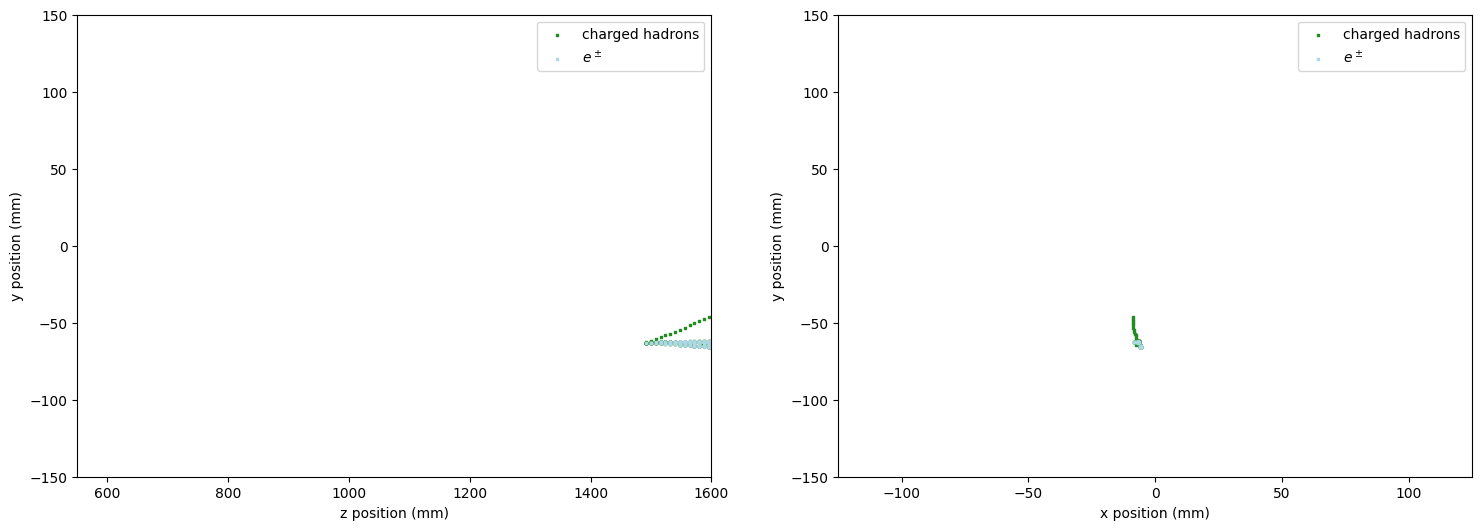

 87%|████████▋ | 87/100 [08:25<01:18,  6.01s/it]

87


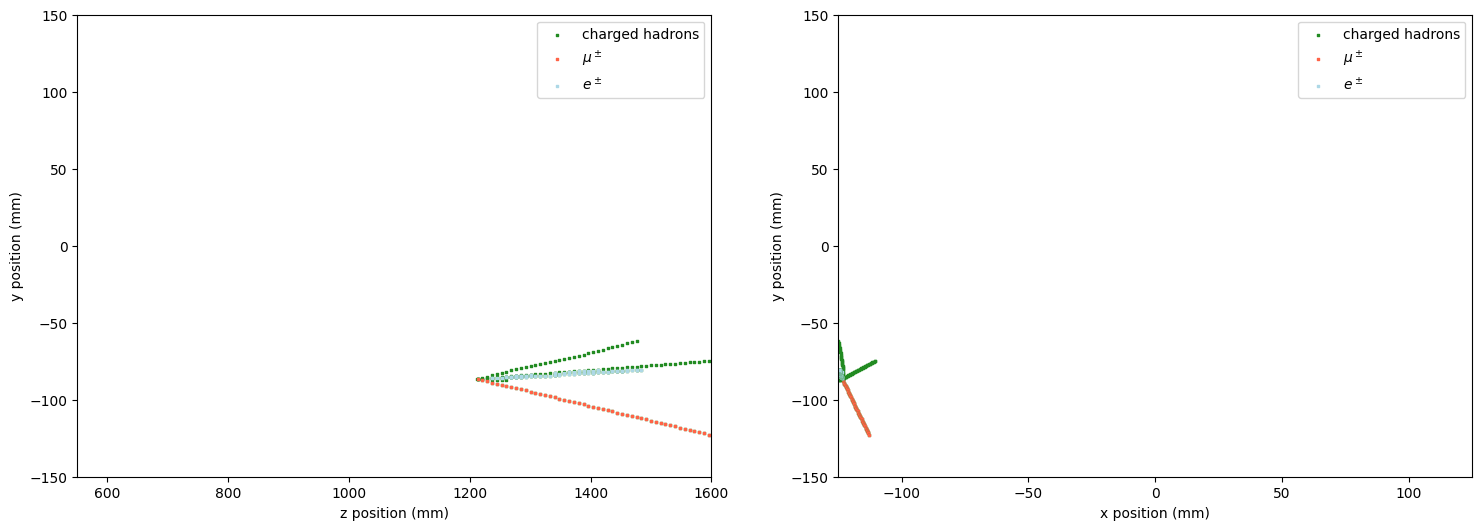

 88%|████████▊ | 88/100 [08:31<01:13,  6.15s/it]

88


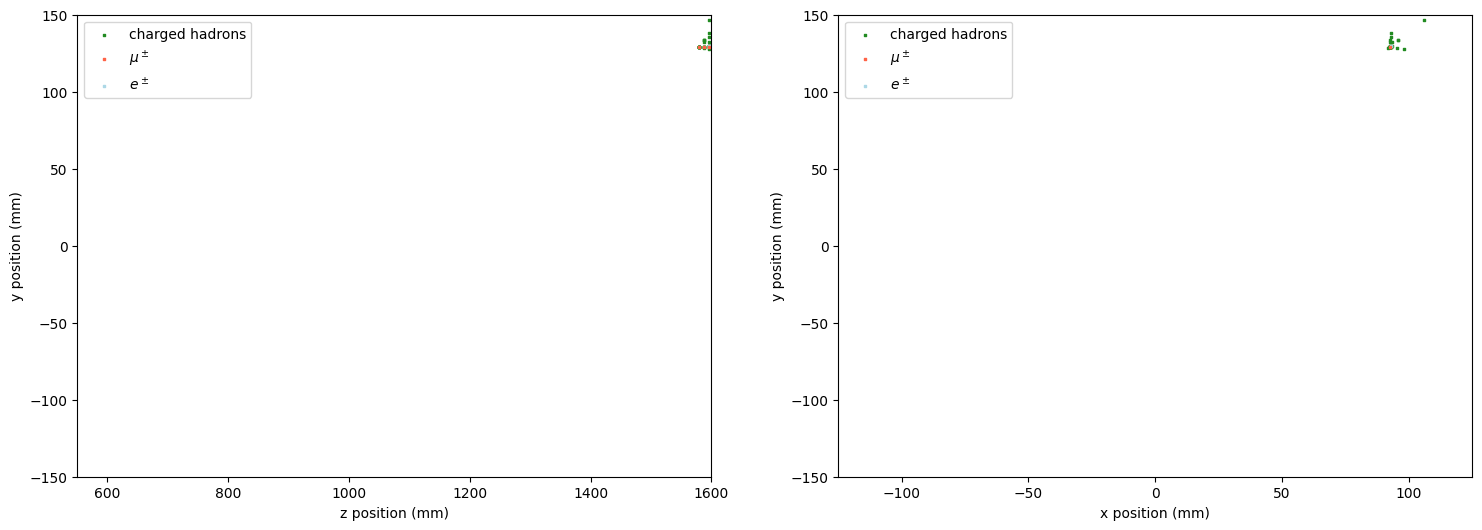

 89%|████████▉ | 89/100 [08:36<01:04,  5.82s/it]

89


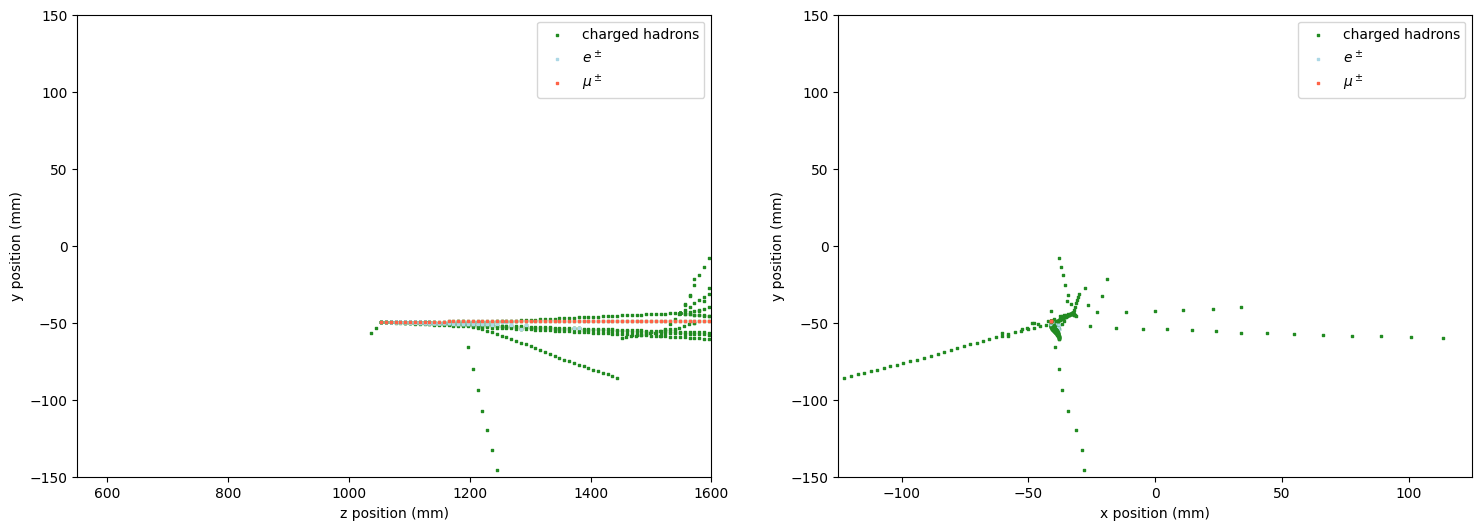

 90%|█████████ | 90/100 [08:42<00:58,  5.88s/it]

90


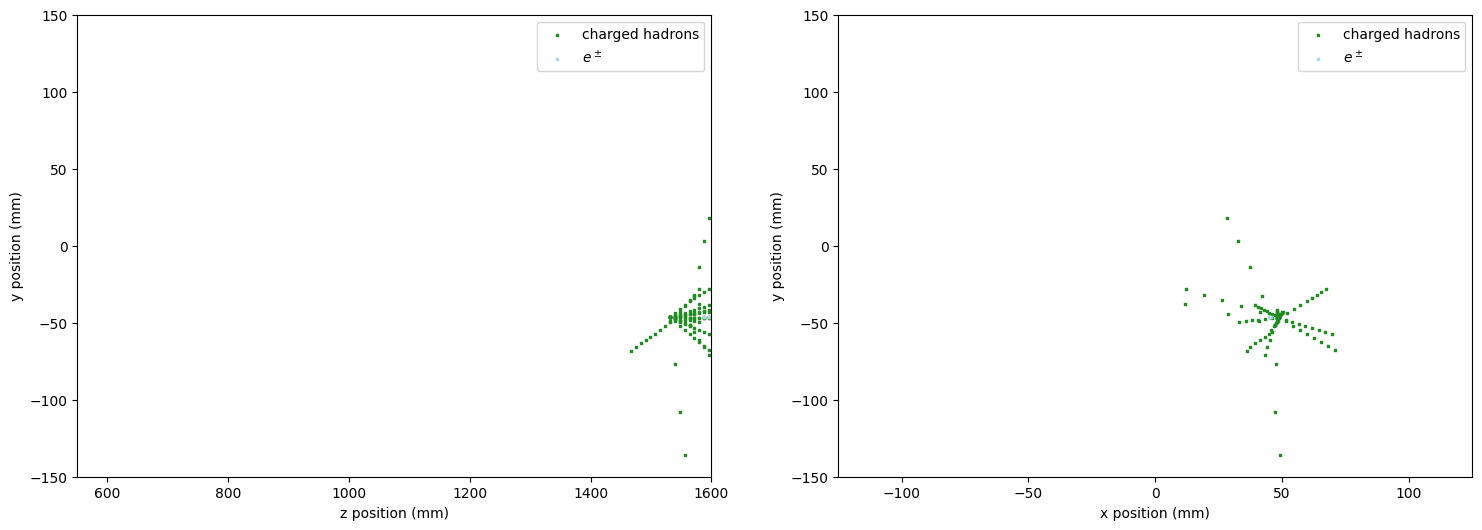

 91%|█████████ | 91/100 [08:48<00:51,  5.76s/it]

91


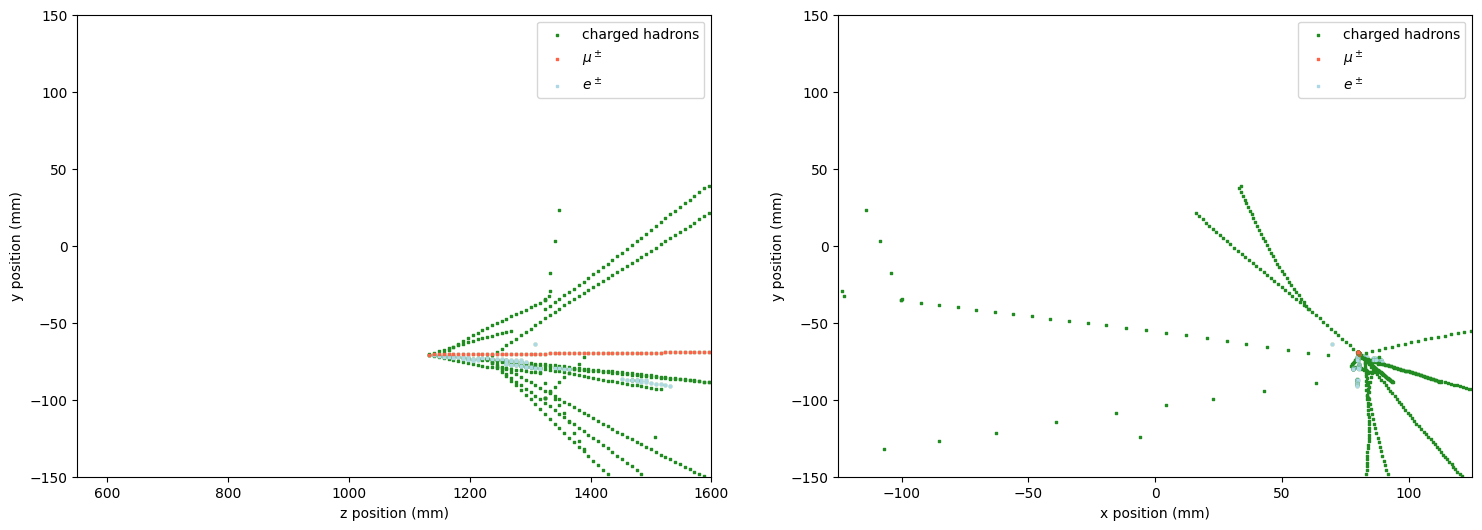

 92%|█████████▏| 92/100 [08:55<00:49,  6.22s/it]

92


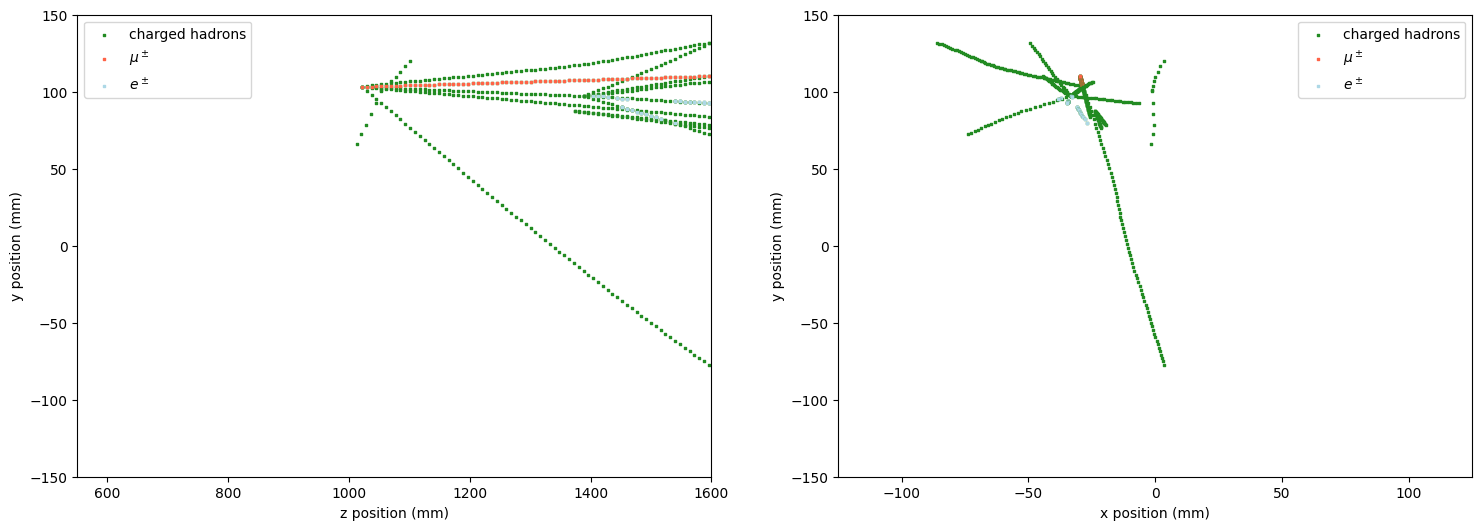

 93%|█████████▎| 93/100 [09:02<00:45,  6.50s/it]

93


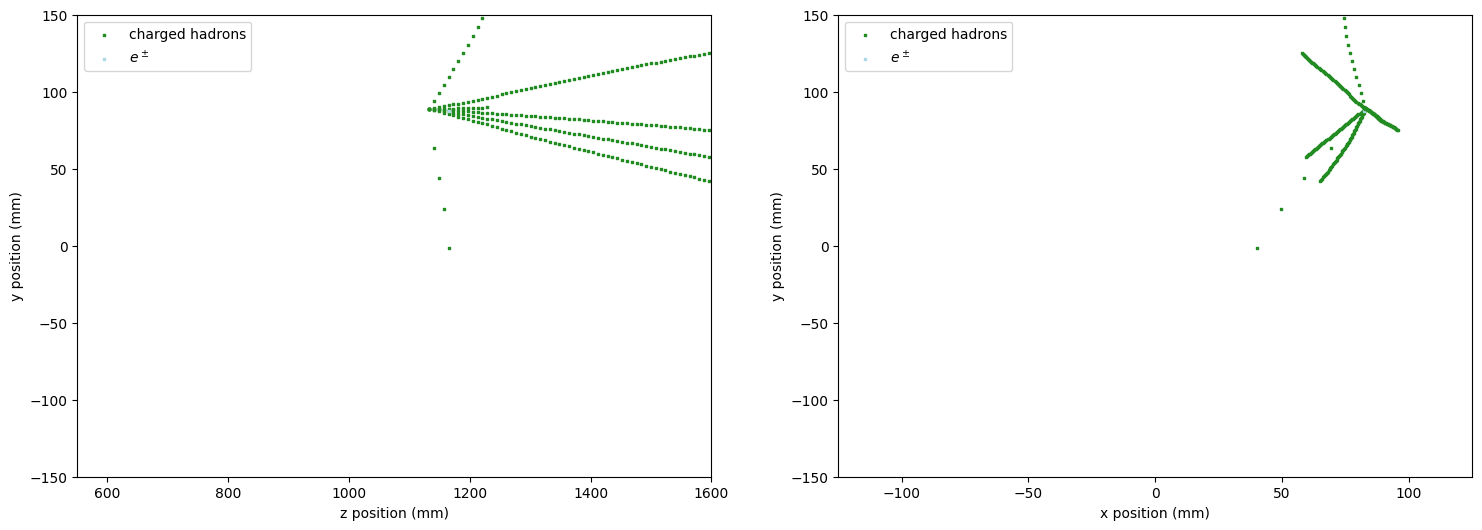

 94%|█████████▍| 94/100 [09:07<00:36,  6.04s/it]

94


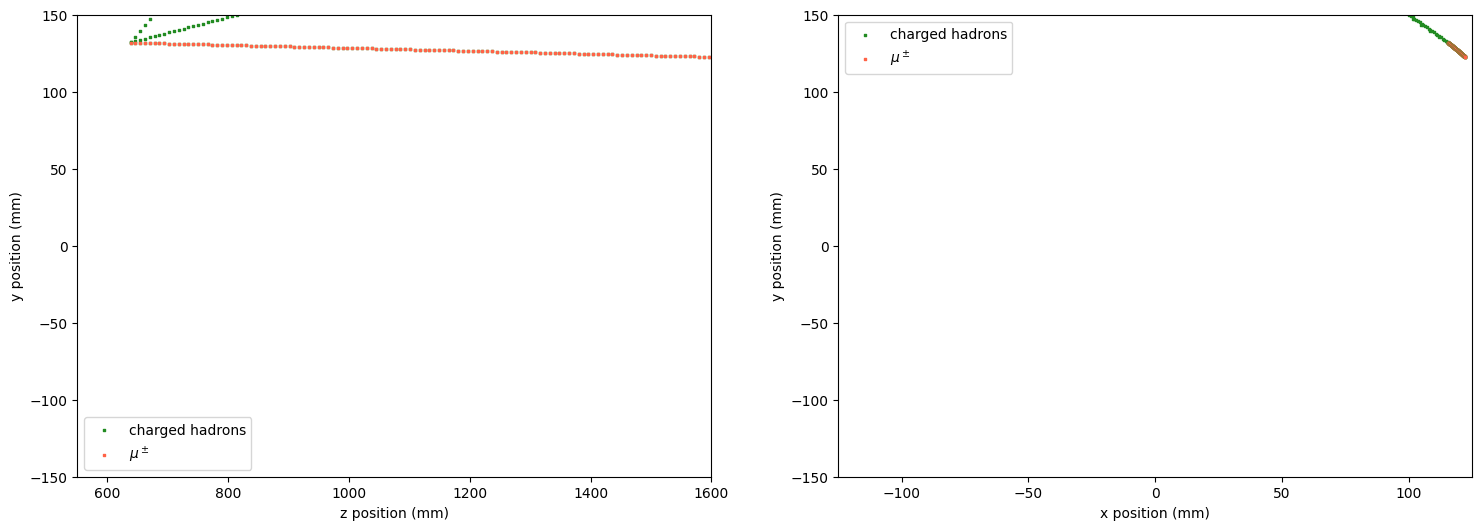

 95%|█████████▌| 95/100 [09:15<00:32,  6.53s/it]

95


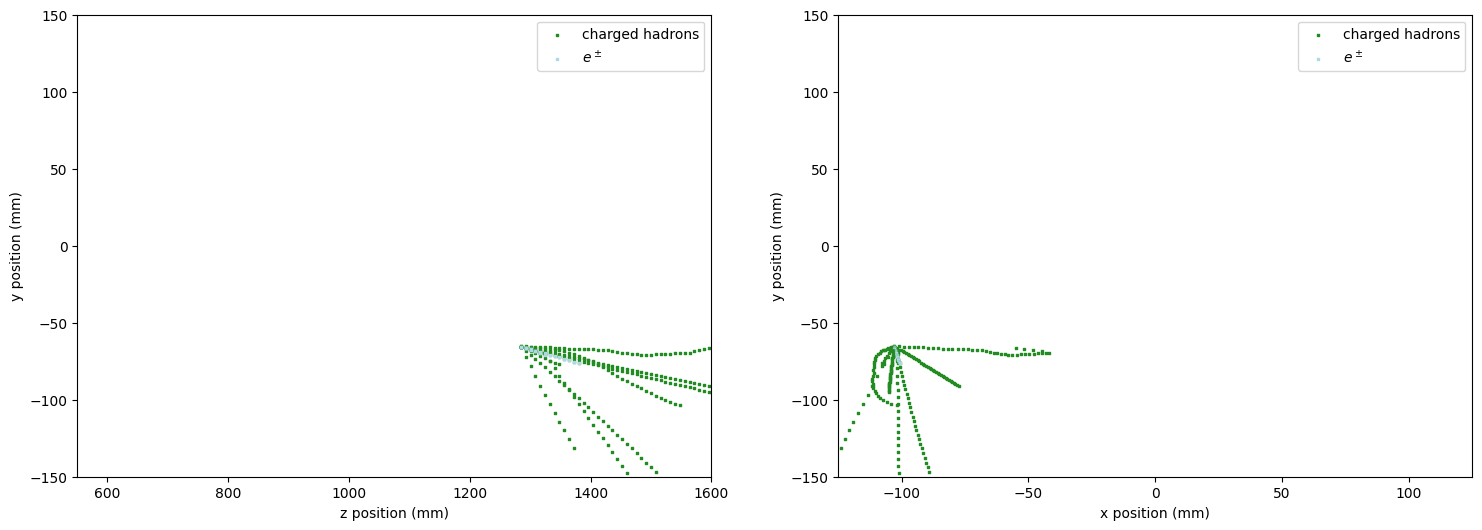

 96%|█████████▌| 96/100 [09:21<00:25,  6.41s/it]

96


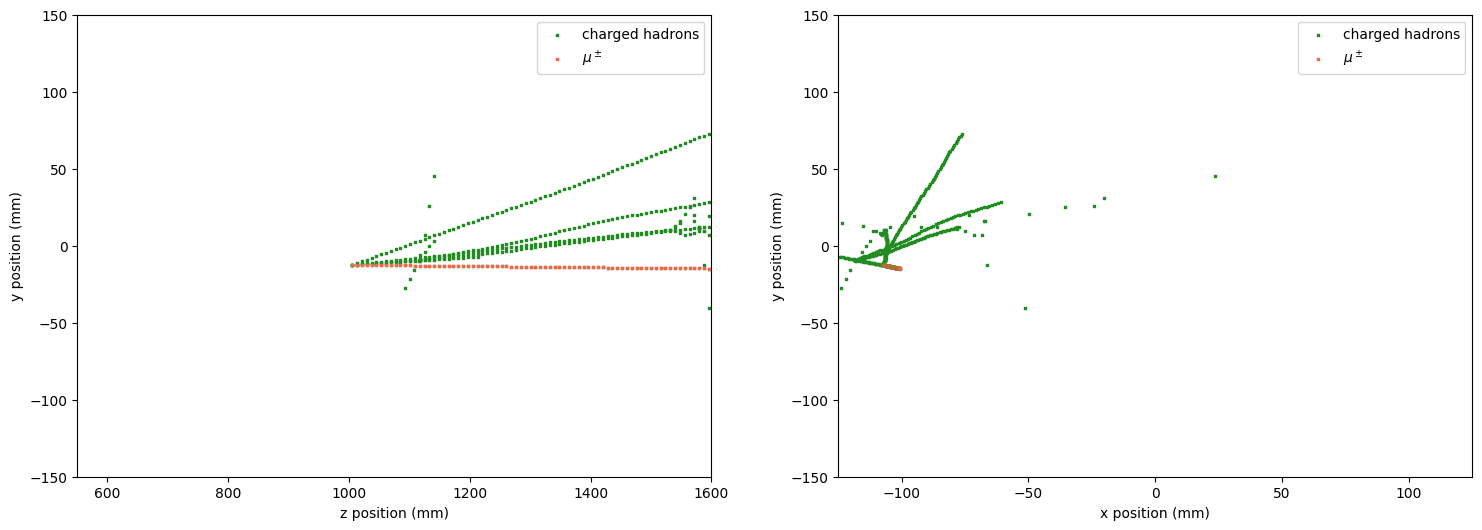

 97%|█████████▋| 97/100 [09:27<00:19,  6.38s/it]

97


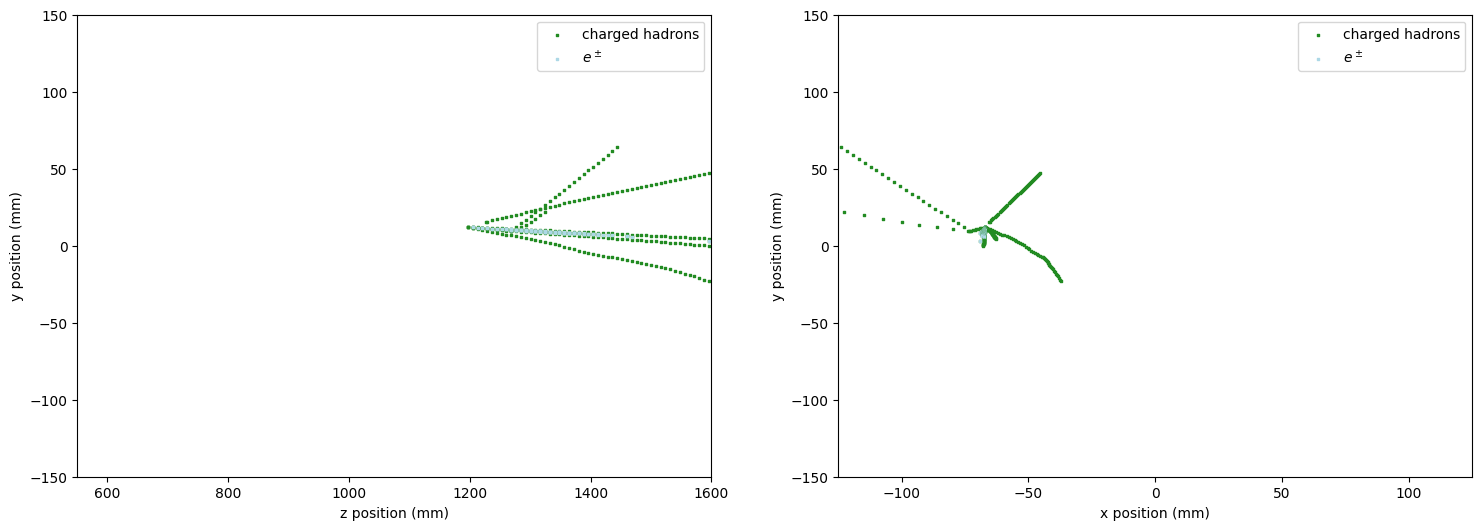

 98%|█████████▊| 98/100 [09:33<00:12,  6.09s/it]

98


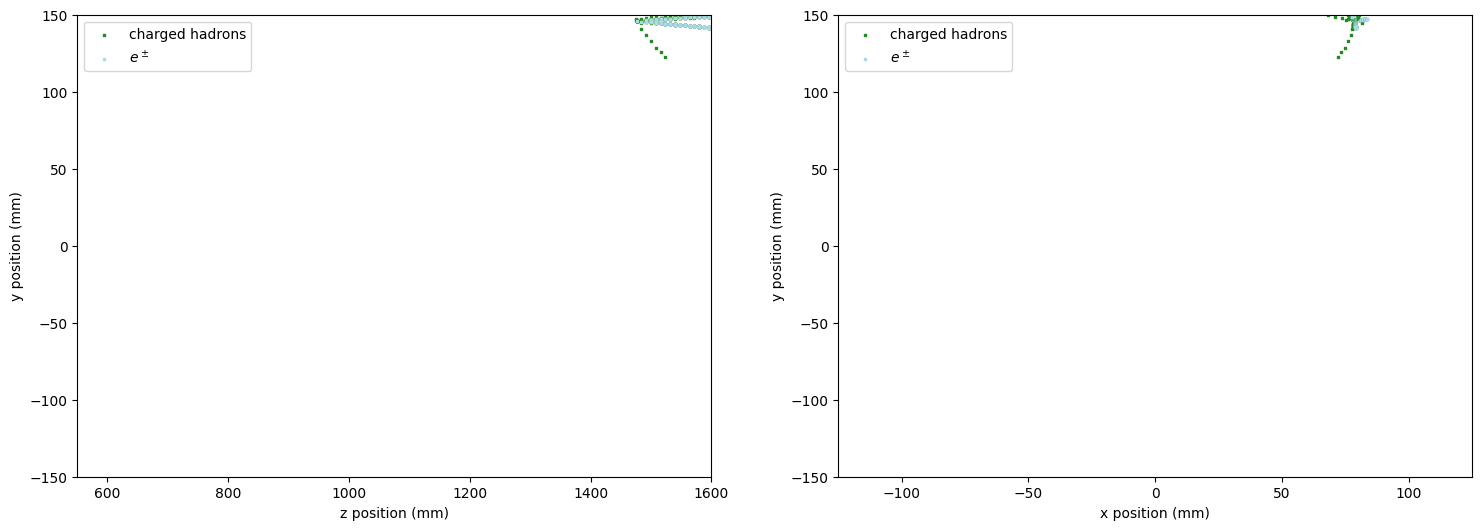

 99%|█████████▉| 99/100 [09:38<00:05,  5.70s/it]

99


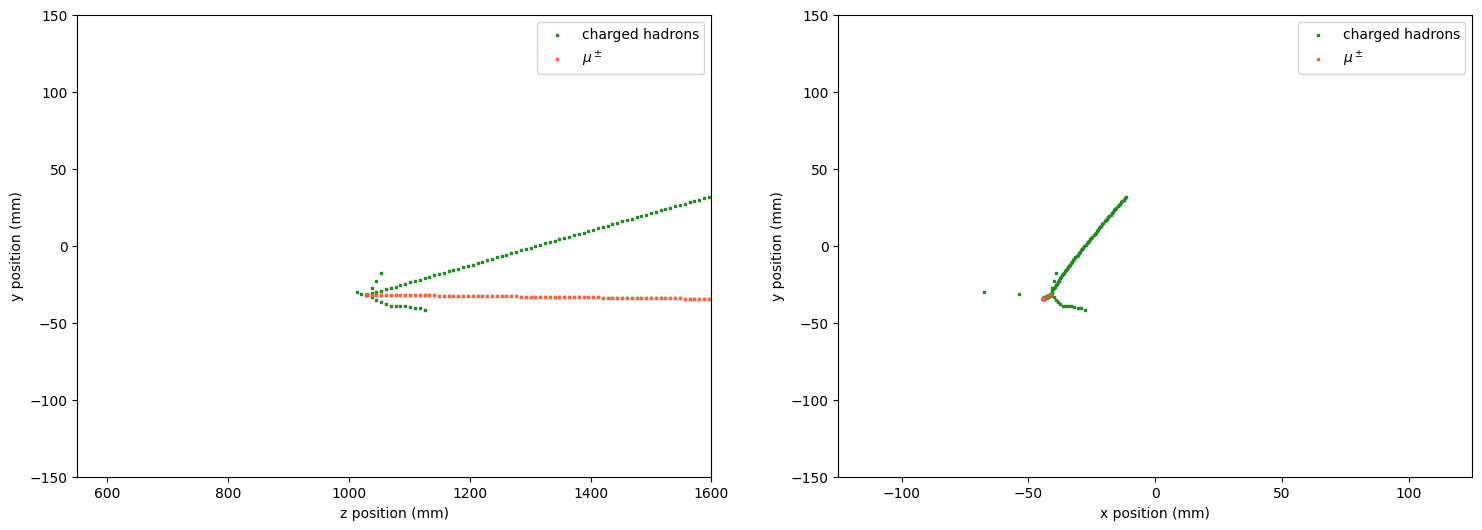

100%|██████████| 100/100 [09:43<00:00,  5.84s/it]


In [77]:
for i in tqdm(range(0, 100)):
    
    fig, ax = plt.subplots(ncols=2, figsize=(18, 6))

    print(i)
    
    for s, station in enumerate(hits):
        
        kinematics = station.arrays(station.keys(), library="ak", cut=f"(fEvent == {event_numbers[i]}) & (z > 0)")
        
        # print(kinematics)
        
        marker_size = 1
        alpha = 1
        
        electrons = kinematics[np.where(np.abs(kinematics['pdgc']) == 11)]
        muons = kinematics[np.where(np.abs(kinematics['pdgc']) == 13)]
        taus = kinematics[np.where(np.abs(kinematics['pdgc']) == 15)]
        
        gluons = kinematics[np.where(np.abs(kinematics['pdgc']) == 21)]
        photons = kinematics[np.where(np.abs(kinematics['pdgc']) == 22)]
        charged_hadrons = kinematics[np.where(np.abs(kinematics['pdgc']) > 37)]
        neutral_hadrons = kinematics[np.where(np.abs(kinematics['pdgc']) > 37)]
        charged_hadrons = kinematics[np.where(get_charge_from_pdgc(kinematics['pdgc']) != 0)]
        neutral_hadrons = kinematics[np.where(get_charge_from_pdgc(kinematics['pdgc']) == 0)]
        
        # scatter_on_ax(ax[0], neutral_hadrons, "z", "y", "neutral hadrons", 'grey', alpha=0.5, marker_size=marker_size)
        scatter_on_ax(ax[0], charged_hadrons, "z", "y", "charged hadrons", 'forestgreen', alpha=alpha, marker_size=marker_size)
        # scatter_on_ax(ax[0], photons, "z", "y", r"$\gamma$", 'yellow', alpha=0.5, marker_size=marker_size)
        # scatter_on_ax(ax[0], gluons, "z", "y", r"$g$", 'orange', alpha=0.5, marker_size=marker_size)
        scatter_on_ax(ax[0], electrons, "z", "y", r"$e^\pm$", 'lightblue', alpha=alpha, marker_size=marker_size)
        scatter_on_ax(ax[0], muons, "z", "y", r"$\mu^\pm$", 'tomato', alpha=alpha, marker_size=marker_size)
        scatter_on_ax(ax[0], taus, "z", "y", r"$\tau^\pm$", 'purple', alpha=alpha, marker_size=marker_size)
        
        # scatter_on_ax(ax[0], neutral_hadrons, "x", "y", "neutral hadrons", 'grey', alpha=0.5, marker_size=marker_size)
        scatter_on_ax(ax[1], charged_hadrons, "x", "y", "charged hadrons", 'forestgreen', alpha=alpha, marker_size=marker_size)
        # scatter_on_ax(ax[0], photons, "x", "y", r"$\gamma$", 'yellow', alpha=0.5, marker_size=marker_size)
        # scatter_on_ax(ax[0], gluons, "x", "y", r"$g$", 'orange', alpha=0.5, marker_size=marker_size)
        scatter_on_ax(ax[1], electrons, "x", "y", r"$e^\pm$", 'lightblue', alpha=alpha, marker_size=marker_size)
        scatter_on_ax(ax[1], muons, "x", "y", r"$\mu^\pm$", 'tomato', alpha=alpha, marker_size=marker_size)
        scatter_on_ax(ax[1], taus, "x", "y", r"$\tau^\pm$", 'purple', alpha=alpha, marker_size=marker_size)
        
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax[0].legend(by_label.values(), by_label.keys())# , ncols=2) #, loc='center right', bbox_to_anchor=(1.55, 0.75))
    ax[1].legend(by_label.values(), by_label.keys())# , ncols=2) #, loc='center right', bbox_to_anchor=(1.55, 0.75)) 
    
    ax[0].set_xlabel("z position (mm)")
    ax[0].set_ylabel("y position (mm)")
    ax[0].set_xlim((550, 1600))
    ax[0].set_ylim((-150, 150))
    
    ax[1].set_xlabel("x position (mm)")
    ax[1].set_ylabel("y position (mm)")
    ax[1].set_xlim((-125, 125))
    ax[1].set_ylim((-150, 150))
    
    plt.savefig(f"{output_dir}/event_{i}_particle-dist-x-y-z-y.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    # break
        

In [69]:
for i in tqdm(range(0, 100)):
    
    fig, ax = plt.subplots()

    for s, station in enumerate(hits):
        
        kinematics = station.arrays(station.keys(), library="ak", cut=f"fEvent == {i}")
        
        marker_size = 1
        alpha = 1
        
        electrons = kinematics[np.where(np.abs(kinematics['pdgc']) == 11)]
        muons = kinematics[np.where(np.abs(kinematics['pdgc']) == 13)]
        taus = kinematics[np.where(np.abs(kinematics['pdgc']) == 15)]
        
        if len(taus["E"] != 0):
            print(taus["E"])
        
        gluons = kinematics[np.where(np.abs(kinematics['pdgc']) == 21)]
        photons = kinematics[np.where(np.abs(kinematics['pdgc']) == 22)]
        charged_hadrons = kinematics[np.where(np.abs(kinematics['pdgc']) > 37)]
        neutral_hadrons = kinematics[np.where(np.abs(kinematics['pdgc']) > 37)]
        charged_hadrons = kinematics[np.where(get_charge_from_pdgc(kinematics['pdgc']) != 0)]
        neutral_hadrons = kinematics[np.where(get_charge_from_pdgc(kinematics['pdgc']) == 0)]
        
        # scatter_on_ax(ax, neutral_hadrons, "x", "y", "neutral hadrons", 'grey', alpha=0.5, marker_size=marker_size)
        scatter_on_ax(ax, charged_hadrons, "x", "y", "charged hadrons", 'forestgreen', alpha=alpha, marker_size=marker_size)
        # scatter_on_ax(ax, photons, "x", "y", r"$\gamma$", 'yellow', alpha=0.5, marker_size=marker_size)
        # scatter_on_ax(ax, gluons, "x", "y", r"$g$", 'orange', alpha=0.5, marker_size=marker_size)
        scatter_on_ax(ax, electrons, "x", "y", r"$e^\pm$", 'lightblue', alpha=alpha, marker_size=marker_size)
        scatter_on_ax(ax, muons, "x", "y", r"$\mu^\pm$", 'tomato', alpha=alpha, marker_size=marker_size)
        scatter_on_ax(ax, taus, "x", "y", r"$\tau^\pm$", 'purple', alpha=alpha, marker_size=marker_size)
        
        
        
        
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), ncols=2, loc='center right', bbox_to_anchor=(1.55, 0.75))
    ax.set_xlabel("x position (mm)")
    ax.set_ylabel("y position (mm)")
    ax.set_xlim((-125, 125))
    ax.set_ylim((-150, 150))
    plt.savefig(f"{output_dir}/event_{i}_particle-dist-x-y.png", dpi=300, bbox_inches='tight')
    plt.close()
    # plt.show()
    # break
        

100%|██████████| 100/100 [05:21<00:00,  3.21s/it]


In [78]:
tau_indices = set()
for i in tqdm(range(0, 1000)):

    for s, station in enumerate(hits):
        
        kinematics = station.arrays(station.keys(), library="ak", cut=f"fEvent == {event_numbers[i]}")
        
        marker_size = 1
        alpha = 1
        
        # electrons = kinematics[np.where(np.abs(kinematics['pdgc']) == 11)]
        # muons = kinematics[np.where(np.abs(kinematics['pdgc']) == 13)]
        taus = kinematics[np.where(np.abs(kinematics['pdgc']) == 15)]
        
        if len(taus["E"] != 0):
            print(i)
            tau_indices.add(i)
            
        
        # gluons = kinematics[np.where(np.abs(kinematics['pdgc']) == 21)]
        # photons = kinematics[np.where(np.abs(kinematics['pdgc']) == 22)]
        # charged_hadrons = kinematics[np.where(np.abs(kinematics['pdgc']) > 37)]
        # neutral_hadrons = kinematics[np.where(np.abs(kinematics['pdgc']) > 37)]
        # charged_hadrons = kinematics[np.where(get_charge_from_pdgc(kinematics['pdgc']) != 0)]
        # neutral_hadrons = kinematics[np.where(get_charge_from_pdgc(kinematics['pdgc']) == 0)]


  0%|          | 0/1000 [00:00<?, ?it/s]

  8%|▊         | 76/1000 [03:07<37:55,  2.46s/it]


KeyboardInterrupt: 

In [90]:
pdgcs = set()
for i in range(1, 133):
    for j, event in enumerate(uproot.iterate(f"/home/bewilson/FASERvSi_G4/GeantOutput/FASERvSi.1000.HITS.root:Hits{i}", step_size=1)):
        for p in event['pdgc']:
            pdgcs.add(p)
            if abs(p) == 15:
                print(f"Found a tau! Hit layer {i}   event number {event['fEvent']}")
    print(f"checked hit layer {i}")
    
print(f"I found these pdgcs:")
for p in pdgcs:
    print(get_name_from_pdgc(p))

checked hit layer 1
checked hit layer 2
checked hit layer 3
checked hit layer 4
checked hit layer 5
checked hit layer 6
checked hit layer 7
checked hit layer 8
checked hit layer 9
checked hit layer 10
checked hit layer 11
checked hit layer 12
checked hit layer 13
checked hit layer 14
checked hit layer 15
checked hit layer 16
checked hit layer 17
checked hit layer 18
checked hit layer 19
checked hit layer 20
checked hit layer 21
checked hit layer 22
checked hit layer 23
checked hit layer 24
checked hit layer 25
checked hit layer 26
checked hit layer 27
checked hit layer 28
checked hit layer 29
checked hit layer 30
checked hit layer 31
checked hit layer 32
checked hit layer 33
checked hit layer 34
checked hit layer 35
checked hit layer 36
checked hit layer 37
checked hit layer 38
checked hit layer 39
Found a tau! Hit layer 40   event number [92600902]
checked hit layer 40
Found a tau! Hit layer 41   event number [92600902]
checked hit layer 41
Found a tau! Hit layer 42   event number [92